## Tag Organizer Function

In [766]:
# UDF to clean aand prapre 'extractedkeyw_per', 'extractedkeyw_org','extractedkeyw_pla' columns
pd.options.mode.chained_assignment = None
def tags_organizer(dataframe):
    for i in dataframe[['extractedkeyw_per', 'extractedkeyw_org','extractedkeyw_pla']]:
        dataframe[i] = dataframe[i].astype("string")
        dataframe[i] = dataframe[i].str.replace('[', '', regex=True)
        dataframe[i] = dataframe[i].str.replace(']', '', regex=True)
        dataframe[i] = dataframe[i].str.replace(' ', '', regex=True)
        dataframe[i+'1'] = dataframe[i].copy()
        dataframe[i+'1'] = dataframe[i].str.replace(',', '', regex=True)
        dataframe[i] = dataframe[i].str.split(",")
        dataframe.drop([i+'1'], axis=1, inplace=True)
    return dataframe

## Tag Counter Function

In [795]:
pd.options.mode.chained_assignment = None
def tags_counter(dataframe):    
    Top_N = []
    for i in dataframe[['extractedkeyw_per', 'extractedkeyw_org','extractedkeyw_pla']]:
        a = dataframe[i].explode().unique()
        b = dataframe[i].explode().value_counts()[a].idxmax()
        Top_N.append(b)
    return Top_N

# Preparing Text for Aljazeera

## Loading Aljazeera dataset with extracted candidate tags

In [813]:
import pandas as pd
aljazeera = pd.read_csv('D:/DAEN/DAEN 690/Datasets/New Extraction_Checkpoints/aljazeera_extracted.csv')
aljazeera

extracted_clean_text  \
0     War crimes Serb commander pleads guilty\nA Bos...   
1     Obesity suit against McDonald’s dismissed\nA U...   
2     Rumsfeld says Iraq is improving\nOn a visit to...   
3     One killed in Beirut Shia rivalry\nOne person ...   
4     UN troops foiled by Congo weather\nHeavy rain ...   
...                                                 ...   
3411  ECB head sent letter bomb\nGerman prosecutors ...   
3412  UK temporarily shuts Peru embassy\nBritain has...   
3413  Aid to Iran could bridge gaps\nThe internation...   
3414  Settler numbers up 16%\nThe population of Jewi...   
3415  Jordan textbooks to explain resistance\nJordan...   

                                 extracted_title extracted_published_date  \
0       War crimes Serb commander pleads guilty                2003-09-04   
1     Obesity suit against McDonald’s dismissed                2003-09-04   
2               Rumsfeld says Iraq is improving                2003-09-04   
3             One killed in Beirut Shia rivalry                2003-09-04   
4             UN troops foiled by Congo weather                2003-09-04   
...                                          ...                      ...   
3411                  ECB head sent letter bomb                2003-12-30   
3412          UK temporarily shuts Peru embassy                2003-12-30   
3413              Aid to Iran could bridge gaps                2003-12-30   
3414                     Settler numbers up 16%                2003-12-30   
3415     Jordan textbooks to explain resistance                2003-12-30   

     extracted_publisher                                  extractedkeyw_per  \
0              Aljazeera                          [Susica, Biljana Plavsic]   
1              Aljazeera                                     [Robert Sweet]   
2              Aljazeera  [Rumsfeld, Donald Rumsfeld, Rumsfeld, Rumsfeld...   
3              Aljazeera  [Amal, Hizb Allah, Maya Beydoun, Hizb Allah, A...   
4              Aljazeera                   [Fataki, Bule, Rogeline Lotsove]   
...                  ...                                                ...   
3411           Aljazeera       [Jean-Claude Trichet, Bologna, Romano Prodi]   
3412           Aljazeera                           [Lower Huallaga Valleys]   
3413           Aljazeera  [Paul von Maltzahn, Colin Powell, Powell, Powe...   
3414           Aljazeera  [Ariel Sharon, Ginot Aryeh, Rachel Avital, Gin...   
3415           Aljazeera  [Jordan, Khalid Tuqan, Al Rai Jordan, Abd Alla...   

                                      extractedkeyw_org  \
0     [UN, Dragan Nikolic, Nikolic, International Cr...   
1     [McDonald’s, McDonald’s, McDonald’s, Sweet, Mc...   
2                   [Sanchez, Unflappable\nImmediately]   
3             [Aljazeera, Aljazeera, Hizb Allah, House]   
4     [UN, UN, UN, UN, Bunia, UN, UN, UN, UN, Bunia\...   
...                                                 ...   
3411  [the European Central Bank, ECB, the European ...   
3412  [the Foreign Office, Foreign Office, the Forei...   
3413       [State, United Nations, The Washington Post]   
3414                [Netzarim, Sharon, Defence, Avital]   
3415  [Al Rai, the United Nations Educational, Scien...   

                                      extractedkeyw_pla url_status  \
0               [Yugoslavia, Bosnia, Hague, Yugoslavia]      valid   
1                                              [US, US]      valid   
2     [Iraq, Iraq, US, Baghdad, US, Iraq, US, US, Ir...      valid   
3     [Beirut, Lebanon, Maamoura, South Beirut, Leba...      valid   
4     [Congo, Fataki, Congo, Bunia, Ireland, Fataki,...      valid   
...                                                 ...        ...   
3411            [Italy, Frankfurt, Italy, Prodi, Prodi]      valid   
3412  [UK, Peru, Britain, Lima, Lima, Lima, Peru, Pe...      valid   
3413  [Iran, Iran, the United States, Washington, Te...      valid   
3414  [the West Bank, Gaza Strip, Israel, G

### Import/Install Required Libraries and Packages

In [534]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

### EDA - Wordcloud from titles for possible descriptor tags

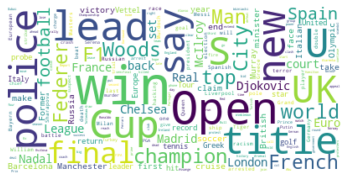

In [535]:
#Creating the text variable

text2 = " ".join(title for title in df1.title)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

### Text Preprocessing,Cleaning and Tokenization

In [536]:
# Convert to list
data1 = aljazeera.extracted_clean_text.values.tolist()
# Remove Emails
data1 = [re.sub('\S*@\S*\s?', '', sent) for sent in data1]

# Remove new line characters
data1 = [re.sub('\s+', ' ', sent) for sent in data1]

# Remove distracting single quotes
data1 = [re.sub("\'", "", sent) for sent in data1]

pprint(data1[1001:1002])

['Tel Aviv rejects Quraya’s olive branch Palestinian Prime Minister Ahmad '
 'Quraya has proposed a ceasefire with Israel, but an Israeli cabinet minister '
 'immediately rejected his offer. Quraya, in an interview with Iarael’s Maariv '
 'newspaper on Wednesday,said he was ready to start talks with Israel '
 'immediately, with the aim of pushing forward the US-backed “road map” aimed '
 'at ending the Palestinian-Israeli conflict. “We are ready to fulfil our '
 'obligations as outlined by the road map on the condition that Israel fulfils '
 'its obligations as well,” said the premier, a day after his emergency '
 'cabinet was sworn in. But Israeli Labour Minister, Zevulun Orlev, has '
 'dismissed the proposal, saying his country does not have to give Quraya a '
 'chance. “He needs to prove himself through action and not through pleasant '
 'words,” said Orlev, a member of the right-wing National Religious Party. The '
 'Israeli minister reiterated calls for Quraya to rein in Palestini

In [537]:
#Function for tokenizing
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data1))

print(data_words[1001:1002])

[['tel', 'aviv', 'rejects', 'quraya', 'olive', 'branch', 'palestinian', 'prime', 'minister', 'ahmad', 'quraya', 'has', 'proposed', 'ceasefire', 'with', 'israel', 'but', 'an', 'israeli', 'cabinet', 'minister', 'immediately', 'rejected', 'his', 'offer', 'quraya', 'in', 'an', 'interview', 'with', 'iarael', 'maariv', 'newspaper', 'on', 'wednesday', 'said', 'he', 'was', 'ready', 'to', 'start', 'talks', 'with', 'israel', 'immediately', 'with', 'the', 'aim', 'of', 'pushing', 'forward', 'the', 'us', 'backed', 'road', 'map', 'aimed', 'at', 'ending', 'the', 'palestinian', 'israeli', 'conflict', 'we', 'are', 'ready', 'to', 'fulfil', 'our', 'obligations', 'as', 'outlined', 'by', 'the', 'road', 'map', 'on', 'the', 'condition', 'that', 'israel', 'fulfils', 'its', 'obligations', 'as', 'well', 'said', 'the', 'premier', 'day', 'after', 'his', 'emergency', 'cabinet', 'was', 'sworn', 'in', 'but', 'israeli', 'labour', 'minister', 'zevulun', 'orlev', 'has', 'dismissed', 'the', 'proposal', 'saying', 'his', 

### Prepare NLTK Stop words

In [538]:
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS

stop_words = stopwords.words('english')
stop_words.extend(list(STOP_WORDS))
stop_words.extend(['said','say'])



In [539]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Visualizing Unigrams in text before and after removing stopwords

In [540]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

the 96587
of 41960
to 39115
in 34734
and 30708
on 15284
said 14771
for 12826
that 12658
is 11371
was 10275
by 8642
he 8295
it 8189
as 8011
with 7843
has 7693
have 7443
us 7422
an 6489


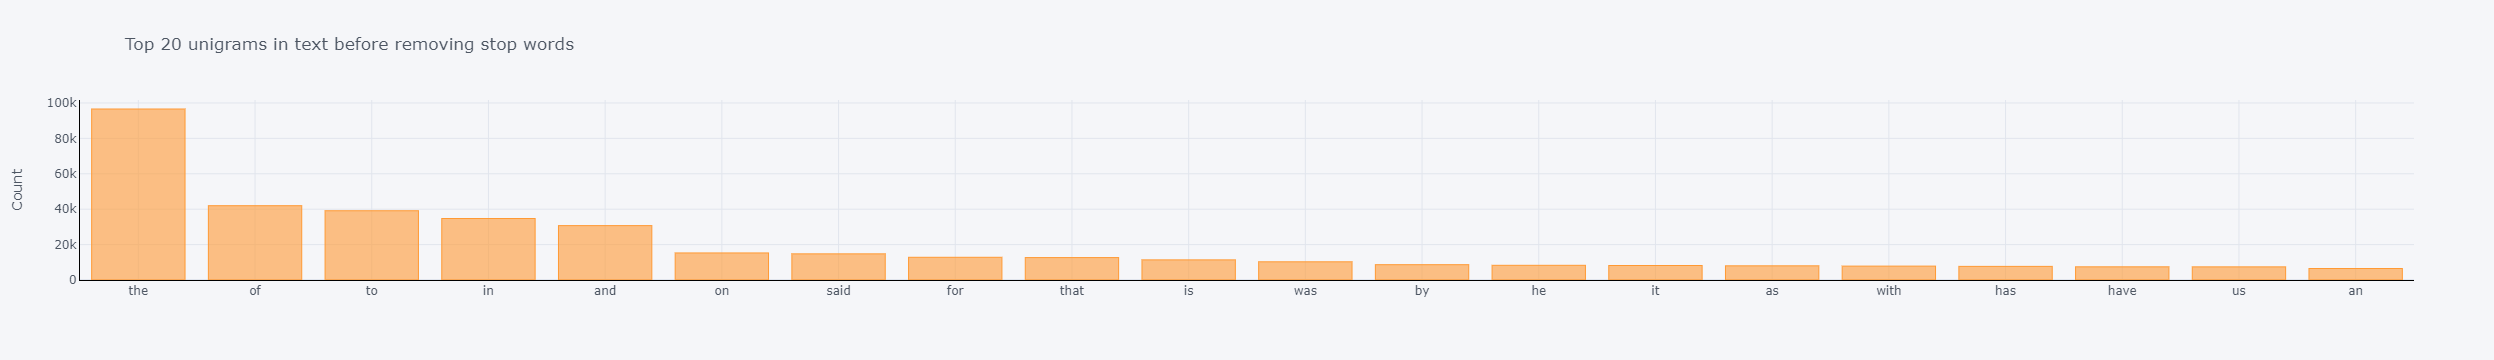

In [541]:
#The distribution of top unigrams before removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(aljazeera['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df2.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams in text before removing stop words')

iraq 3718
people 3717
al 3414
israeli 3116
government 2975
palestinian 2879
israel 2682
year 2378
president 2299
war 2203
security 2197
minister 2142
killed 2122
country 2038
new 2011
military 2010
told 2004
state 1872
iraqi 1758
police 1739


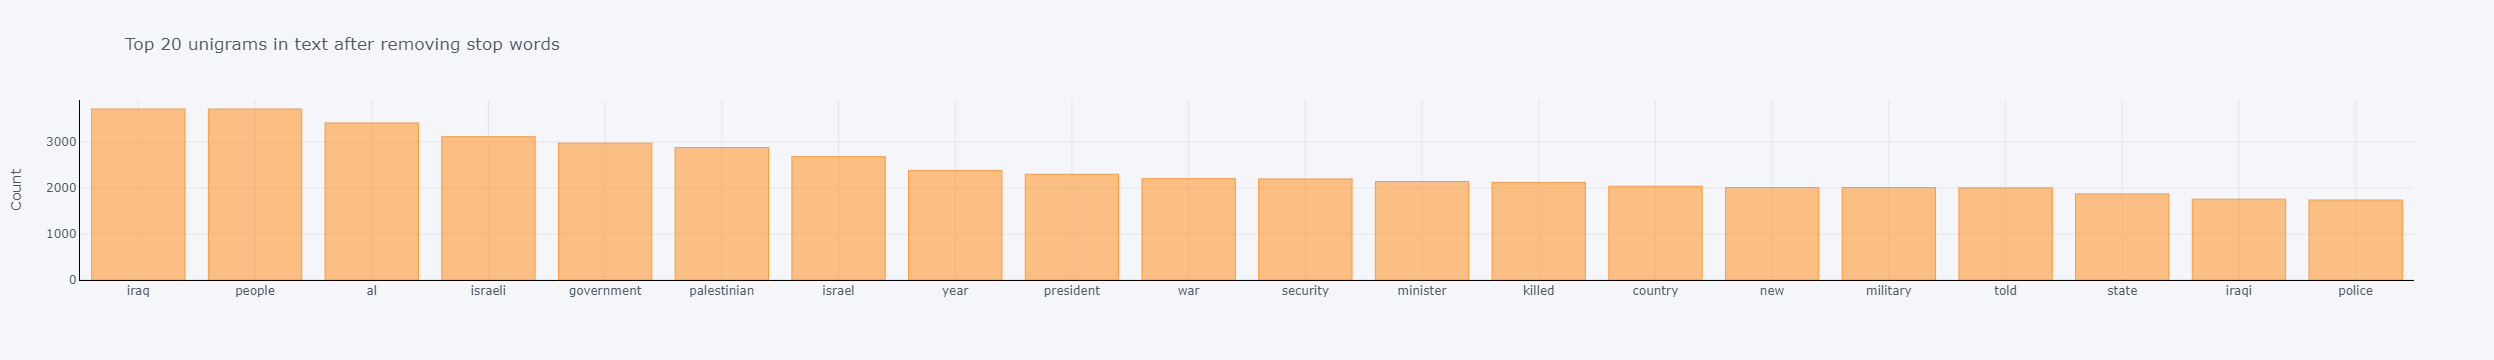

In [542]:
#The distribution of top unigrams after removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = frozenset(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(aljazeera['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df3.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams in text after removing stop words')

### Identifying bigrams/trigrams and Lemmatization

In [543]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1001]]])

['tel_aviv', 'rejects', 'quraya', 'olive_branch', 'palestinian', 'prime_minister_ahmad_quraya', 'has', 'proposed', 'ceasefire', 'with', 'israel', 'but', 'an', 'israeli', 'cabinet', 'minister', 'immediately', 'rejected', 'his', 'offer', 'quraya', 'in', 'an', 'interview', 'with', 'iarael', 'maariv', 'newspaper', 'on', 'wednesday', 'said', 'he', 'was', 'ready', 'to', 'start', 'talks', 'with', 'israel', 'immediately', 'with', 'the', 'aim', 'of', 'pushing', 'forward', 'the', 'us', 'backed_road_map', 'aimed', 'at', 'ending', 'the', 'palestinian', 'israeli', 'conflict', 'we', 'are', 'ready', 'to', 'fulfil', 'our', 'obligations', 'as', 'outlined', 'by', 'the', 'road_map', 'on', 'the', 'condition', 'that', 'israel', 'fulfils', 'its', 'obligations', 'as', 'well', 'said', 'the', 'premier', 'day', 'after', 'his', 'emergency', 'cabinet', 'was', 'sworn', 'in', 'but', 'israeli', 'labour', 'minister', 'zevulun', 'orlev', 'has', 'dismissed', 'the', 'proposal', 'saying', 'his', 'country', 'does', 'not',

In [544]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [545]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized1 = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized1[1001:1002])

[['tel_aviv', 'reject', 'palestinian', 'prime_minister', 'propose', 'ceasefire', 'israeli', 'immediately', 'reject', 'offer', 'ready', 'start', 'talk', 'immediately', 'aim', 'push', 'forward', 'back', 'aim', 'end', 'palestinian', 'israeli', 'conflict', 'ready', 'fulfil', 'obligation', 'outline', 'condition', 'fulfil', 'obligation', 'premier', 'day', 'emergency', 'cabinet', 'swear', 'israeli', 'dismiss', 'proposal', 'say', 'country', 'chance', 'need', 'prove', 'action', 'pleasant', 'word', 'orlev', 'member', 'right_we', 'national', 'religious', 'party', 'israeli', 'reiterate', 'call', 'palestinian', 'activist', 'spearhead', 'resistance', 'sponsor', 'order', 'palestinian', 'crack', 'resistance_fighter', 'halt', 'construction', 'jewish_settlement', 'international', 'law', 'jewish_settlement', 'illegal', 'palestinian', 'president', 'swear', 'emergency', 'cabinet', 'declare', 'state', 'emergency', 'weekend', 'follow', 'renew', 'israeli', 'demand', 'remove', 'israeli', 'arrest', 'wife', 'lea

### Visualizing Bigrams in text before and after removing stopwords

In [546]:
#The distribution of top bigrams before removing stop words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(aljazeera['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df4.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')

of the 11051
in the 9311
to the 4224
for the 2991
on the 2907
the us 2488
and the 2464
said the 2430
by the 2200
he said 2147
at the 2090
to be 1994
that the 1967
from the 1802
with the 1796
have been 1665
has been 1540
the united 1389
it is 1321
in iraq 1208


In [547]:
#The distribution of top bigrams after removing stop words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(aljazeera['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df5.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

united states 1067
prime minister 1049
west bank 738
al qaida 697
human rights 688
year old 567
saddam hussein 509
united nations 407
george bush 394
middle east 355
president george 348
gaza strip 335
foreign minister 333
aljazeera net 332
told aljazeera 318
saudi arabia 308
security council 303
abd al 299
white house 292
told reporters 281


### Visualizing Trigrams in text before and after removing stopwords

In [548]:
#The distribution of Top trigrams before removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(aljazeera['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df6.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

the united states 1022
one of the 647
the west bank 532
as well as 354
president george bush 347
the us led 330
the end of 314
in the west 314
the united nations 312
he said the 307
according to the 302
members of the 285
the middle east 261
of the us 233
the number of 225
have been killed 218
head of the 217
told aljazeera net 216
us president george 215
in the country 213


In [549]:
#The distribution of Top trigrams after removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(aljazeera['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df7 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df7.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

president george bush 347
told aljazeera net 216
main body text 194
body text main 193
text main body 193
weapons mass destruction 181
west bank gaza 172
minister ariel sharon 166
prime minister ariel 164
israeli prime minister 147
usama bin ladin 122
bank gaza strip 115
un security council 110
president saddam hussein 98
occupied west bank 94
human rights groups 89
iraqi governing council 89
president yasir arafat 88
secretary state colin 82
state colin powell 82


# Preparing Text of BBC

## Loading BBC dataset with extracted candidate tags

In [945]:
import pandas as pd
bbc = pd.read_csv('D:/DAEN/DAEN 690/Datasets/New Extraction_Checkpoints/bbc_extracted.csv')
bbc

extracted_clean_text  \
0     Partner of murder victim Ronald Todd hands ove...   
1     Replica unveiled for stolen Auchengeich mining...   
2     Newspapers analyse Hague's foreign policy spee...   
3     Bogus Staffordshire vets convicted of fraud\n-...   
4     Fatal crash lorry driver arrested\n- Published...   
...                                                 ...   
2995  Lorry driver 'lucky to be alive' after Coventr...   
2996  Vyrnwy estate around Lake Vyrnwy up for sale\n...   
2997  Boy dies after Birmingham hospital neglect\n- ...   
2998  St Margaret's private school set to close\n- P...   
2999  Blackpool tram driver summonsed over pedestria...   

                                        extracted_title  \
0     Partner of murder victim Ronald Todd hands ove...   
1     Replica unveiled for stolen Auchengeich mining...   
2     Newspapers analyse Hague's foreign policy spee...   
3     Bogus Staffordshire vets convicted of fraud - ...   
4          Fatal crash lorry driver arrested - BBC News   
...                                                 ...   
2995  Lorry driver 'lucky to be alive' after Coventr...   
2996  Vyrnwy estate around Lake Vyrnwy up for sale -...   
2997  Boy dies after Birmingham hospital neglect - B...   
2998  St Margaret's private school set to close - BB...   
2999  Blackpool tram driver summonsed over pedestria...   

     extracted_published_date extracted_publisher  \
0                  2010-06-29            BBC News   
1                  2010-06-04            BBC News   
2                  2010-07-02            BBC News   
3                  2010-06-18            BBC News   
4                  2010-06-30            BBC News   
...                       ...                 ...   
2995               2010-06-06            BBC News   
2996               2010-07-05            BBC News   
2997               2010-07-06            BBC News   
2998               2010-06-11            BBC News   
2999               2010-06-09            BBC News   

                                      extractedkeyw_per  \
0     [Ronald Todd, Julie Ann Scott, Ronald Todd, Li...   
1     [John McKenna, Alex Salmond, John McKenna, Tom...   
2     [William Hague, Andy, Andy, Murray, Charles Sa...   
3      [Olanrewaju Oduloju, Lerwill-Carter, Mark Eades]   
4                                          [Hadds Lane]   
...                                                 ...   
2995                                            [Lorry]   
2996                          [Knight Frank, Tony Wray]   
2997  [Nasserulddin Albana, Sarah Ormond-Walshe, Bar...   
2998  [St Margaret's, St Margaret's, Blair Nimmo, St...   
2999  [Maureen Foxwell, Norbreck, Paul Edensor, Mrs ...   

                                      extractedkeyw_org  \
0     [the Serious Organised Crime Agency, the River...   
1     [Auchengeich, CCTV, the Auchengeich Miners' We...   
2     [the Daily Telegraph's, Times, the Financial T...   
3     [Rugeley, Stafford Crown Court, Staffordshire ...   
4                                          [Goole, BBC]   
...                                                 ...   
2995    [Coventry, The West Midlands Ambulance Service]   
2996  [The Liverpool Corporation, Clive Hopkins, Kni...   
2997  [Heartlands Hospital, Nasserulddin Muset, the ...   
2998  [Edinburgh, KPMG, KPMG, Edinburgh, BBC Scotlan...   
2999  [the Rail Accident Investigation Branch, Black...   

                                      extractedkeyw_pla url_status  \
0                          [Belfast, Ravarnet, Belfast]      valid   
1            [Replica, Scotland, Moodiesburn, Scotland]      valid   
2     [Hague, UK, Mr Hague, Britain, Make Britain gr...      valid   
3                          [Staffordshire, UK, Nigeria]      valid   
4     [South Yorkshire, Thorne, Doncaster, East York...      valid   
...                                                 ...        ...   
2995                              [Meriden, Bickenhill]      valid   
29

### Import/Install Required Libraries and Packages

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

### EDA - Wordcloud from titles for possible descriptor tags

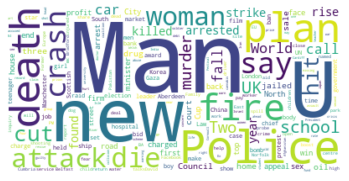

In [ ]:
#Creating the text variable

text2 = " ".join(title for title in df1.title)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

### Text Preprocessing,Cleaning and Tokenization

In [902]:
# Convert to list
data2 = bbc.extracted_clean_text.values.tolist()
# Remove Emails
data2 = [re.sub('\S*@\S*\s?', '', sent) for sent in data2]

# Remove new line characters
data2 = [re.sub('\s+', ' ', sent) for sent in data2]

# Remove distracting single quotes
data2 = [re.sub("\'", "", sent) for sent in data2]

pprint(data2[1001:1002])

['UK success at Fort William mountain bike world cup - Published Hundreds of '
 'riders and almost 20,000 spectators gathered near Fort William over the '
 'weekend for the UCI Mountain Bike World Cup. This event was the second stage '
 'of the world downhill series and the third in the international 4X '
 'competition. More than 300 professional riders from 24 nations took part. '
 'The flagship mens downhill event was won by British rider Gee Atherton. His '
 'sister Rachel was second in the womans event, which was won by Sabrina '
 'Jonnier of France. All the World Cup events took place in or around the '
 'Nevis Range ski area and the Leanachan Forest. Riders took to the slopes of '
 'Aonach Mor on Friday for training runs ahead of the main events on Saturday '
 'and Sunday. The downhill race on Sunday saw competitors plummet 550ft down '
 'the 1.75 mile (2.8km) boulder-strewn course before finishing at the bottom '
 'gondola station at the Nevis Range. Speaking after his victory, 

In [903]:
#Function for tokenizing
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data2))

print(data_words[1001:1002])

[['uk', 'success', 'at', 'fort', 'william', 'mountain', 'bike', 'world', 'cup', 'published', 'hundreds', 'of', 'riders', 'and', 'almost', 'spectators', 'gathered', 'near', 'fort', 'william', 'over', 'the', 'weekend', 'for', 'the', 'uci', 'mountain', 'bike', 'world', 'cup', 'this', 'event', 'was', 'the', 'second', 'stage', 'of', 'the', 'world', 'downhill', 'series', 'and', 'the', 'third', 'in', 'the', 'international', 'competition', 'more', 'than', 'professional', 'riders', 'from', 'nations', 'took', 'part', 'the', 'flagship', 'mens', 'downhill', 'event', 'was', 'won', 'by', 'british', 'rider', 'gee', 'atherton', 'his', 'sister', 'rachel', 'was', 'second', 'in', 'the', 'womans', 'event', 'which', 'was', 'won', 'by', 'sabrina', 'jonnier', 'of', 'france', 'all', 'the', 'world', 'cup', 'events', 'took', 'place', 'in', 'or', 'around', 'the', 'nevis', 'range', 'ski', 'area', 'and', 'the', 'leanachan', 'forest', 'riders', 'took', 'to', 'the', 'slopes', 'of', 'aonach', 'mor', 'on', 'friday', '

### Prepare NLTK Stop words

In [904]:
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS

stop_words = stopwords.words('english')
stop_words.extend(list(STOP_WORDS))
stop_words.extend(['said','say'])



In [905]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Visualizing Unigrams in text before and after removing stopwords

In [906]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

the 59672
to 26668
of 24381
in 21514
and 20982
for 9339
was 9115
on 8783
is 8676
said 8590
that 8104
it 7700
he 6494
at 5900
be 5544
have 5449
with 5402
has 5332
by 5070
as 4845


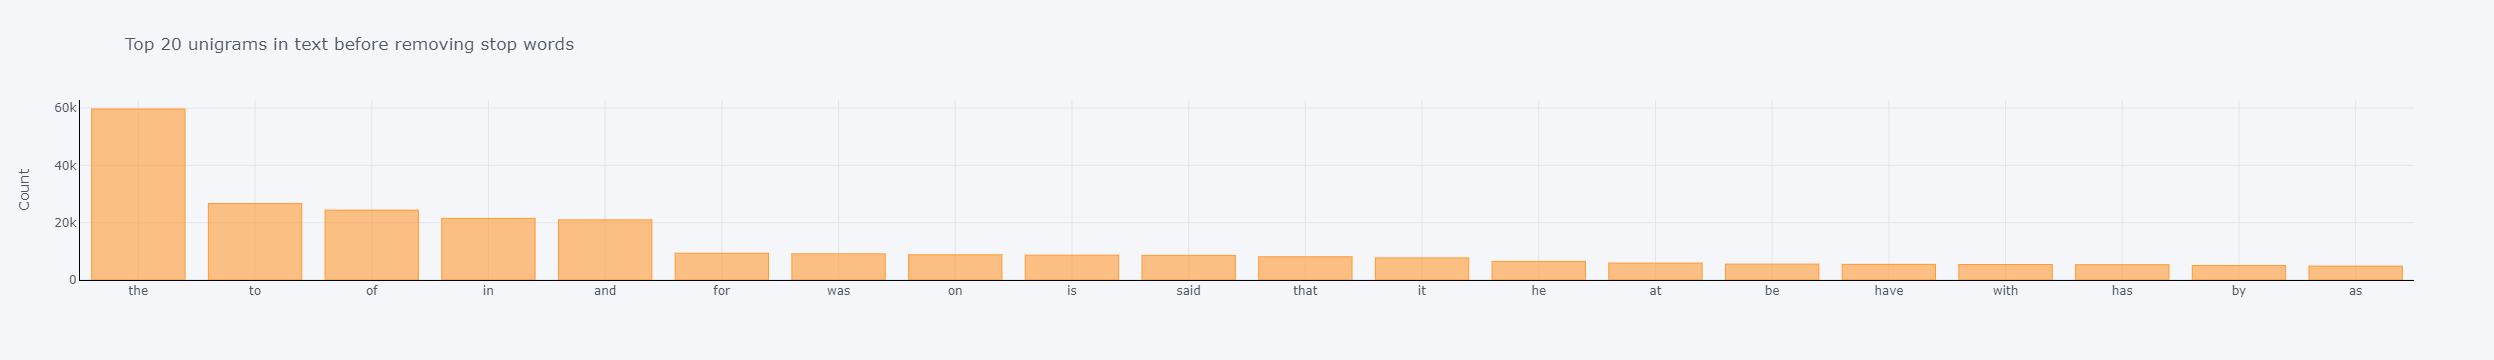

In [907]:
#The distribution of top unigrams before removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(bbc['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df2.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams in text before removing stop words')

published 3054
mr 2811
year 2468
people 2420
police 2364
new 1726
government 1626
man 1340
bbc 1326
years 1258
time 1195
says 1131
council 1110
told 1070
old 1027
000 1012
uk 1010
public 916
court 902
work 893


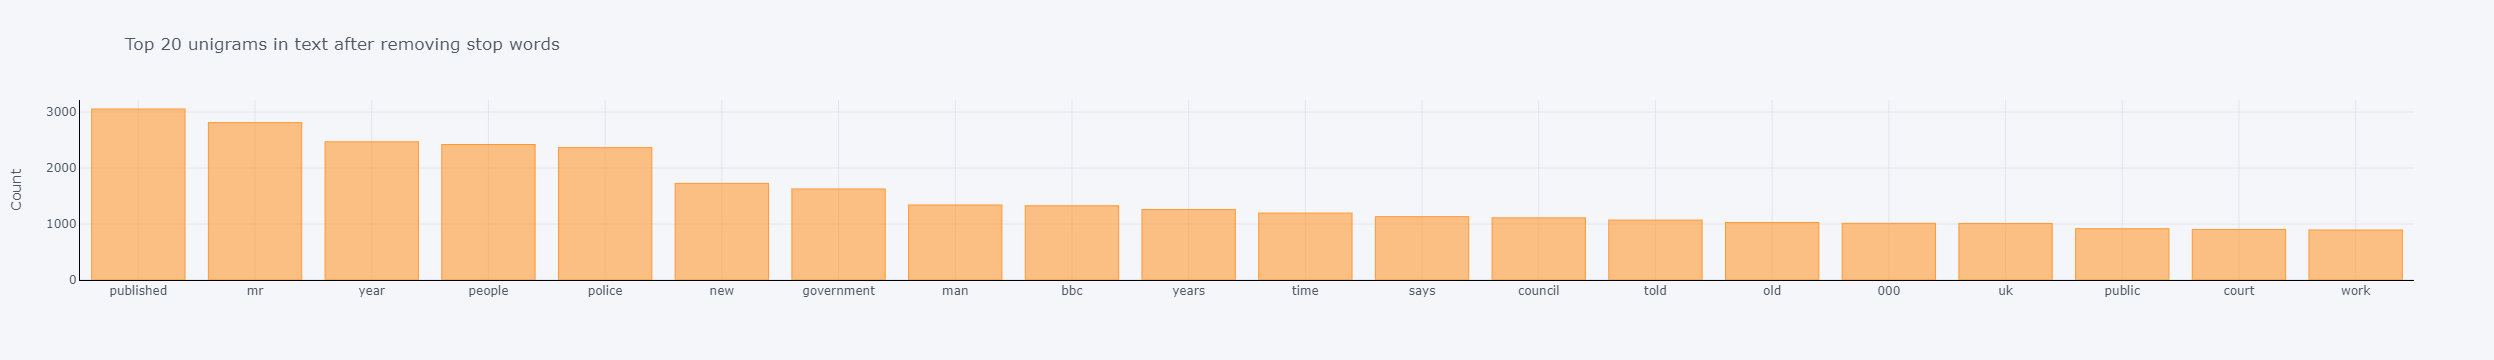

In [908]:
#The distribution of top unigrams after removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = frozenset(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(bbc['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df3.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams in text after removing stop words')

### Identifying bigrams/trigrams & lemmatization

In [909]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1001]]])

['uk', 'success', 'at', 'fort_william', 'mountain', 'bike', 'world_cup', 'published', 'hundreds', 'of', 'riders', 'and', 'almost', 'spectators', 'gathered', 'near', 'fort_william', 'over', 'the', 'weekend', 'for', 'the', 'uci', 'mountain', 'bike', 'world_cup', 'this', 'event', 'was', 'the', 'second', 'stage', 'of', 'the', 'world', 'downhill', 'series', 'and', 'the', 'third', 'in', 'the', 'international', 'competition', 'more_than', 'professional', 'riders', 'from', 'nations', 'took', 'part', 'the', 'flagship', 'mens', 'downhill', 'event', 'was', 'won', 'by', 'british', 'rider', 'gee', 'atherton', 'his', 'sister', 'rachel', 'was', 'second', 'in', 'the', 'womans', 'event', 'which', 'was', 'won', 'by', 'sabrina', 'jonnier', 'of', 'france', 'all', 'the', 'world_cup', 'events', 'took_place', 'in', 'or', 'around', 'the', 'nevis', 'range', 'ski', 'area', 'and', 'the', 'leanachan', 'forest', 'riders', 'took', 'to', 'the', 'slopes', 'of', 'aonach', 'mor', 'on', 'friday', 'for', 'training', 'run

In [910]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [911]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized2 = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized2[1001:1002])

[['publish', 'hundred', 'rider', 'spectator', 'gather', 'bike', 'event', 'second', 'stage', 'world', 'international', 'competition', 'professional', 'rider', 'nation', 'take', 'flagship', 'men', 'downhill', 'event', 'woman', 'event', 'took_place', 'forest', 'rider', 'take', 'slope', 'training', 'run', 'main', 'event', 'see', 'competitor', 'plummet', 'mile_km', 'boulder', 'strew', 'course', 'finish', 'station', 'speak', 'victory', 'm', 'excited', 've', 'win', 'event', 'massive', 'goal', 'amazing', 'catapult', 'season', 'rider', 'final', 'men', 'event', 'rank', 'th', 'problem', 'chain', 'race', 'annual', 'weekend', 'racing', 'estimate', 'worth', 'local', 'economy', 'world', 'cup', 'take', 'place', 'village', 'provide', 'entertainment', 'music', 'live', 'event', 'spectator']]


### Visualizing Bigrams in text before and after removing stopwords

In [ ]:
#The distribution of top bigrams before removing stop words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(bbc['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df4.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')

of the 5852
in the 4998
to the 2664
for the 2283
on the 2009
at the 1850
to be 1797
said the 1748
has been 1500
and the 1458
have been 1338
he said 1272
from the 1264
by the 1256
it is 1198
that the 1174
with the 1151
it was 1133
will be 1123
the bbc 1024


In [ ]:
#The distribution of top bigrams after removing stop words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(bbc['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df5.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

year old 790
related internet 547
internet links 547
links bbc 547
bbc responsible 547
responsible content 547
content external 547
external sites 547
northern ireland 263
told bbc 249
prime minister 245
world cup 244
old man 192
chief executive 184
court heard 141
years ago 139
published man 137
young people 130
south africa 129
crown court 117


### Visualizing Trigrams in text before and after removing stopwords

responsible for the 570
the bbc is 550
not responsible for 549
the content of 549
is not responsible 548
related internet links 547
internet links the 547
links the bbc 547
bbc is not 547
for the content 547
content of external 547
of external sites 547
one of the 439
said it was 302
in the uk 233
the number of 205
the end of 201
part of the 194
as well as 193
he said the 192


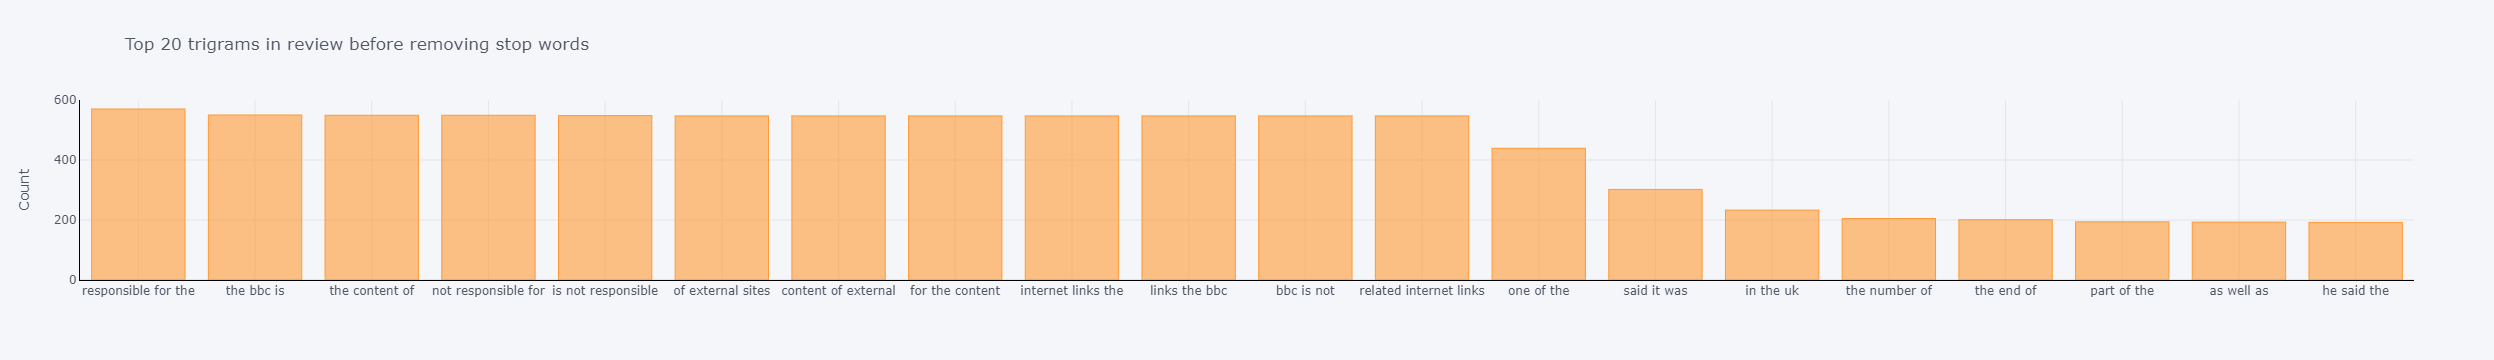

In [ ]:
#The distribution of Top trigrams before removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(bbc['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df6.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

related internet links 547
internet links bbc 547
links bbc responsible 547
bbc responsible content 547
responsible content external 547
content external sites 547
year old man 189
year old woman 57
told bbc news 55
president barack obama 53
year old boy 47
post mortem examination 40
prime minister david 39
minister david cameron 39
fire rescue service 39
19 year old 36
old man arrested 36
21 year old 34
chancellor george osborne 31
18 year old 30


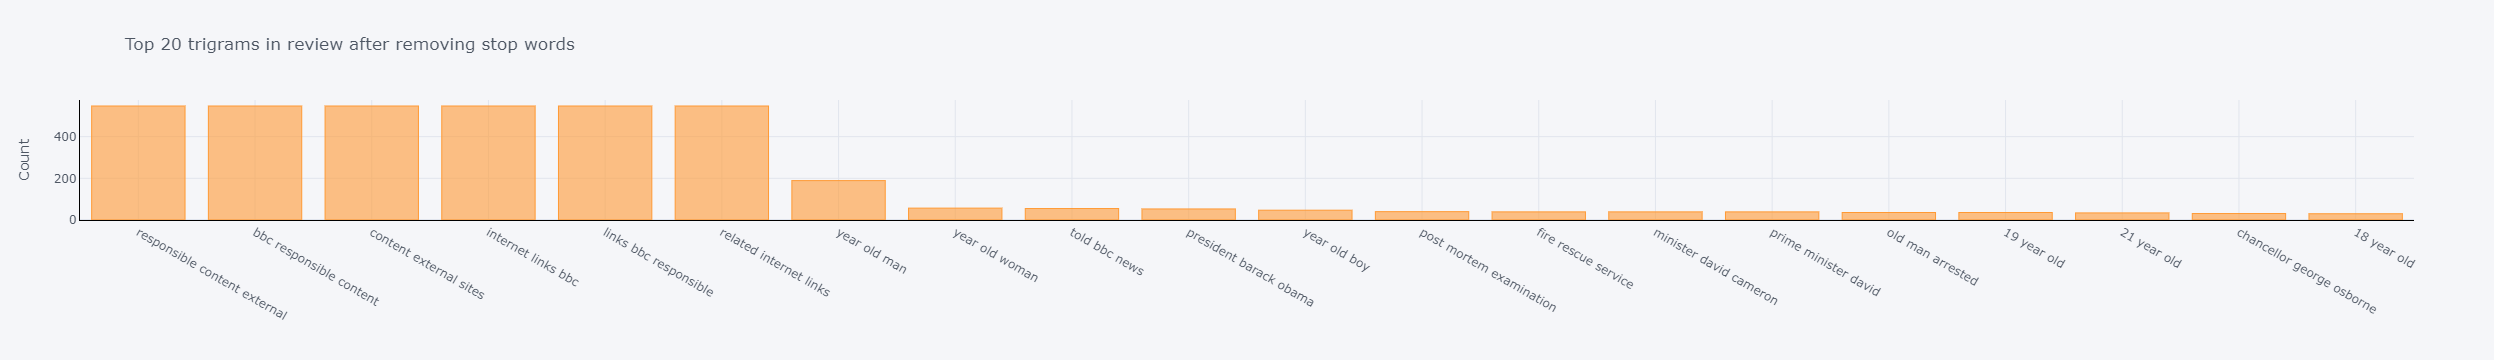

In [ ]:
#The distribution of Top trigrams after removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(bbc['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df7 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df7.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

# Preparing Text of CNN

## Loading CNN dataset with extracted candidate tags

In [861]:
import pandas as pd
cnn = pd.read_csv('D:/DAEN/DAEN 690/Datasets/New Extraction_Checkpoints/cnn_extracted.csv')
cnn

extracted_clean_text  \
0     Story highlights\nTommy Fleetwood and Michael ...   
1     Story highlights\nBruno Senna will replace Nic...   
2     Story highlights\nVera Zvonareva sees off Wimb...   
3     Story highlights\nMacedonia was the only count...   
4     Story highlights\nManchester City ban question...   
...                                                 ...   
3494  Story highlights\nWest Ham beat Queen's Park R...   
3495  Story highlights\nAlexander Lebedev charged wi...   
3496  Story highlights\nPremier League to hold "Chri...   
3497  Story highlights\nSeven-time world champion Mi...   
3498  Story highlights\nFerrari drops idea of challe...   

                                        extracted_title  \
0     Fleetwood and Hoey lead big names in Dunhill L...   
1                 Senna to replace Heidfeld in Belgium    
2         Zvonareva beats Kvitova to reach Tokyo final    
3                           Country profile: Macedonia    
4                    Manchester City ban talk of Tevez    
...                                                 ...   
3494  Vaz Te winner lifts West Ham as QPR are left r...   
3495  Kremlin critic Lebedev: Why I lashed out on TV...   
3496                  Never forget: Football remembers    
3497                 Schumacher coy over Sauber switch    
3498  It's official: Vettel is three-time champion a...   

     extracted_published_date extracted_publisher  \
0                  2011-09-30                 CNN   
1                  2011-08-24                 CNN   
2                  2011-09-30                 CNN   
3                  2011-09-30                 CNN   
4                  2011-09-30                 CNN   
...                       ...                 ...   
3494               2012-10-01                 CNN   
3495               2012-10-01                 CNN   
3496               2012-11-30                 CNN   
3497               2012-10-01                 CNN   
3498               2012-11-30                 CNN   

                                      extractedkeyw_per  \
0     [Tommy Fleetwood, Michael Hoey, Louis Oosthuiz...   
1     [Bruno Senna, Nick Heidfeld, Ayrton Senna, Bru...   
2     [Vera Zvonareva, Petra Kvitova, Maria Sharapov...   
3     [Gjorgje Ivanov, Nikola Gruevski, Ivanov, Alex...   
4     [Carlos Tevez, Tevez, Roberto Mancini, Carlos ...   
...                                                 ...   
3494  [Ricardo Vaz Te, Mark Hughes, Matt Jarvis, Ade...   
3495  [Alexander Lebedev, Lebedev, Lebedev, Alexande...   
3496  [Laurence Binyon 1869-1943, Middlesex, Clapton...   
3497  [Michael Schumacher, Lewis Hamilton, Schumache...   
3498  [Sebastian Vettel, Jean-Eric Vergne's, Luca di...   

                                      extractedkeyw_org  \
0     [Alfred Dunhill Links Championship, Fleetwood,...   
1     [Renault, the Belgian Grand Prix\n, Formula, R...   
2     [Petra Kvitova, WTA, Zvonareva, Pan Pacific, P...   
3     [Skopje, Skopje, the United Nations, the Europ...   
4     [Bayern Munich\nBayern Munich, Champions Leagu...   
...                                                 ...   
3494  [United, Premier League, Hughes, Real Madrid, ...   
3495  [Kremlin, Kremlin, NTVshniki, CNN, the Investi...   
3496  [Manchester United, Manchester United, The “Fo...   
3497  [Formula One, Mercedes, Mercedes, Formula One,...   
3498  [Toro Rosso, Ferrari, FIA, Ferrari, Ferrari, R...   

                                      extractedkeyw_pla url_status  \
0     [Scotland, England, Northern Ireland’s, Scotla...      valid   
1      [Belgium, Sao Paulo, South Korea, Prost, Jordan]      valid   
2     [Tokyo, China, Thailand, Tokyo, Radwanska, Chi...      valid   
3     [Yugoslavia, Greece, Albania, Bulgaria, Greece...      valid   
4     [Manchester City, Manchester City, City, Manch...      valid   
...                                                 ...        ...   
3494                      [London, South Korea, London]      valid   
34

### Import/Install Required Libraries and Packages

In [44]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

### EDA - Wordcloud from titles for possible descriptor tags

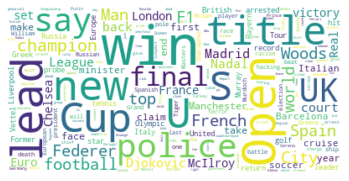

In [45]:
#Creating the text variable

text2 = " ".join(title for title in df1.title)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

### Text Preprocessing,Cleaning and Tokenization

In [122]:
# Convert to list
data3 = cnn.extracted_clean_text.values.tolist()
# Remove Emails
data3 = [re.sub('\S*@\S*\s?', '', sent) for sent in data3]

# Remove new line characters
data3 = [re.sub('\s+', ' ', sent) for sent in data3]

# Remove distracting single quotes
data3 = [re.sub("\'", "", sent) for sent in data3]

pprint(data3[1001:1002])

['Story highlights - Guinea keep Africa Cup of Nations hopes alive with 6-1 '
 'thrashing of Botswana - Ghana beat Mali 2-0 to maintain 100% record - All to '
 'play for in final round of matches with even pointless Botswana able to '
 'qualify for knockout stages Guinea equaled the record for a winning margin '
 'in an Africa Cup of Nations match on Saturday with a 6-1 over 10-man '
 'Botswana in Franceville. Sadio Diallo opened the scoring in the 15th minute '
 'when he coverted a Abdoul Camara cross. Dipsy Selolwane equalized for '
 'Botswana scoring at the second attempt from a penalty in the 23rd minute '
 'after Jerome Ramatlhakwana was brought down by Guinea goalkeeper Naby '
 'Yattara. But parity didnt last long as Diallo scored his second four minutes '
 'later to put Guinea back in front. Camara extended the lead in the 42nd '
 'minute and Ibrahima Traore made it 4-1 in first half injury time. The '
 'Stuttgart winger scored from a free kick which saw Botswana substitute '
 '

In [47]:
#Function for tokenizing
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[1001:1002])

[['story', 'highlights', 'guinea', 'keep', 'africa', 'cup', 'of', 'nations', 'hopes', 'alive', 'with', 'thrashing', 'of', 'botswana', 'ghana', 'beat', 'mali', 'to', 'maintain', 'record', 'all', 'to', 'play', 'for', 'in', 'final', 'round', 'of', 'matches', 'with', 'even', 'pointless', 'botswana', 'able', 'to', 'qualify', 'for', 'knockout', 'stages', 'guinea', 'equaled', 'the', 'record', 'for', 'winning', 'margin', 'in', 'an', 'africa', 'cup', 'of', 'nations', 'match', 'on', 'saturday', 'with', 'over', 'man', 'botswana', 'in', 'franceville', 'sadio', 'diallo', 'opened', 'the', 'scoring', 'in', 'the', 'th', 'minute', 'when', 'he', 'coverted', 'abdoul', 'camara', 'cross', 'dipsy', 'selolwane', 'equalized', 'for', 'botswana', 'scoring', 'at', 'the', 'second', 'attempt', 'from', 'penalty', 'in', 'the', 'rd', 'minute', 'after', 'jerome', 'ramatlhakwana', 'was', 'brought', 'down', 'by', 'guinea', 'goalkeeper', 'naby', 'yattara', 'but', 'parity', 'didnt', 'last', 'long', 'as', 'diallo', 'scored

### Prepare NLTK Stop words

In [48]:
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS

stop_words = stopwords.words('english')
stop_words.extend(list(STOP_WORDS))
stop_words.extend(['said','say'])



In [49]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Visualizing Unigrams in text before and after removing stopwords

In [50]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

the 128903
to 55852
of 50885
in 50489
and 43500
for 19552
on 18762
was 17133
that 17050
he 16274
is 16153
with 15521
it 15359
his 13884
said 13881
at 13353
as 11735
but 10323
has 9685
have 9359


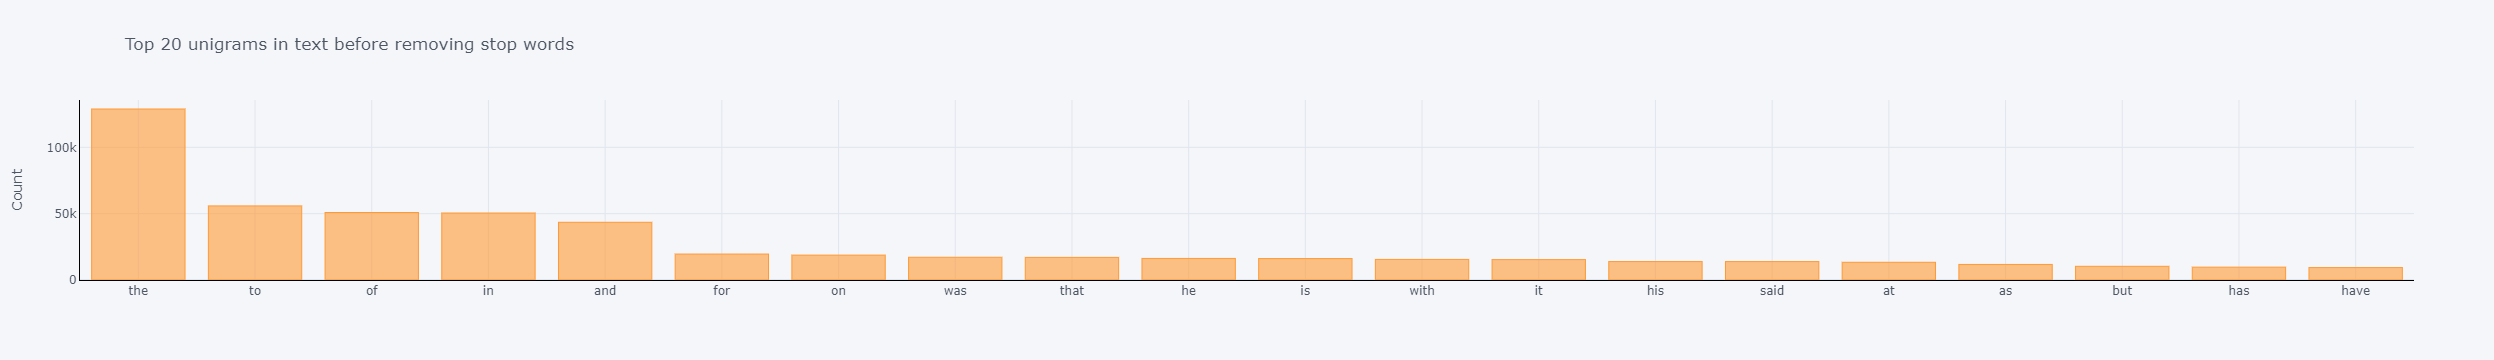

In [51]:
#The distribution of top unigrams before removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(cnn['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df2.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams in text before removing stop words')

year 5929
world 5388
time 4574
story 3789
win 3686
second 3663
highlights 3531
people 3201
new 3162
told 2966
police 2819
years 2752
match 2710
open 2577
team 2573
old 2567
season 2498
home 2357
says 2343
league 2328


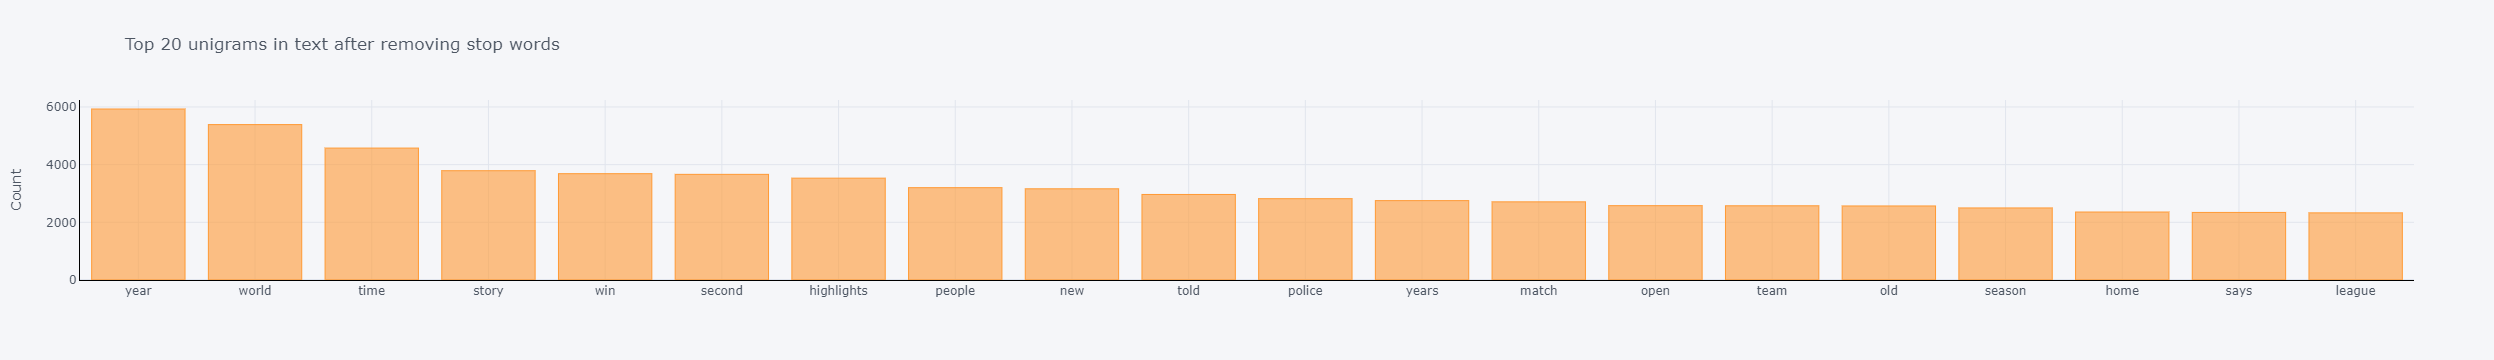

In [52]:
#The distribution of top unigrams after removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = frozenset(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(cnn['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df3.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams in text after removing stop words')

### Identifying bigrams/trigrams

In [53]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1001]]])

['story_highlights', 'guinea', 'keep', 'africa_cup', 'of', 'nations', 'hopes', 'alive', 'with', 'thrashing', 'of', 'botswana', 'ghana', 'beat', 'mali', 'to', 'maintain', 'record', 'all', 'to', 'play', 'for', 'in', 'final', 'round', 'of', 'matches', 'with', 'even', 'pointless', 'botswana', 'able', 'to', 'qualify', 'for', 'knockout_stages', 'guinea', 'equaled', 'the', 'record', 'for', 'winning', 'margin', 'in', 'an', 'africa_cup', 'of', 'nations', 'match', 'on', 'saturday', 'with', 'over', 'man', 'botswana', 'in', 'franceville', 'sadio', 'diallo', 'opened', 'the', 'scoring', 'in', 'the', 'th_minute', 'when', 'he', 'coverted', 'abdoul', 'camara', 'cross', 'dipsy', 'selolwane', 'equalized', 'for', 'botswana', 'scoring', 'at', 'the', 'second', 'attempt', 'from', 'penalty', 'in', 'the', 'rd_minute', 'after', 'jerome', 'ramatlhakwana', 'was', 'brought', 'down', 'by', 'guinea', 'goalkeeper', 'naby', 'yattara', 'but', 'parity', 'didnt', 'last', 'long', 'as', 'diallo', 'scored', 'his', 'second',

In [54]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [56]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized3 = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized3[1001:1002])

[['story_highlight', 'nation', 'hope', 'alive', 'thrash', 'beat', 'maintain', 'record', 'play', 'final', 'round', 'match', 'pointless', 'able', 'qualify', 'knockout_stage', 'guinea', 'equal', 'record', 'win', 'open', 'scoring', 'th_minute', 'coverte', 'equalize', 'score', 'second', 'attempt', 'penalty', 'bring', 'guinea', 'goalkeeper', 'naby', 'yattara', 'parity', 'long', 'score', 'second', 'minute', 'later', 'guinea', 'camara', 'extend', 'half', 'injury', 'time', 'stuttgart', 'winger', 'score', 'free_kick', 'see', 'send', 'foul', 'feindouno', 'guinea', 'see', 'chance', 'come', 'second', 'half', 'mamadou', 'bah', 'naby', 'soumah', 'complete', 'rout', 'minute', 'later', 'group', 'match', 'beat', 'asamoah_gyan', 'open', 'score', 'free_kick', 'rd_minute', 'double', 'black', 'star', 'lead', 'minute', 'later', 'saturday', 'result', 'mean', 'world', 'quarter', 'finalist', 'sit', 'group', 'point', 'mali', 'point', 'place', 'point', 'mathematical', 'chance', 'qualify', 'knockout_stage', 'decid

### Visualizing Bigrams in text before and after removing stopwords

of the 14035
in the 13768
to the 5444
at the 5270
for the 4733
on the 4688
story highlights 3490
to be 2951
and the 2721
with the 2453
the first 2404
from the 2381
it was 2376
he said 2319
year old 2107
the world 2073
has been 2041
said the 1906
will be 1902
he was 1827


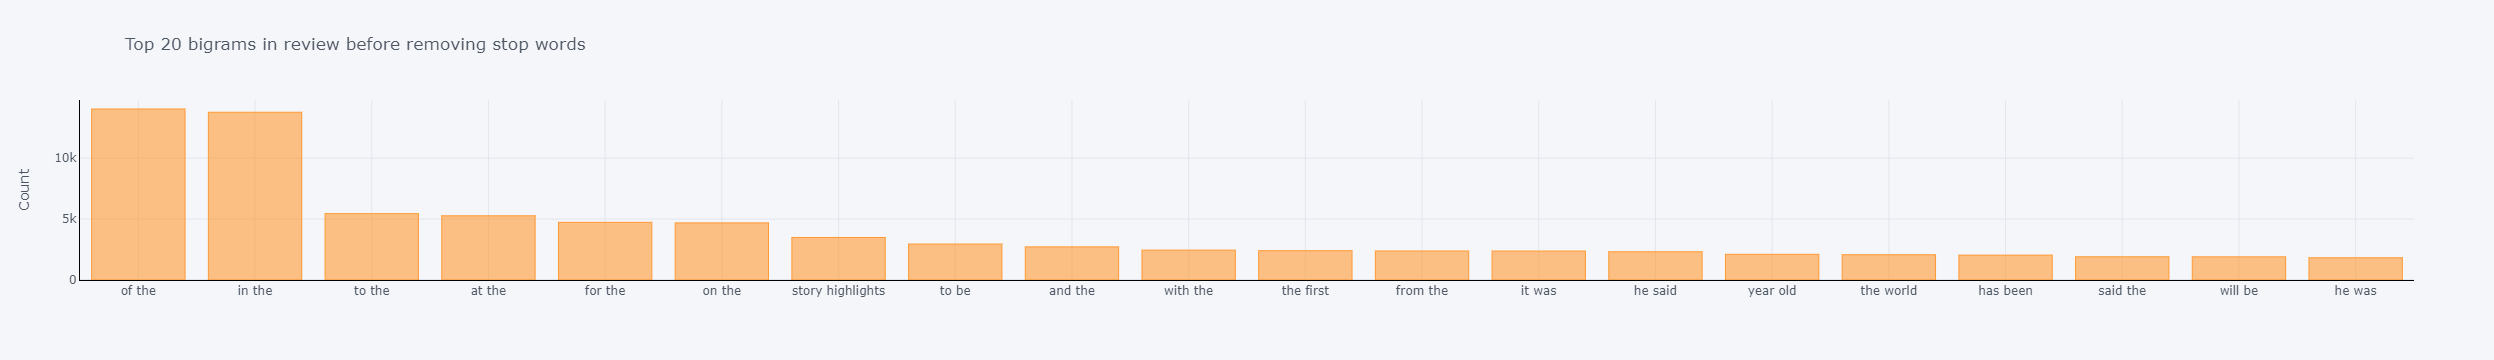

In [57]:
#The distribution of top bigrams before removing stop words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(cnn['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df4.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')

story highlights 3490
year old 2108
prime minister 1001
told cnn 997
premier league 753
grand slam 737
united states 621
champions league 588
grand prix 581
contributed report 576
manchester united 515
world cup 461
real madrid 446
manchester city 436
second half 426
world champion 411
phone hacking 405
open champion 391
highlights new 380
red bull 373


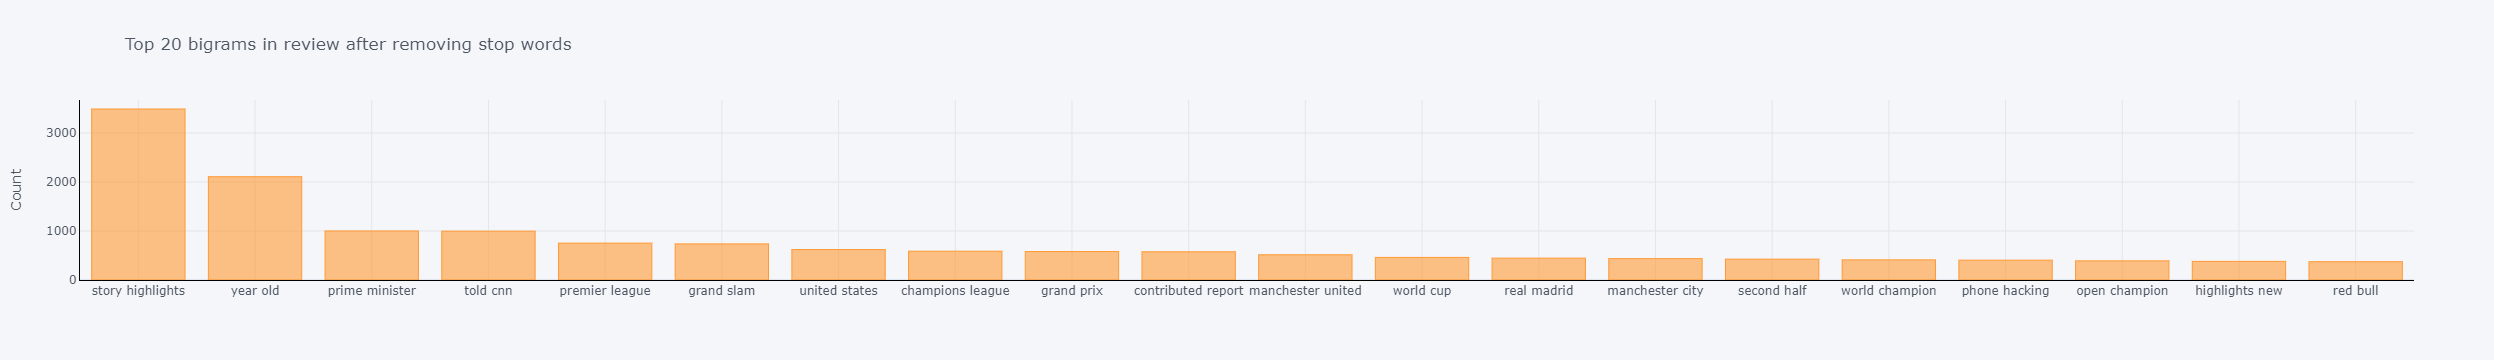

In [58]:
#The distribution of top bigrams after removing stop words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(cnn['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df5.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

### Visualizing Trigrams in text before and after removing stopwords

one of the 969
contributed to this 593
of the world 592
the united states 581
to this report 576
the end of 552
the first time 537
in the second 508
out of the 473
as well as 449
for the first 443
in the world 441
according to the 428
of the season 423
in the first 418
story highlights new 377
said in statement 357
top of the 352
in the final 347
part of the 343


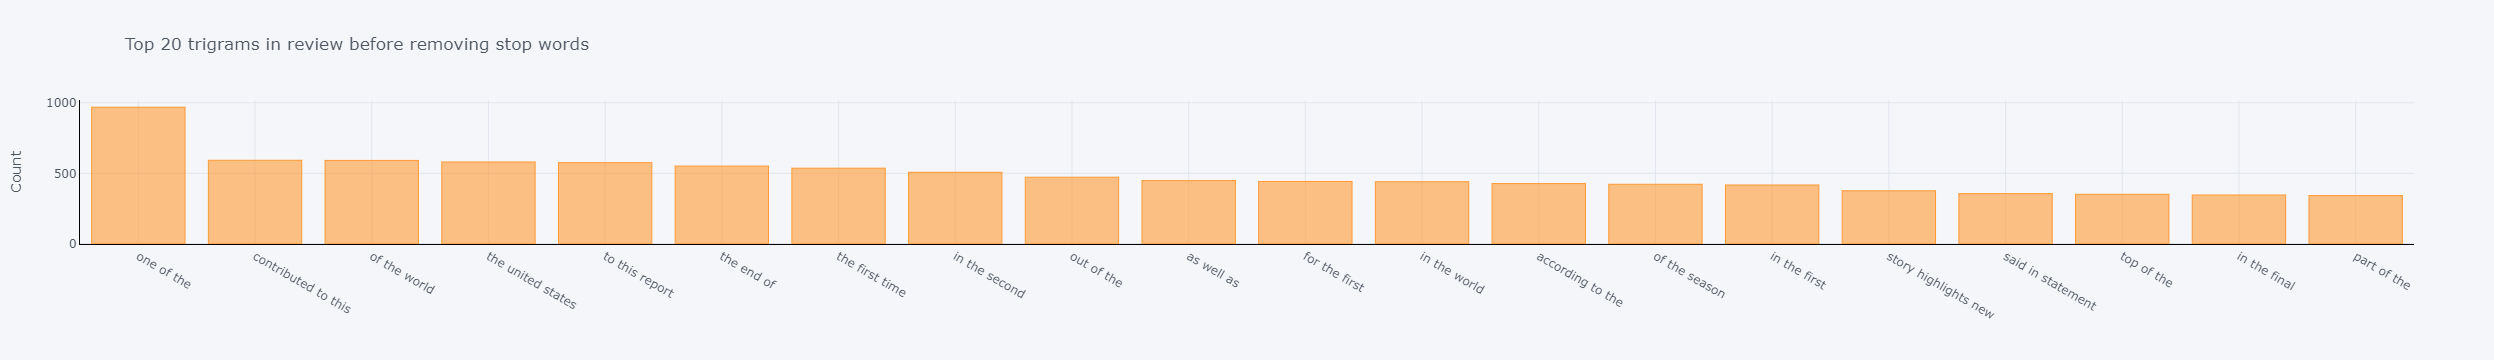

In [59]:
#The distribution of Top trigrams before removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(cnn['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df6.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

story highlights new 380
english premier league 339
time grand slam 192
jo wilfried tsonga 138
european champions league 127
time major winner 126
queens park rangers 126
juan martin del 118
22 year old 117
martin del potro 117
25 year old 114
prime minister david 111
minister david cameron 111
time world champion 107
30 year old 104
grand slam winner 104
24 year old 103
international monetary fund 102
queen elizabeth ii 96
21 year old 95


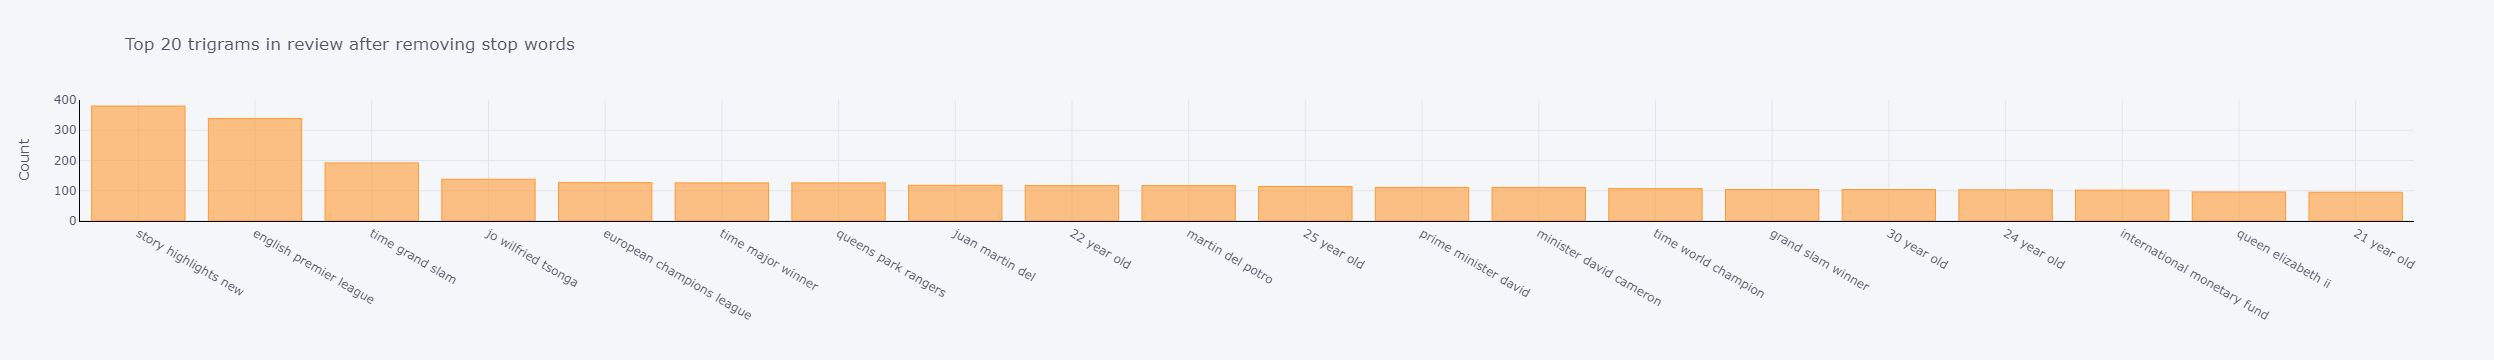

In [60]:
#The distribution of Top trigrams after removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(cnn['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df7 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df7.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

# Create Master Dictionary and corpus for all 3 candidate datasets

In [515]:
# Create Dictionary
id2word1 = corpora.Dictionary(data_lemmatized1)
print("\nThe dictionary now has: " + str(len(id2word1)) + " tokens")
id2word1.add_documents(data_lemmatized2)
print("\nThe dictionary now has: " + str(len(id2word1)) + " tokens")
id2word1.add_documents(data_lemmatized3)
print("\nThe dictionary now has: " + str(len(id2word1)) + " tokens")

corpus1 = [id2word1.doc2bow(text) for text in data_lemmatized1]
corpus2 = [id2word1.doc2bow(text) for text in data_lemmatized2]
corpus3 = [id2word1.doc2bow(text) for text in data_lemmatized3]


The dictionary now has: 21697 tokens

The dictionary now has: 29989 tokens

The dictionary now has: 40751 tokens


In [912]:
corpus2 = [id2word1.doc2bow(text) for text in data_lemmatized2]

# Topic Modeling for Aljazeera using Master Dictionary

### Build LDA model

In [516]:

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus1,
                                           id2word=id2word1,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

### Measure Metrics of Model - Coherence/Perplexity

In [517]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus1))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized1, dictionary=id2word1, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.656229963373315

Coherence Score:  0.4089819113891663


### Visualization of Topics identified by Model

In [518]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus1, id2word1)
vis

D:\DAEN\Python\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.206525  0.129261       1        1  28.290911
5      0.020198  0.201370       2        1  17.959816
0     -0.229848 -0.177204       3        1  17.213023
7     -0.162515 -0.186861       4        1  15.088103
1     -0.062578  0.161869       5        1  13.709208
6      0.158986  0.089219       6        1   7.152602
4      0.246748 -0.112353       7        1   0.376572
2      0.235534 -0.105300       8        1   0.209766, topic_info=                 Term         Freq        Total Category  logprob  loglift
271           israeli  3232.000000  3232.000000  Default  30.0000  30.0000
195              kill  2980.000000  2980.000000  Default  29.0000  29.0000
1915      palestinian  2500.000000  2500.000000  Default  28.0000  28.0000
178             force  2029.000000  2029.000000  Default  27.0000  27.0000
157            attack  2705.000000  2705.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
2896   democratically     0.087929     4.236636   Topic8  -9.4799   2.2919
21572         tatlise     0.054955     2.643846   Topic8  -9.9499   2.2935
20533        aristide     0.065489    19.531752   Topic8  -9.7745   0.4690
8801             tiph     0.052353     6.433295   Topic8  -9.9984   1.3557
17206       freelance     0.050798     5.642681   Topic8 -10.0285   1.4567

[395 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.927011  accord
0         5  0.072202  accord
60        3  0.065370  accuse
60        5  0.933416  accuse
763       4  0.997080     act
...     ...       ...     ...
1052      6  0.200641   world
244       3  0.998869   wound
59        1  0.822997    year
59        2  0.074586    year
59        6  0.101998    year

[531 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 1, 8, 2, 7, 5, 3])

### Building LDA-Mallet model for comparision

In [519]:
import os

os.environ['MALLET_HOME'] = 'C:/Users/Madesh/mallet-2.0.8/mallet-2.0.8'

from gensim.models.wrappers import LdaMallet

mallet_path = 'C:/Users/Madesh/mallet-2.0.8/mallet-2.0.8/bin/mallet.bat'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus1, num_topics=8, id2word=id2word1)


In [520]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized1, dictionary=id2word1, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('year', 0.018593469462280514),
   ('country', 0.00925108791576641),
   ('company', 0.009083716259395636),
   ('oil', 0.00888591339277563),
   ('world', 0.006816591095827881),
   ('pay', 0.006573141413834028),
   ('large', 0.006162320075469401),
   ('market', 0.005934085998600164),
   ('water', 0.005888439183226317),
   ('money', 0.005781929947354006)]),
 (1,
  [('kill', 0.03944700979840072),
   ('attack', 0.03618087622480009),
   ('soldier', 0.02391879716184255),
   ('people', 0.018780268048203628),
   ('force', 0.017189435747268837),
   ('police', 0.014204865412771708),
   ('fire', 0.012642189435747268),
   ('military', 0.012529564140105868),
   ('troop', 0.011642639936929834),
   ('wound', 0.01009404212186057)]),
 (2,
  [('arrest', 0.019303018525715768),
   ('charge', 0.014703977199119056),
   ('group', 0.01421816297447856),
   ('suspect', 0.01131947143412359),
   ('court', 0.01080126959450706),
   ('authority', 0.010687912942090944),
   ('release', 0.010347842984842596),
  

### Find Optimal number of topics to feed the model to identify

In [554]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus1, num_topics=num_topics, id2word=id2word1,random_seed = 96)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [555]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word1, corpus=corpus1, texts=data_lemmatized1, start=2, limit=14, step=2)

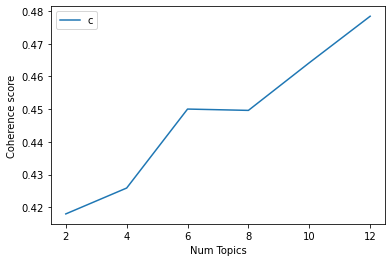

In [556]:
# Show graph
limit=14; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [563]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.418
Num Topics = 4  has Coherence Value of 0.4259
Num Topics = 6  has Coherence Value of 0.45
Num Topics = 8  has Coherence Value of 0.4496
Num Topics = 10  has Coherence Value of 0.4642
Num Topics = 12  has Coherence Value of 0.4784


In [564]:
cv_values = []
for i,(m, cv) in enumerate(zip(x, coherence_values)):
    if m <=10:
        cv_values.append(cv)
index = cv_values.index(max(cv_values))
index
       

4

#### selecting the most optimal and efficient number of topics <10 to make sure the articles are not overclassified

In [565]:
# Select the model and print the topics
optimal_model = model_list[index]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.021*"year" + 0.011*"company" + 0.011*"country" + 0.011*"oil" + '
  '0.010*"government" + 0.008*"world" + 0.008*"pay" + 0.007*"market" + '
  '0.007*"large" + 0.007*"increase"'),
 (1,
  '0.029*"people" + 0.019*"day" + 0.010*"protest" + 0.008*"city" + '
  '0.008*"home" + 0.007*"leave" + 0.007*"time" + 0.007*"hour" + '
  '0.007*"thousand" + 0.006*"year"'),
 (2,
  '0.061*"israeli" + 0.051*"palestinian" + 0.014*"peace" + 0.011*"state" + '
  '0.009*"occupy" + 0.009*"land" + 0.008*"group" + 0.008*"occupation" + '
  '0.008*"continue" + 0.007*"plan"'),
 (3,
  '0.031*"government" + 0.020*"political" + 0.019*"leader" + 0.014*"election" '
  '+ 0.013*"vote" + 0.012*"party" + 0.012*"war" + 0.011*"opposition" + '
  '0.011*"country" + 0.010*"power"'),
 (4,
  '0.031*"attack" + 0.028*"official" + 0.027*"group" + 0.023*"security" + '
  '0.022*"people" + 0.018*"arrest" + 0.018*"suspect" + 0.016*"police" + '
  '0.016*"report" + 0.014*"authority"'),
 (5,
  '0.011*"muslim" + 0.011*"world" + 0.011*"w

### Convert Mallet model to LDA model to visualize the topics

In [566]:
def convertldaGenToldaMallet(mallet_model):
    model_gensim = gensim.models.ldamodel.LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

optimal_model = convertldaGenToldaMallet(optimal_model)

In [567]:
#Visualizing Opitmal Model

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus1, id2word1)
vis

D:\DAEN\Python\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log

D:\DAEN\Python\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

D:\DAEN\Python\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.160419 -0.064810       1        1  10.753811
9      0.330716  0.015606       2        1  10.726315
3     -0.187150  0.124376       3        1  10.602692
6     -0.126830  0.176751       4        1  10.531196
0     -0.163665 -0.170602       5        1  10.292903
2      0.046540  0.125457       6        1  10.072748
1      0.112437 -0.195769       7        1   9.577076
8     -0.054807  0.080093       8        1   9.317497
4      0.179713  0.159460       9        1   9.100647
7      0.023465 -0.250561      10        1   9.025114, topic_info=             Term         Freq        Total Category  logprob  loglift
271       israeli  3348.000000  3348.000000  Default  30.0000  30.0000
1915  palestinian  2842.000000  2842.000000  Default  29.0000  29.0000
195          kill  2828.000000  2828.000000  Default  28.0000  28.0000
157        attack  3311.000000  3311.000000  Default  27.0000  27.0000
178         force  2455.000000  2455.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
278           man   226.136397  1211.883409  Topic10  -5.3893   0.7264
1010         long   200.765004   717.194509  Topic10  -5.5083   1.1319
585          live   195.249468   762.464717  Topic10  -5.5361   1.0429
566          high   189.733956   681.353863  Topic10  -5.5648   1.1267
283        people   190.837063  3932.363383  Topic10  -5.5590  -0.6204

[850 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4697      8  0.999677     abuse
920       3  0.955179     abyei
4896      7  0.999667  accident
0         2  0.090417    accord
0         3  0.097815    accord
...     ...       ...       ...
59        8  0.223232      year
59       10  0.143792      year
4853      9  1.002228    yemeni
2703      4  0.012022   zionist
2703      6  0.985828   zionist

[1318 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 4, 7, 1, 3, 2, 9, 5, 8])

### Dominant topic in each sentence

In [826]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus1, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus1, texts=data1)

# Format
df_dominant_topic_aljazeera = df_topic_sents_keywords.reset_index()
df_dominant_topic_aljazeera.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic_aljazeera.head(10)

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3415267829.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3415267829.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               8              0.5134   
1            1               8              0.4034   
2            2               9              0.2464   
3            3               9              0.2172   
4            4               9              0.4218   
5            5               7              0.3090   
6            6               5              0.1992   
7            7               0              0.4110   
8            8               7              0.3358   
9            9               6              0.2307   

                                            Keywords  \
0  charge, year, court, case, human_right, accuse...   
1  charge, year, court, case, human_right, accuse...   
2  kill, force, attack, soldier, troop, military,...   
3  kill, force, attack, soldier, troop, military,...   
4  kill, force, attack, soldier, troop, military,...   
5  find, child, year, water, work, launch, includ...   
6  muslim, world, woman, people, country, state, ...   
7  year, company, country, oil, government, world...   
8  find, child, year, water, work, launch, includ...   
9  country, united_state, weapon, iraqi, official...   

                                                Text  
0  War crimes Serb commander pleads guilty A Bosn...  
1  Obesity suit against McDonald’s dismissed A US...  
2  Rumsfeld says Iraq is improving On a visit to ...  
3  One killed in Beirut Shia rivalry One person h...  
4  UN troops foiled by Congo weather Heavy rain h...  
5  British Airways seeking security British Airwa...  
6  CIA desperately seeking linguists The Central ...  
7  Stars urge Bush to think of rainforest A group...  
8  Sonic boom goes bust The ear-splitting crack o...  
9  Dalai Lama wants no-strings homecoming The Dal...

In [574]:
df_dominant_topic_aljazeera[(df_dominant_topic_aljazeera.Dominant_Topic == 1) & (df_dominant_topic_aljazeera.Topic_Perc_Contrib > 0.5)]

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
1104         1104               1              0.5987   
1238         1238               1              0.5296   
3316         3316               1              0.5577   
3319         3319               1              0.5277   
3321         3321               1              0.5343   
3337         3337               1              0.5107   
3395         3395               1              0.5080   

                                               Keywords  \
1104  people, day, protest, city, home, leave, time,...   
1238  people, day, protest, city, home, leave, time,...   
3316  people, day, protest, city, home, leave, time,...   
3319  people, day, protest, city, home, leave, time,...   
3321  people, day, protest, city, home, leave, time,...   
3337  people, day, protest, city, home, leave, time,...   
3395  people, day, protest, city, home, leave, time,...   

                                                   Text  
1104  Luxury rules Paris fashion show Luxury ruled t...  
1238  Horse racing icon Shoemaker dies Legendary joc...  
3316  Survivors grieve in ghost city The survivors o...  
3319  Iran earthquake toll climbs to 25,000 The toll...  
3321  California mudslide toll up to seven At least ...  
3337  Aid trickling into Iran disaster zone Teams ca...  
3395  Rescuers pull baby from Bam rubble A baby girl...

### Most representative document for each topic

In [569]:
# Group top article under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

Topic_Num  Topic_Perc_Contrib  \
0          0              0.6509   
1          1              0.5987   
2          2              0.5524   
3          3              0.5917   
4          4              0.5429   
5          5              0.8983   
6          6              0.6050   
7          7              0.6308   
8          8              0.5486   
9          9              0.6844   

                                            Keywords  \
0  year, company, country, oil, government, world...   
1  people, day, protest, city, home, leave, time,...   
2  israeli, palestinian, peace, state, occupy, la...   
3  government, political, leader, election, vote,...   
4  attack, official, group, security, people, arr...   
5  muslim, world, woman, people, country, state, ...   
6  country, united_state, weapon, iraqi, official...   
7  find, child, year, water, work, launch, includ...   
8  charge, year, court, case, human_right, accuse...   
9  kill, force, attack, soldier, troop, military,...   

                                                Text  
0  Exxon Mobil, Qatar seal gas deal Qatar has sig...  
1  Luxury rules Paris fashion show Luxury ruled t...  
2  The question of settlements With their red-til...  
3  Sri Lankan PM condemns president The Sri Lanka...  
4  Saudi publishes ‘most wanted’ list Saudi Arabi...  
5  ignore it pleeeeeeeeeeeease This is summary Th...  
6  Iran vows nuclear ‘transparency’ Iran has prom...  
7  Genes mutate to trigger mental disorder US and...  
8  British justice stands accused The British gov...  
9  Two US soldiers, one Iraqi killed Two US soldi...

### Visualizing Word Count and Importance of Topic Keywords

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\240022297.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\240022297.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\240022297.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\240022297.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\240022297.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\240022297.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\240022297.py:25: UserWarning:

FixedFormatter should only be used together with

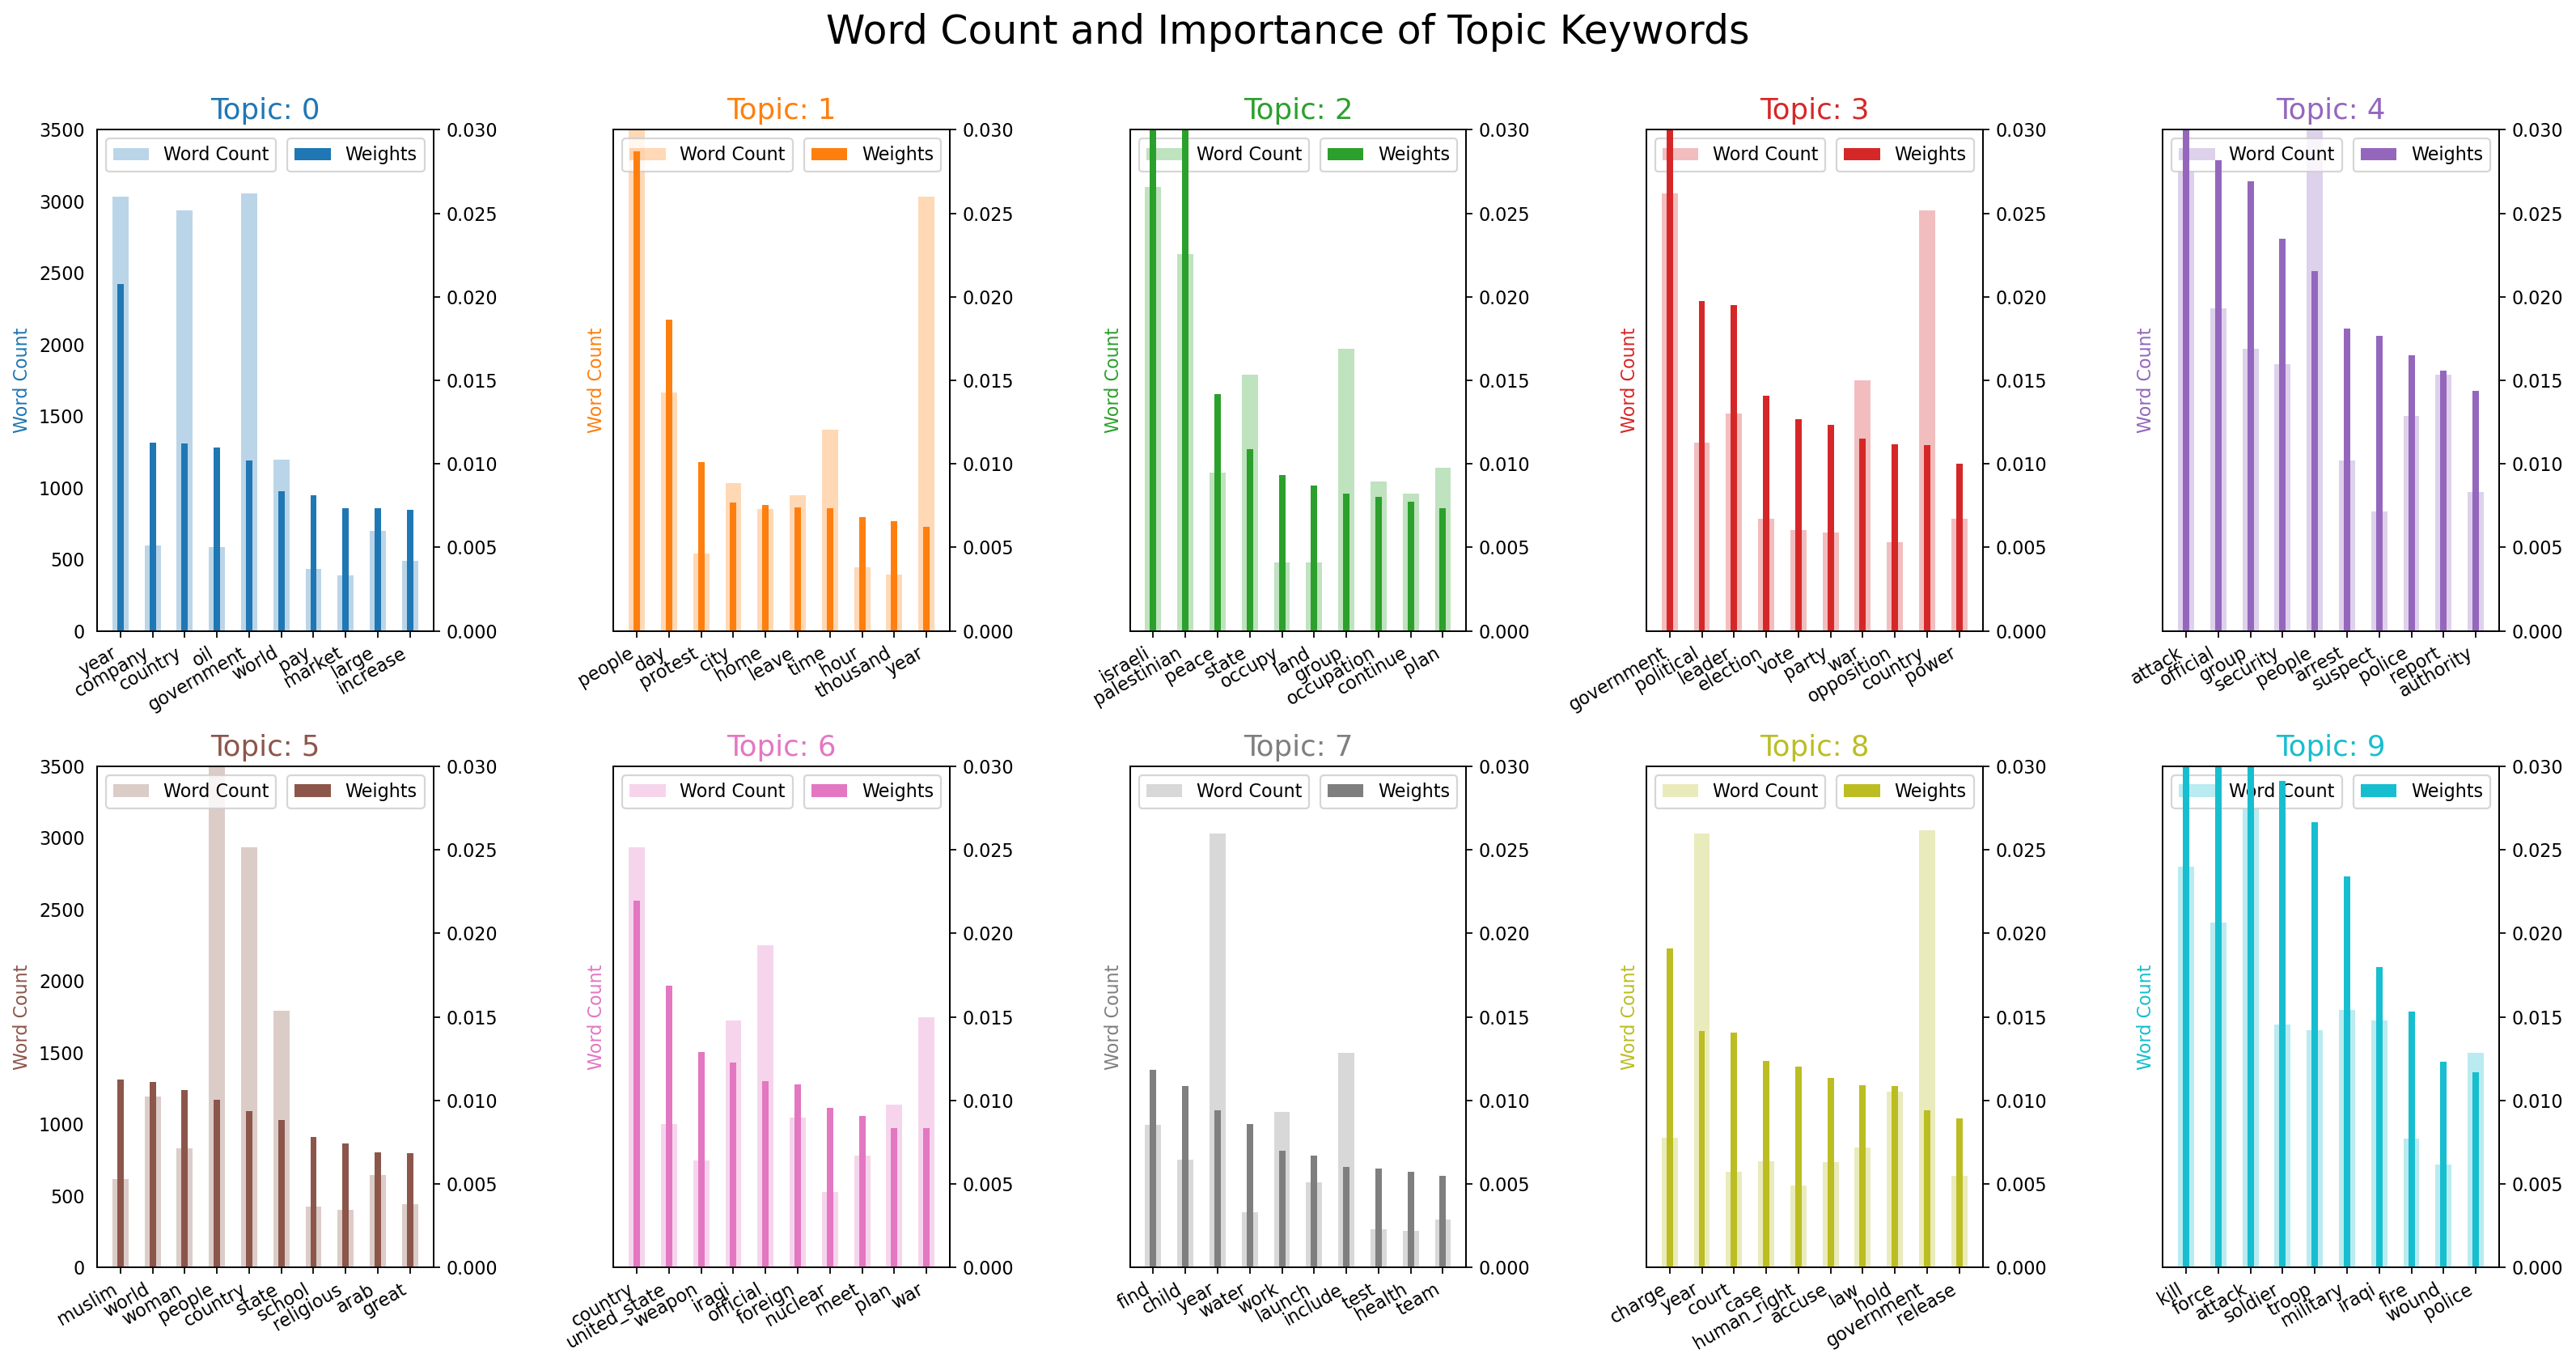

In [570]:
import matplotlib.colors as mcolors
from collections import Counter
topics = optimal_model.show_topics(formatted=False)
data_flat = [w for w_list in data_lemmatized1 for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 5, figsize=(20,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### Topic labelling

In [827]:
topic_labels = ["Economy","Accidents_Disaster","Israeli_Palestinian_Conflict","Politics","Crime","Education","War","Science","Legal","Government"]   

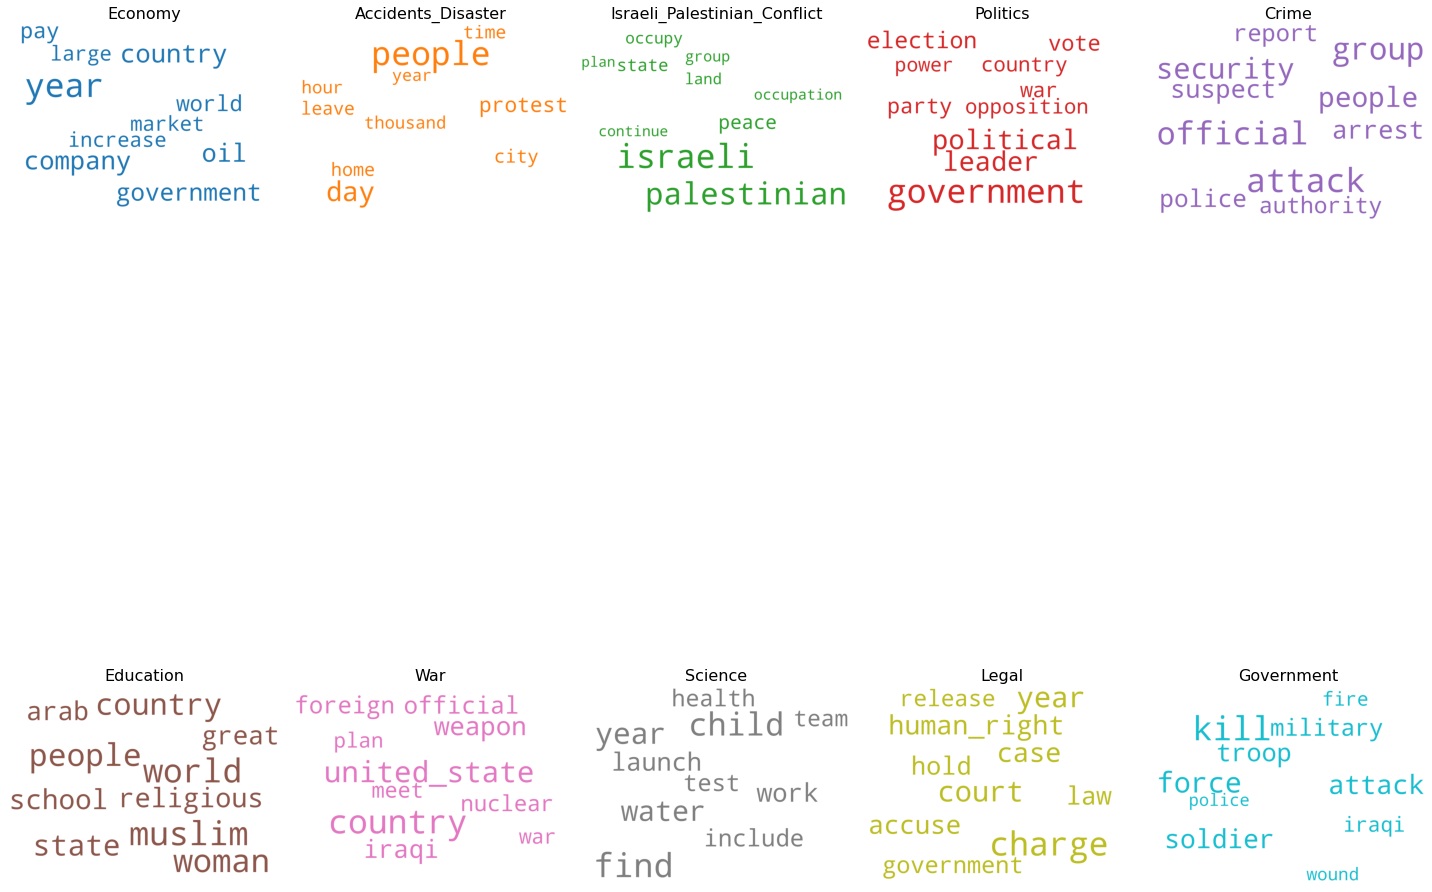

In [828]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(topic_labels[i], fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=5, hspace=5)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Save LDA model


In [880]:
from gensim.test.utils import datapath
temp_file = datapath("model_1")
optimal_model.save(temp_file)

### Grouping Dataset as collections based on identified Topics

In [829]:
df_dominant_topic_aljazeera['Dominant_Topic'] = df_dominant_topic_aljazeera['Dominant_Topic'].replace([0,1,2,3,4,5,6,7,8,9], topic_labels)

In [830]:
topic_extracted = df_dominant_topic_aljazeera[['Dominant_Topic', 'Keywords']]

In [814]:
tags_organizer(aljazeera)

extracted_clean_text  \
0     War crimes Serb commander pleads guilty\nA Bos...   
1     Obesity suit against McDonald’s dismissed\nA U...   
2     Rumsfeld says Iraq is improving\nOn a visit to...   
3     One killed in Beirut Shia rivalry\nOne person ...   
4     UN troops foiled by Congo weather\nHeavy rain ...   
...                                                 ...   
3411  ECB head sent letter bomb\nGerman prosecutors ...   
3412  UK temporarily shuts Peru embassy\nBritain has...   
3413  Aid to Iran could bridge gaps\nThe internation...   
3414  Settler numbers up 16%\nThe population of Jewi...   
3415  Jordan textbooks to explain resistance\nJordan...   

                                 extracted_title extracted_published_date  \
0       War crimes Serb commander pleads guilty                2003-09-04   
1     Obesity suit against McDonald’s dismissed                2003-09-04   
2               Rumsfeld says Iraq is improving                2003-09-04   
3             One killed in Beirut Shia rivalry                2003-09-04   
4             UN troops foiled by Congo weather                2003-09-04   
...                                          ...                      ...   
3411                  ECB head sent letter bomb                2003-12-30   
3412          UK temporarily shuts Peru embassy                2003-12-30   
3413              Aid to Iran could bridge gaps                2003-12-30   
3414                     Settler numbers up 16%                2003-12-30   
3415     Jordan textbooks to explain resistance                2003-12-30   

     extracted_publisher                                  extractedkeyw_per  \
0              Aljazeera                           [Susica, BiljanaPlavsic]   
1              Aljazeera                                      [RobertSweet]   
2              Aljazeera  [Rumsfeld, DonaldRumsfeld, Rumsfeld, Rumsfeld,...   
3              Aljazeera  [Amal, HizbAllah, MayaBeydoun, HizbAllah, Amal...   
4              Aljazeera                    [Fataki, Bule, RogelineLotsove]   
...                  ...                                                ...   
3411           Aljazeera         [Jean-ClaudeTrichet, Bologna, RomanoProdi]   
3412           Aljazeera                             [LowerHuallagaValleys]   
3413           Aljazeera  [PaulvonMaltzahn, ColinPowell, Powell, Powell,...   
3414           Aljazeera  [ArielSharon, GinotAryeh, RachelAvital, GinotA...   
3415           Aljazeera  [Jordan, KhalidTuqan, AlRaiJordan, AbdAllahII,...   

                                      extractedkeyw_org  \
0     [UN, DraganNikolic, Nikolic, InternationalCrim...   
1     [McDonald’s, McDonald’s, McDonald’s, Sweet, Mc...   
2                   [Sanchez, Unflappable\nImmediately]   
3              [Aljazeera, Aljazeera, HizbAllah, House]   
4     [UN, UN, UN, UN, Bunia, UN, UN, UN, UN, Bunia\...   
...                                                 ...   
3411  [theEuropeanCentralBank, ECB, theEuropeanUnion...   
3412  [theForeignOffice, ForeignOffice, theForeignOf...   
3413          [State, UnitedNations, TheWashingtonPost]   
3414                [Netzarim, Sharon, Defence, Avital]   
3415  [AlRai, theUnitedNationsEducational, Scientifi...   

                                      extractedkeyw_pla url_status  \
0               [Yugoslavia, Bosnia, Hague, Yugoslavia]      valid   
1                                              [US, US]      valid   
2     [Iraq, Iraq, US, Baghdad, US, Iraq, US, US, Ir...      valid   
3     [Beirut, Lebanon, Maamoura, SouthBeirut, Lebanon]      valid   
4     [Congo, Fataki, Congo, Bunia, Ireland, Fataki,...      valid   
...                                                 ...        ...   
3411            [Italy, Frankfurt, Italy, Prodi, Prodi]      valid   
3412  [UK, Peru, Britain, Lima, Lima, Lima, Peru, Pe...      valid   
3413  [Iran, Iran, theUnitedStates, Washington, Tehr...      valid   
3414  [theWestBank, GazaStrip, Israel, Gaza

In [831]:
al_tagged = pd.concat([aljazeera, topic_extracted], axis=1)

In [832]:
Aljazeera_Collections=[]
for i, x in al_tagged.groupby('Dominant_Topic'):
    globals()['Aljazeera_tagged' + "_" + str(i)] = x
    Aljazeera_Collections.append('Aljazeera_tagged_' + str(i))
Aljazeera_Collections

['Aljazeera_tagged_Accidents_Disaster',
 'Aljazeera_tagged_Crime',
 'Aljazeera_tagged_Economy',
 'Aljazeera_tagged_Education',
 'Aljazeera_tagged_Government',
 'Aljazeera_tagged_Israeli_Palestinian_Conflict',
 'Aljazeera_tagged_Legal',
 'Aljazeera_tagged_Politics',
 'Aljazeera_tagged_Science',
 'Aljazeera_tagged_War']

In [858]:
Aljazeera_tagged_Economy

extracted_clean_text  \
7     Stars urge Bush to think of rainforest\nA grou...   
14    Bush attacked on Iraq, economy\nUS President G...   
17    Israel cracks down on foreign workers\nWith un...   
20    Flat screen or box TV: The debate\nWith global...   
21    Iraq: A long trip for slim pickings\nK.P.B Unn...   
...                                                 ...   
3314  Brazil unveils plan to control favelas\nBrazil...   
3340  Parmalat chief arrested\nThe founder and forme...   
3371  Australia to cash in on US beef woes\nAustrali...   
3376  China to have biggest shipyard\nConstruction h...   
3402  Asian powers in joint Internet project\nJapan,...   

                              extracted_title extracted_published_date  \
7     Stars urge Bush to think of rainforest                2003-09-05   
14            Bush attacked on Iraq, economy                2003-09-05   
17     Israel cracks down on foreign workers                2003-09-05   
20         Flat screen or box TV: The debate                2003-09-05   
21       Iraq: A long trip for slim pickings                2003-09-05   
...                                       ...                      ...   
3314  Brazil unveils plan to control favelas                2003-12-27   
3340                 Parmalat chief arrested                2003-12-28   
3371    Australia to cash in on US beef woes                2003-12-29   
3376          China to have biggest shipyard                2003-12-29   
3402  Asian powers in joint Internet project                2003-12-30   

     extracted_publisher                                  extractedkeyw_per  \
7              Aljazeera  [Bush, GeorgeBush, SusanSarandon, RubenBlades,...   
14             Aljazeera  [Bush, GeorgeBush, RichardGephardt, GeorgeBush...   
17             Aljazeera  [OritFriedman, BenjaminNetanyahu, RamiAdut, Ro...   
20             Aljazeera                [LeeKangsuk, AnSung-ho, SeikoEpson]   
21             Aljazeera  [Halliburton, ReyadHijazi, SebastianJoseph, Pa...   
...                  ...                                                ...   
3314           Aljazeera                               [Lula, Lula, Recife]   
3340           Aljazeera  [CalistoTanzi, Parma, EnricoBondi, GrantThornt...   
3371           Aljazeera     [DavidHalliday, RichardRains, SangerAustralia]   
3376           Aljazeera                [ChenXiaojin, ZhouZhenbo, Jiangnan]   
3402           Aljazeera                                                 []   

                                      extractedkeyw_org  \
7     [theInter-AmericanDevelopmentBank, TheUSExport...   
14    [NewMexicoUniversity, theCongressionalHispanic...   
17    [theImmigrationAdministration, theImmigrationA...   
20    [LCD, LCD, Reuters, SamsungElectronics’, LCD, ...   
21    [Bechtel, theUSArmyCorpsofEngineers, DHL, Bech...   
...                                                 ...   
3314  [MinistryofCities, Reuters, theCorreioBrazilie...   
3340  [Tanzi, Tanzi, Parmalat, Parmalat, Parmalat, T...   
3371  [AustralianAgriculturalCompanyLtd, MacquarieEq...   
3376  [ChinaStateShipbuildingCorp, Hudong, theStateC...   
3402  [theNihonKeizaiShimbun, IPv4, HitachiLtd, Nipp...   

                                      extractedkeyw_pla url_status  \
7     [US, ChevyChase, US, Peru, Peru, Peru, Lima, P...      valid   
14    [Iraq, US, NorthCarolina, Iraq, Iraq, Connecti...      valid   
17    [Israel, Israel, TelAviv’s, Israel, Israel, Ch...      valid   
20                                  [SouthKorea, Korea]      valid   
21    [Iraq, K.P.B, Unnithan, Arlington, Virginia, I...      valid   
...                                                 ...        ...   
3314  [Brazil, Brazil, Brazil, Brazil, SaoPaulo, Rio...      valid   
3340  [Parmalat, Italy, Milan, Parmalat, Tanzi, Parm...      valid   
3371  [Australia, US, Australia, theUnitedStates, US...      valid   
3376  [China, China, Shanghai, China, Shanghai, Chin...      valid   
3402  [Ja

In [847]:
print(tags_counter(Aljazeera_tagged_Accidents_Disaster))
print(Aljazeera_tagged_Accidents_Disaster.extracted_published_date.min())
print(Aljazeera_tagged_Accidents_Disaster.extracted_published_date.max())

['Bush', 'Reuters', 'US']
2003-09-06
2003-12-30


In [850]:
print(tags_counter(Aljazeera_tagged_Crime))
print(Aljazeera_tagged_Crime.extracted_published_date.min())
print(Aljazeera_tagged_Crime.extracted_published_date.max())

['Saddam', 'al-Qaida', 'US']
2003-09-05
2003-12-30


In [851]:
print(tags_counter(Aljazeera_tagged_Economy))
print(Aljazeera_tagged_Economy.extracted_published_date.min())
print(Aljazeera_tagged_Economy.extracted_published_date.max())

['Bush', 'EU', 'US']
2003-09-05
2003-12-30


In [852]:
print(tags_counter(Aljazeera_tagged_Education))
print(Aljazeera_tagged_Education.extracted_published_date.min())
print(Aljazeera_tagged_Education.extracted_published_date.max())

['Bush', 'Islam', 'US']
2003-09-05
2003-12-30


In [853]:
print(tags_counter(Aljazeera_tagged_Israeli_Palestinian_Conflict))
print(Aljazeera_tagged_Israeli_Palestinian_Conflict.extracted_published_date.min())
print(Aljazeera_tagged_Israeli_Palestinian_Conflict.extracted_published_date.max())

['Arafat', 'Hamas', 'Israel']
2003-09-06
2003-12-30


In [854]:
print(tags_counter(Aljazeera_tagged_Legal))
print(Aljazeera_tagged_Legal.extracted_published_date.min())
print(Aljazeera_tagged_Legal.extracted_published_date.max())

['Saddam', 'al-Qaida', 'US']
2003-09-04
2003-12-30


In [855]:
print(tags_counter(Aljazeera_tagged_Politics))
print(Aljazeera_tagged_Politics.extracted_published_date.min())
print(Aljazeera_tagged_Politics.extracted_published_date.max())

['Kumaratunga', 'EU', 'US']
2003-09-05
2003-12-30


In [856]:
print(tags_counter(Aljazeera_tagged_Science))
print(Aljazeera_tagged_Science.extracted_published_date.min())
print(Aljazeera_tagged_Science.extracted_published_date.max())

['', 'NASA', 'US']
2003-09-05
2003-12-30


In [857]:
print(tags_counter(Aljazeera_tagged_War))
print(Aljazeera_tagged_War.extracted_published_date.min())
print(Aljazeera_tagged_War.extracted_published_date.max())

['Bush', 'UN', 'Iraq']
2003-09-05
2003-12-30


# Topic Modeling for BBC using Master Dictionary

### Load the Pre-Trained LDA Topic Model

In [881]:
# Load LDA model
from gensim.test.utils import datapath
temp_file = datapath("model_1")
lda_model = gensim.models.ldamodel.LdaModel.load(temp_file)

### Load Master Dictionary

In [883]:
from gensim.test.utils import datapath
temp_file = datapath("model_1.id2word")
dictionary = corpora.Dictionary.load(temp_file)

### Update Model's corpus

In [913]:
lda_model.update(corpus2)

D:\DAEN\Python\anaconda3\lib\site-packages\gensim\models\ldamodel.py:1108: RuntimeWarning:

invalid value encountered in multiply

D:\DAEN\Python\anaconda3\lib\site-packages\gensim\models\ldamodel.py:1109: RuntimeWarning:

invalid value encountered in subtract



### Model Tuning using LDA Mallet

In [914]:
import os

os.environ['MALLET_HOME'] = 'C:/Users/Madesh/mallet-2.0.8/mallet-2.0.8'

from gensim.models.wrappers import LdaMallet

mallet_path = 'C:/Users/Madesh/mallet-2.0.8/mallet-2.0.8/bin/mallet.bat'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus2, num_topics=index*2+2, id2word=dictionary)


In [915]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized2, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('people', 0.03509849066257355),
   ('home', 0.01309797902276797),
   ('city', 0.01204911742133538),
   ('day', 0.010974673829623945),
   ('area', 0.010437452033768228),
   ('water', 0.009183934510104887),
   ('publish', 0.00803274494755692),
   ('town', 0.007623433103095421),
   ('leave', 0.007623433103095421),
   ('close', 0.006830391404451267)]),
 (1,
  [('find', 0.01886841422268362),
   ('child', 0.018349338178043084),
   ('people', 0.01458603685439917),
   ('health', 0.009732675837010122),
   ('publish', 0.009187645990137555),
   ('number', 0.00905787697897742),
   ('problem', 0.008694523747729043),
   ('patient', 0.0076044640539839085),
   ('risk', 0.007422787438359719),
   ('test', 0.007344926031663639)]),
 (2,
  [('service', 0.021387597082221856),
   ('plan', 0.020183659498123275),
   ('school', 0.01959349401572201),
   ('work', 0.016713486461603835),
   ('wale', 0.012157408937466066),
   ('year', 0.011000684591959586),
   ('staff', 0.010859044876183282),
   ('people', 

### Find Optimal number of topics to feed the model to identify

In [922]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus2, num_topics=num_topics, id2word=dictionary,random_seed=96)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [923]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus2, texts=data_lemmatized2, start=2, limit=14, step=2)

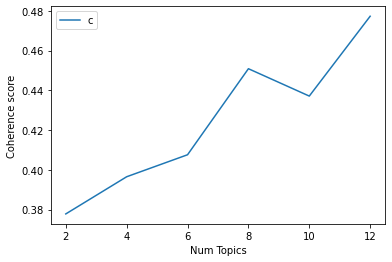

In [924]:
# Show graph
limit=14; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [925]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3778
Num Topics = 4  has Coherence Value of 0.3965
Num Topics = 6  has Coherence Value of 0.4076
Num Topics = 8  has Coherence Value of 0.4509
Num Topics = 10  has Coherence Value of 0.4371
Num Topics = 12  has Coherence Value of 0.4773


In [926]:
cv_values = []
for i,(m, cv) in enumerate(zip(x, coherence_values)):
    if m <=10:
        cv_values.append(cv)
index = cv_values.index(max(cv_values))
index
       

3

#### selecting the most optimal and efficient number of topics <10 to make sure the articles are not overclassified

In [927]:
# Select the model and print the topics
optimal_model = model_list[index]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.018*"child" + 0.015*"people" + 0.014*"find" + 0.012*"publish" + '
  '0.010*"number" + 0.010*"health" + 0.009*"water" + 0.009*"problem" + '
  '0.008*"risk" + 0.007*"patient"'),
 (1,
  '0.025*"year" + 0.015*"company" + 0.013*"month" + 0.012*"business" + '
  '0.010*"fall" + 0.010*"rise" + 0.009*"increase" + 0.008*"money" + '
  '0.008*"oil" + 0.008*"high"'),
 (2,
  '0.015*"case" + 0.014*"charge" + 0.013*"court" + 0.011*"claim" + '
  '0.011*"report" + 0.010*"publish" + 0.010*"give" + 0.009*"order" + '
  '0.009*"month" + 0.009*"year"'),
 (3,
  '0.022*"government" + 0.017*"service" + 0.017*"school" + 0.015*"plan" + '
  '0.015*"cut" + 0.010*"wale" + 0.010*"public" + 0.010*"change" + 0.009*"year" '
  '+ 0.008*"work"'),
 (4,
  '0.020*"work" + 0.013*"include" + 0.011*"site" + 0.011*"year" + '
  '0.010*"publish" + 0.010*"world" + 0.009*"open" + 0.008*"time" + '
  '0.007*"film" + 0.006*"build"'),
 (5,
  '0.033*"people" + 0.018*"family" + 0.014*"home" + 0.013*"day" + '
  '0.011*"event" + 0

### Convert Mallet model to LDA model to visualize the topics

In [928]:
def convertldaGenToldaMallet(mallet_model):
    model_gensim = gensim.models.ldamodel.LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

optimal_model = convertldaGenToldaMallet(optimal_model)

In [929]:
#Visualizing Opitmal Model

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus2, dictionary)
vis

D:\DAEN\Python\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log

D:\DAEN\Python\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

D:\DAEN\Python\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.205197  0.000655       1        1  14.482392
1      0.184072 -0.150844       2        1  13.215882
6      0.008106 -0.091960       3        1  12.663761
5     -0.076221  0.299500       4        1  12.369427
4      0.137463  0.216208       5        1  12.257559
0      0.014394 -0.159158       6        1  12.109389
2     -0.092404 -0.068584       7        1  12.043057
7     -0.380608 -0.045817       8        1  10.858534, topic_info=            Term         Freq        Total Category  logprob  loglift
214       police  2053.000000  2053.000000  Default  30.0000  30.0000
278          man  1605.000000  1605.000000  Default  29.0000  29.0000
283       people  2629.000000  2629.000000  Default  28.0000  28.0000
410   government  1770.000000  1770.000000  Default  27.0000  27.0000
444         work  1632.000000  1632.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1380    hospital   328.777170   620.297530   Topic8  -4.7833   1.5854
157       attack   341.348061   694.358915   Topic8  -4.7457   1.5101
333         find   390.664618  1339.072450   Topic8  -4.6108   0.9883
1826       death   232.077994   615.310013   Topic8  -5.1316   1.2452
2818      appeal   226.276033   373.040931   Topic8  -5.1569   1.7203

[648 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4697      7  0.997594     abuse
4896      8  0.999080  accident
60        7  0.998480    accuse
763       3  0.223787       act
763       7  0.776261       act
...     ...       ...       ...
59        5  0.169780      year
59        6  0.049378      year
59        7  0.127842      year
147       4  0.479667     young
147       6  0.521860     young

[872 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 7, 6, 5, 1, 3, 8])

### Dominant topic in each sentence

In [932]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus2, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus2, texts=data2)

# Format
df_dominant_topic_bbc = df_topic_sents_keywords.reset_index()
df_dominant_topic_bbc.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic_bbc.head(10)

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\2614169379.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\2614169379.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               2              0.2695   
1            1               5              0.3510   
2            2               4              0.1978   
3            3               2              0.3186   
4            4               7              0.4340   
5            5               2              0.4111   
6            6               3              0.2930   
7            7               3              0.4368   
8            8               7              0.4284   
9            9               6              0.3488   

                                            Keywords  \
0  case, charge, court, claim, report, publish, g...   
1  people, family, home, day, event, live, leave,...   
2  work, include, site, year, publish, world, ope...   
3  case, charge, court, claim, report, publish, g...   
4  police, man, publish, link, fire, responsible,...   
5  case, charge, court, claim, report, publish, g...   
6  government, service, school, plan, cut, wale, ...   
7  government, service, school, plan, cut, wale, ...   
8  police, man, publish, link, fire, responsible,...   
9  kill, country, force, official, report, govern...   

                                                Text  
0  Partner of murder victim Ronald Todd hands ove...  
1  Replica unveiled for stolen Auchengeich mining...  
2  Newspapers analyse Hagues foreign policy speec...  
3  Bogus Staffordshire vets convicted of fraud - ...  
4  Fatal crash lorry driver arrested - Published ...  
5  Luton teenager jailed after video exposes rape...  
6  Energy plans could create thousands of jobs in...  
7  Shops into schools in five months - Published ...  
8  Cardiff house fire kills one, injures two - Pu...  
9  Isle of Wights Gaza flotilla man back home - P...

### Most representative document for each topic

In [934]:
# Group top article under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

Topic_Num  Topic_Perc_Contrib  \
0          0              0.6600   
1          1              0.7087   
2          2              0.6512   
3          3              0.6470   
4          4              0.5775   
5          5              0.5622   
6          6              0.6307   
7          7              0.5426   

                                            Keywords  \
0  child, people, find, publish, number, health, ...   
1  year, company, month, business, fall, rise, in...   
2  case, charge, court, claim, report, publish, g...   
3  government, service, school, plan, cut, wale, ...   
4  work, include, site, year, publish, world, ope...   
5  people, family, home, day, event, live, leave,...   
6  kill, country, force, official, report, govern...   
7  police, man, publish, link, fire, responsible,...   

                                                Text  
0  Teenagers risk premature babies - Published Pr...  
1  Investors weigh up China bank options - Publis...  
2  Polanski lawyers claim extradition request unf...  
3  Education sector in England braced for 25% cut...  
4  To the trilogy and beyond... - Published Its a...  
5  Abrupt end to German football-fest - Published...  
6  UN urges inquiry into Israel convoy raid - Pub...  
7  Arrest after man shot outside Gloucester home ...

In [938]:
df_dominant_topic_bbc[(df_dominant_topic_bbc.Dominant_Topic == 5) & (df_dominant_topic_bbc.Topic_Perc_Contrib > 0.40)]


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
15             15               5              0.4277   
116           116               5              0.5262   
148           148               5              0.4048   
159           159               5              0.4886   
401           401               5              0.5206   
437           437               5              0.5029   
573           573               5              0.4355   
625           625               5              0.4778   
632           632               5              0.4120   
727           727               5              0.4028   
1168         1168               5              0.4176   
1187         1187               5              0.4437   
1211         1211               5              0.5111   
1318         1318               5              0.5144   
1361         1361               5              0.4312   
1426         1426               5              0.4739   
1456         1456               5              0.4402   
1472         1472               5              0.4718   
1501         1501               5              0.4672   
1590         1590               5              0.4482   
1599         1599               5              0.4124   
1649         1649               5              0.4042   
1703         1703               5              0.5320   
1805         1805               5              0.4393   
2104         2104               5              0.4171   
2154         2154               5              0.5622   
2228         2228               5              0.4859   
2239         2239               5              0.4245   
2345         2345               5              0.4744   
2448         2448               5              0.4801   
2523         2523               5              0.4977   
2683         2683               5              0.4707   
2688         2688               5              0.4228   
2711         2711               5              0.4312   
2762         2762               5              0.4854   
2763         2763               5              0.5598   
2816         2816               5              0.4277   
2904         2904               5              0.4119   

                                               Keywords  \
15    people, family, home, day, event, live, leave,...   
116   people, family, home, day, event, live, leave,...   
148   people, family, home, day, event, live, leave,...   
159   people, family, home, day, event, live, leave,...   
401   people, family, home, day, event, live, leave,...   
437   people, family, home, day, event, live, leave,...   
573   people, family, home, day, event, live, leave,...   
625   people, family, home, day, event, live, leave,...   
632   people, family, home, day, event, live, leave,...   
727   people, family, home, day, event, live, leave,...   
1168  people, family, home, day, event, live, leave,...   
1187  people, family, home, day, event, live, leave,...   
1211  people, family, home, day, event, live, leave,...   
1318  people, family, home, day, event, live, leave,...   
1361  people, family, home, day, event, live, leave,...   
1426  people, family, home, day, event, live, leave,...   
1456  people, family, home, day, event, live, leave,...   
1472  people, family, home, day, event, live, leave,...   
1501  people, family, home, day, event, live, leave,...   
1590  people, family, home, day, event, live, leave,...   
1599  people, family, home, day, event, live, leave,...   
1649  people, family, home, day, event, live, leave,...   
1703  people, family, home, day, event, live, leave,...   
1805  people, family, home, day, event, live, leave,...   
2104  people, family, home, day, event, live, leave,...   
2154  people, family, home, day, event, live, leave,...   
2228  people, family, home, day, event, live, leave,...   
2239  people, family, home, day, event, live, leave,...   
2345  people, family, home, day, event, live, leave,...   
2448  people

### Visualizing Word Count and Importance of Topic Keywords

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\2876219823.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\2876219823.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\2876219823.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\2876219823.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\2876219823.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\2876219823.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\2876219823.py:25: UserWarning:

FixedFormatter should only be used togeth

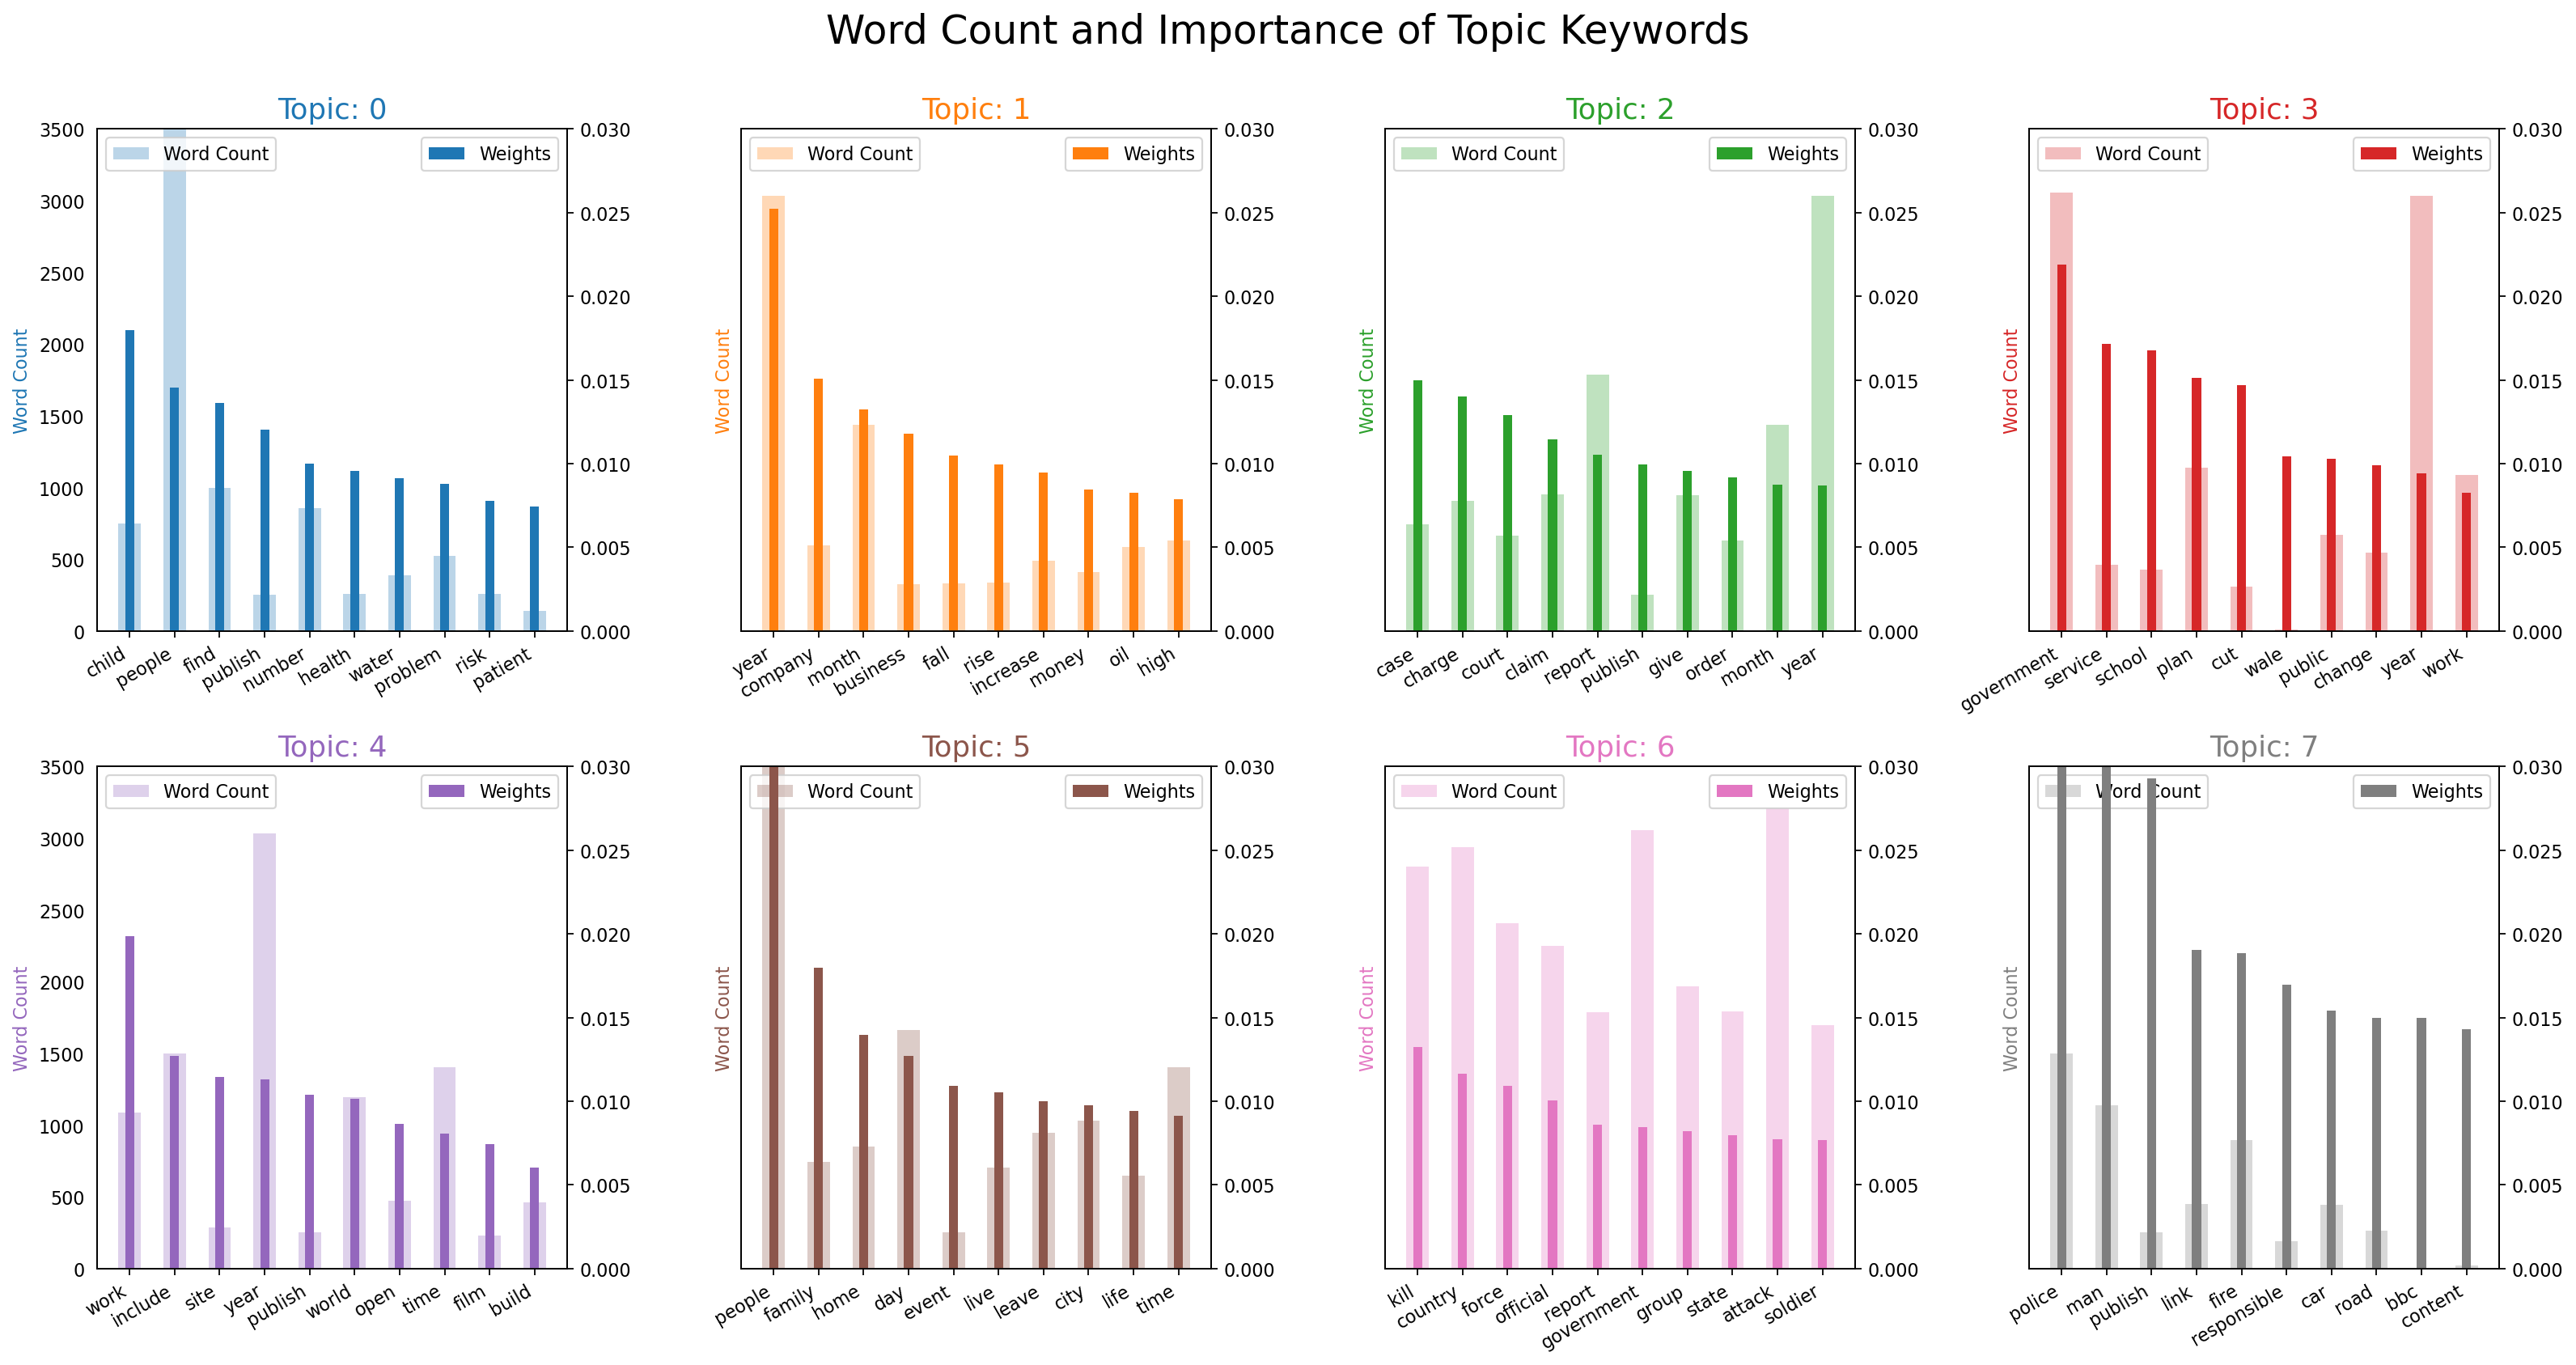

In [931]:
import matplotlib.colors as mcolors
from collections import Counter
topics = optimal_model.show_topics(formatted=False)
data_flat = [w for w_list in data_lemmatized1 for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 4, figsize=(20,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### Topic labelling

In [939]:
topic_labels = ["Health","Economy","Legal","Government","Entertainment","World","Violence","Accident"]   

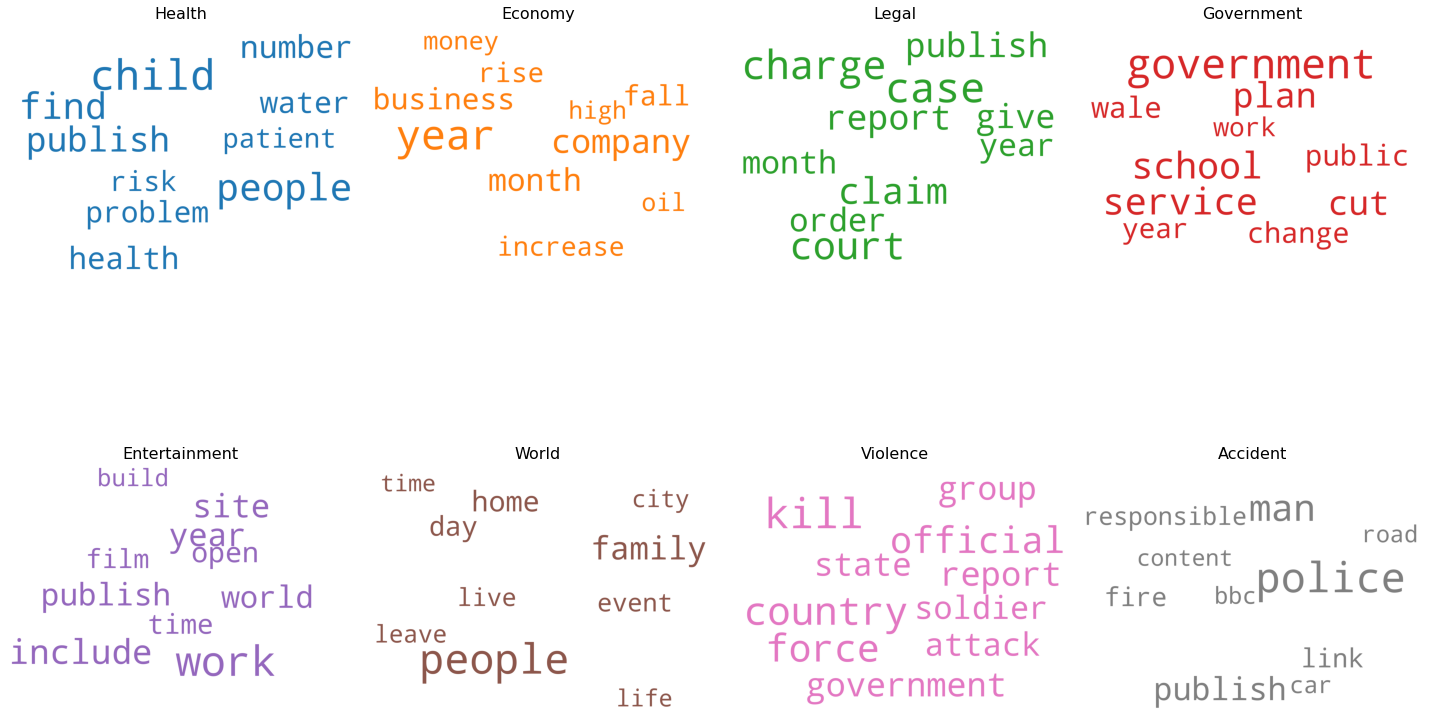

In [940]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 4, figsize=(20,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(topic_labels[i], fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### save LDA model

In [941]:
from gensim.test.utils import datapath
temp_file = datapath("model_1")
optimal_model.save(temp_file)

### Grouping Dataset as collections based on identified Topics

In [942]:
df_dominant_topic_bbc['Dominant_Topic'] = df_dominant_topic_bbc['Dominant_Topic'].replace([0,1,2,3,4,5,6,7], topic_labels)

In [943]:
topic_extracted = df_dominant_topic_bbc[['Dominant_Topic', 'Keywords']]

In [946]:
tags_organizer(bbc)

extracted_clean_text  \
0     Partner of murder victim Ronald Todd hands ove...   
1     Replica unveiled for stolen Auchengeich mining...   
2     Newspapers analyse Hague's foreign policy spee...   
3     Bogus Staffordshire vets convicted of fraud\n-...   
4     Fatal crash lorry driver arrested\n- Published...   
...                                                 ...   
2995  Lorry driver 'lucky to be alive' after Coventr...   
2996  Vyrnwy estate around Lake Vyrnwy up for sale\n...   
2997  Boy dies after Birmingham hospital neglect\n- ...   
2998  St Margaret's private school set to close\n- P...   
2999  Blackpool tram driver summonsed over pedestria...   

                                        extracted_title  \
0     Partner of murder victim Ronald Todd hands ove...   
1     Replica unveiled for stolen Auchengeich mining...   
2     Newspapers analyse Hague's foreign policy spee...   
3     Bogus Staffordshire vets convicted of fraud - ...   
4          Fatal crash lorry driver arrested - BBC News   
...                                                 ...   
2995  Lorry driver 'lucky to be alive' after Coventr...   
2996  Vyrnwy estate around Lake Vyrnwy up for sale -...   
2997  Boy dies after Birmingham hospital neglect - B...   
2998  St Margaret's private school set to close - BB...   
2999  Blackpool tram driver summonsed over pedestria...   

     extracted_published_date extracted_publisher  \
0                  2010-06-29            BBC News   
1                  2010-06-04            BBC News   
2                  2010-07-02            BBC News   
3                  2010-06-18            BBC News   
4                  2010-06-30            BBC News   
...                       ...                 ...   
2995               2010-06-06            BBC News   
2996               2010-07-05            BBC News   
2997               2010-07-06            BBC News   
2998               2010-06-11            BBC News   
2999               2010-06-09            BBC News   

                                      extractedkeyw_per  \
0     [RonaldTodd, JulieAnnScott, RonaldTodd, Lisbur...   
1     [JohnMcKenna, AlexSalmond, JohnMcKenna, TomCur...   
2     [WilliamHague, Andy, Andy, Murray, CharlesSaat...   
3        [OlanrewajuOduloju, Lerwill-Carter, MarkEades]   
4                                           [HaddsLane]   
...                                                 ...   
2995                                            [Lorry]   
2996                            [KnightFrank, TonyWray]   
2997  [NasserulddinAlbana, SarahOrmond-Walshe, Bartt...   
2998  [StMargaret's, StMargaret's, BlairNimmo, StMar...   
2999  [MaureenFoxwell, Norbreck, PaulEdensor, MrsFox...   

                                      extractedkeyw_org  \
0     [theSeriousOrganisedCrimeAgency, theRiverLagan...   
1     [Auchengeich, CCTV, theAuchengeichMiners'Welfa...   
2     [theDailyTelegraph's, Times, theFinancialTimes...   
3     [Rugeley, StaffordCrownCourt, StaffordshireCou...   
4                                          [Goole, BBC]   
...                                                 ...   
2995        [Coventry, TheWestMidlandsAmbulanceService]   
2996  [TheLiverpoolCorporation, CliveHopkins, Knight...   
2997  [HeartlandsHospital, NasserulddinMuset, theRoy...   
2998  [Edinburgh, KPMG, KPMG, Edinburgh, BBCScotland...   
2999  [theRailAccidentInvestigationBranch, Blackpool...   

                                      extractedkeyw_pla url_status  \
0                          [Belfast, Ravarnet, Belfast]      valid   
1            [Replica, Scotland, Moodiesburn, Scotland]      valid   
2       [Hague, UK, MrHague, Britain, MakeBritaingreat]      valid   
3                          [Staffordshire, UK, Nigeria]      valid   
4     [SouthYorkshire, Thorne, Doncaster, EastYorksh...      valid   
...                                                 ...        ...   
2995                              [Meriden, Bickenhill]      valid   
29

In [947]:
bbc_tagged = pd.concat([bbc, topic_extracted], axis=1)

In [948]:
BBC_Collections=[]
for i, x in bbc_tagged.groupby('Dominant_Topic'):
    globals()['BBC_tagged' + "_" + str(i)] = x
    BBC_Collections.append('BBC_tagged_' + str(i))
BBC_Collections

['BBC_tagged_Accident',
 'BBC_tagged_Economy',
 'BBC_tagged_Entertainment',
 'BBC_tagged_Government',
 'BBC_tagged_Health',
 'BBC_tagged_Legal',
 'BBC_tagged_Violence',
 'BBC_tagged_World']

In [949]:
BBC_tagged_Economy

extracted_clean_text  \
14    Total and Chevron profit from higher oil price...   
30    BP is asked for advance notice of dealings by ...   
34    Another worker death at iPhone firm Foxconn\n-...   
38    Eurotunnel reports sharp rise in traffic in fi...   
56    US growth estimate revised down to 2.7%\n- Pub...   
...                                                 ...   
2948  Job creation top priority, says OECD\n- Publis...   
2967  Unite and Prospect unions to ballot BAA airpor...   
2968  Mothercare lifted by global trading as UK sale...   
2972  Oil industry 'double checking' deep drilling s...   
2974  Cheltenham traders angry over 'same stretch' r...   

                                        extracted_title  \
14    Total and Chevron profit from higher oil price...   
30    BP is asked for advance notice of dealings by ...   
34    Another worker death at iPhone firm Foxconn - ...   
38    Eurotunnel reports sharp rise in traffic in fi...   
56    US growth estimate revised down to 2.7% - BBC ...   
...                                                 ...   
2948    Job creation top priority, says OECD - BBC News   
2967  Unite and Prospect unions to ballot BAA airpor...   
2968  Mothercare lifted by global trading as UK sale...   
2972  Oil industry 'double checking' deep drilling s...   
2974  Cheltenham traders angry over 'same stretch' r...   

     extracted_published_date extracted_publisher  \
14                 2010-04-30            BBC News   
30                 2010-07-07            BBC News   
34                 2010-05-25            BBC News   
38                 2010-07-19            BBC News   
56                 2010-06-25            BBC News   
...                       ...                 ...   
2948               2010-07-07            BBC News   
2967               2010-07-16            BBC News   
2968               2010-07-15            BBC News   
2972               2010-06-15            BBC News   
2974               2010-07-19            BBC News   

                               extractedkeyw_per  \
14                               [SaddamHussein]   
30     [TonyHayward, AbuDhabi, DeepwaterHorizon]   
34                                     [Foxconn]   
38                   [JacquesGounon, Eurotunnel]   
56                                            []   
...                                          ...   
2948                               [AngelGurria]   
2967                               [BrendanGold]   
2968                                [IanPeacock]   
2972      [DonaldDobson, Dobson, Dobson, Dobson]   
2974  [BrianDawson, CheltenhamWash, BrianCrosby]   

                                      extractedkeyw_org  \
14    [Chevron, Chevron, £2bn, Chevron, Brent, Chris...   
30    [BP, BP, theUSDepartmentofJustice, BP, BBC, BP...   
34    [iPhone, Foxconn\n-Published\n, Apple, Hewlett...   
38    [Eurotunnel, ChannelTunnel, Eurostar, Eurostar...   
56                              [TheCommerceDepartment]   
...                                                 ...   
2948  [OECD, TheOrganisationforEconomicCo-operation,...   
2967  [Prospect, Prospect, Unite, Ferrovial, thePCSu...   
2968                            [theBloomingMarvellous]   
2972  [BBC, BP'sMacondo, theHealthandSafetyExecutive...   
2974  [Cheltenham, Cheltenham, Cheltenham, WestendFr...   

                                      extractedkeyw_pla url_status tags  \
14                                         [US, France]      valid  NaN   
30                              [US, US, US, China, US]      valid  NaN   
34                             [China, Foxconn, Honhai]      valid  NaN   
38                                                   []      valid  NaN   
56                                [US, US, US, NewYork]      valid  NaN   
...                                                 ...        ...  ...   
2948                                        [US, Spain]      valid  NaN   
2967  [UK, Spain, London, Glasgow, Aberdeen, E

In [950]:
print(tags_counter(BBC_tagged_Accident))
print(BBC_tagged_Accident.extracted_published_date.min())
print(BBC_tagged_Accident.extracted_published_date.max())

['', 'BBC', '']
2010-05-20
2010-09-28


In [951]:
print(tags_counter(BBC_tagged_Economy))
print(BBC_tagged_Economy.extracted_published_date.min())
print(BBC_tagged_Economy.extracted_published_date.max())

['', 'BP', 'UK']
2010-04-29
2010-10-15


In [952]:
print(tags_counter(BBC_tagged_Entertainment))
print(BBC_tagged_Entertainment.extracted_published_date.min())
print(BBC_tagged_Entertainment.extracted_published_date.max())

['', 'BBC', 'US']
2010-04-30
2010-10-12


In [953]:
print(tags_counter(BBC_tagged_Health))
print(BBC_tagged_Health.extracted_published_date.min())
print(BBC_tagged_Health.extracted_published_date.max())

['', 'BBC', 'UK']
2010-04-29
2010-10-11


In [954]:
print(tags_counter(BBC_tagged_Legal))
print(BBC_tagged_Legal.extracted_published_date.min())
print(BBC_tagged_Legal.extracted_published_date.max())

['Mousa', 'BBC', 'US']
2010-05-10
2010-10-19


In [955]:
print(tags_counter(BBC_tagged_Violence))
print(BBC_tagged_Violence.extracted_published_date.min())
print(BBC_tagged_Violence.extracted_published_date.max())

['Saville', 'BBC', 'US']
2010-05-18
2010-09-29


In [956]:
print(tags_counter(BBC_tagged_World))
print(BBC_tagged_World.extracted_published_date.min())
print(BBC_tagged_World.extracted_published_date.max())

['Queen', 'BBC', 'Afghanistan']
2010-05-11
2010-10-19


# Topic Modeling for CNN using Master Dictionary

### Load the Pre-Trained LDA Topic Model

In [957]:
# Load LDA model
from gensim.test.utils import datapath
temp_file = datapath("model_1")
lda_model = gensim.models.ldamodel.LdaModel.load(temp_file)

### Load Master Dictionary

In [958]:
from gensim.test.utils import datapath
temp_file = datapath("model_1.id2word")
dictionary = corpora.Dictionary.load(temp_file)

### Update Model's corpus

In [959]:
lda_model.update(corpus3)

D:\DAEN\Python\anaconda3\lib\site-packages\gensim\models\ldamodel.py:1108: RuntimeWarning:

invalid value encountered in multiply

D:\DAEN\Python\anaconda3\lib\site-packages\gensim\models\ldamodel.py:1109: RuntimeWarning:

invalid value encountered in subtract



### Model Tuning using LDA Mallet

In [960]:
import os

os.environ['MALLET_HOME'] = 'C:/Users/Madesh/mallet-2.0.8/mallet-2.0.8'

from gensim.models.wrappers import LdaMallet

mallet_path = 'C:/Users/Madesh/mallet-2.0.8/mallet-2.0.8/bin/mallet.bat'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus3, num_topics=index*2+2, id2word=dictionary)


In [961]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized3, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('government', 0.023152740550009498),
   ('country', 0.01884721723897765),
   ('election', 0.009571347164475212),
   ('party', 0.009244211814862497),
   ('leader', 0.00922310630843587),
   ('political', 0.009022603997382916),
   ('vote', 0.008990945737742978),
   ('people', 0.007882906650345075),
   ('call', 0.006595470758320846),
   ('prime_minister', 0.006447732213334459)]),
 (1,
  [('play', 0.02514773953930878),
   ('win', 0.021836178348610426),
   ('open', 0.021634923248623233),
   ('year', 0.02160747937135225),
   ('world', 0.02080245897140348),
   ('round', 0.01789340798067951),
   ('final', 0.016685877380756352),
   ('match', 0.016621841667124066),
   ('set', 0.01570704575809137),
   ('tournament', 0.014975209030865215)]),
 (2,
  [('police', 0.021282894065287956),
   ('charge', 0.012882020292754629),
   ('court', 0.012096033317681644),
   ('case', 0.01175918175693608),
   ('arrest', 0.010769042320805177),
   ('attack', 0.00939101320866423),
   ('statement', 0.00820692893

### Find Optimal number of topics to feed the model to identify

In [983]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus3, num_topics=num_topics, id2word=dictionary,random_seed=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [985]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus3, texts=data_lemmatized3, start=2, limit=14, step=2)

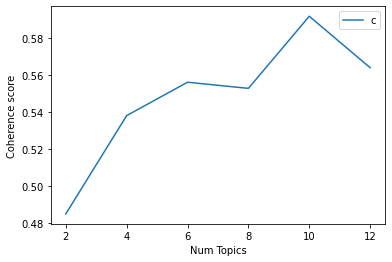

In [986]:
# Show graph
limit=14; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [987]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4851
Num Topics = 4  has Coherence Value of 0.5383
Num Topics = 6  has Coherence Value of 0.5563
Num Topics = 8  has Coherence Value of 0.553
Num Topics = 10  has Coherence Value of 0.592
Num Topics = 12  has Coherence Value of 0.5641


In [988]:
cv_values = []
for i,(m, cv) in enumerate(zip(x, coherence_values)):
    if m <=10:
        cv_values.append(cv)
index = cv_values.index(max(cv_values))
index
       

4

#### selecting the most optimal and efficient number of topics <10 to make sure the articles are not overclassified

In [989]:
# Select the model and print the topics
optimal_model = model_list[index]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.024*"government" + 0.019*"country" + 0.010*"election" + 0.010*"party" + '
  '0.010*"vote" + 0.009*"political" + 0.009*"leader" + 0.008*"people" + '
  '0.007*"protest" + 0.007*"prime_minister"'),
 (1,
  '0.016*"year" + 0.013*"family" + 0.013*"life" + 0.009*"time" + '
  '0.009*"people" + 0.008*"woman" + 0.008*"man" + 0.008*"child" + 0.007*"day" '
  '+ 0.007*"young"'),
 (2,
  '0.030*"race" + 0.027*"year" + 0.025*"team" + 0.024*"season" + 0.022*"time" '
  '+ 0.017*"world" + 0.014*"start" + 0.013*"driver" + 0.013*"car" + '
  '0.012*"champion"'),
 (3,
  '0.014*"case" + 0.014*"court" + 0.013*"charge" + 0.011*"police" + '
  '0.009*"investigation" + 0.008*"arrest" + 0.008*"statement" + '
  '0.008*"british" + 0.008*"news" + 0.007*"trial"'),
 (4,
  '0.013*"work" + 0.009*"year" + 0.008*"world" + 0.006*"build" + '
  '0.005*"create" + 0.005*"city" + 0.005*"people" + 0.005*"company" + '
  '0.005*"find" + 0.004*"design"'),
 (5,
  '0.021*"police" + 0.018*"people" + 0.014*"report" + 0.012*"att

### Convert Mallet model to LDA model to visualize the topics

In [990]:
def convertldaGenToldaMallet(mallet_model):
    model_gensim = gensim.models.ldamodel.LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

optimal_model = convertldaGenToldaMallet(optimal_model)

In [991]:
#Visualizing Opitmal Model

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus3, dictionary)
vis

D:\DAEN\Python\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log

D:\DAEN\Python\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

D:\DAEN\Python\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.163828 -0.040462       1        1  12.144952
3     -0.238797 -0.152822       2        1  11.393746
1     -0.105487  0.130604       3        1  10.465971
5     -0.222714 -0.146323       4        1  10.459256
6      0.253769 -0.008674       5        1   9.827551
8      0.204203 -0.161999       6        1   9.776773
4     -0.150084  0.289545       7        1   9.705204
7     -0.003683  0.009524       8        1   9.227502
9      0.230372  0.029915       9        1   8.776662
2      0.196249  0.050693      10        1   8.222383, topic_info=                  Term         Freq        Total Category  logprob  loglift
1809              team  3388.000000  3388.000000  Default  30.0000  30.0000
789               goal  2099.000000  2099.000000  Default  29.0000  29.0000
1603               win  4533.000000  4533.000000  Default  28.0000  28.0000
4029              club  2300.000000  2300.000000  Default  27.0000  27.0000
1492              play  3990.000000  3990.000000  Default  26.0000  26.0000
...                ...          ...          ...      ...      ...      ...
29997  story_highlight   588.043717  3678.122017  Topic10  -4.6714   0.6650
5191             sport   384.188570  1000.125239  Topic10  -5.0971   1.5416
328                end   372.987740  1883.423215  Topic10  -5.1267   0.8790
1603               win   369.627486  4533.443050  Topic10  -5.1357  -0.0084
198               lead   341.625412  2843.453196  Topic10  -5.2145   0.3793

[903 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
4697      2  0.898843         abuse
4697      8  0.103827         abuse
1360      9  1.058922  accidentally
0         1  0.136313        accord
0         2  0.181029        accord
...     ...       ...           ...
147       6  0.032252         young
147       8  0.053753         young
147       9  0.148119         young
147      10  0.074059         young
2369      9  0.907648         zaman

[1415 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 6, 7, 9, 5, 8, 10, 3])

### Dominant topic in each sentence

In [1020]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus3, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus3, texts=data3)

# Format
df_dominant_topic_cnn = df_topic_sents_keywords.reset_index()
df_dominant_topic_cnn.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic_cnn.head(10)

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3803544534.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3803544534.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               9              0.5552   
1            1               2              0.4219   
2            2               6              0.5692   
3            3               0              0.2629   
4            4               7              0.3682   
5            5               0              0.5069   
6            6               4              0.4520   
7            7               3              0.6196   
8            8               5              0.2128   
9            9               3              0.6477   

                                            Keywords  \
0  year, round, open, play, major, lead, world, g...   
1  race, year, team, season, time, world, start, ...   
2  match, set, play, win, beat, year, world, fina...   
3  government, country, election, party, vote, po...   
4  club, player, football, team, year, game, fan,...   
5  government, country, election, party, vote, po...   
6  work, year, world, build, create, city, people...   
7  case, court, charge, police, investigation, ar...   
8  police, people, report, attack, authority, kil...   
9  case, court, charge, police, investigation, ar...   

                                                Text  
0  Story highlights Tommy Fleetwood and Michael H...  
1  Story highlights Bruno Senna will replace Nick...  
2  Story highlights Vera Zvonareva sees off Wimbl...  
3  Story highlights Macedonia was the only countr...  
4  Story highlights Manchester City ban questions...  
5  Story highlights Medvedev says Putin has a bet...  
6  Story highlights Prehistoric children as young...  
7  Story highlights NEW: Only proof in Amanda Kno...  
8  Story highlights - The office will help meet c...  
9  Editor’s Note: Amanda Knox’s murder conviction...

### Most representative document for each topic

In [993]:
# Group top article under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

Topic_Num  Topic_Perc_Contrib  \
0          0              0.8137   
1          1              0.6097   
2          2              0.7005   
3          3              0.7627   
4          4              0.7116   
5          5              0.7196   
6          6              0.7141   
7          7              0.5967   
8          8              0.7868   
9          9              0.6916   

                                            Keywords  \
0  government, country, election, party, vote, po...   
1  year, family, life, time, people, woman, man, ...   
2  race, year, team, season, time, world, start, ...   
3  case, court, charge, police, investigation, ar...   
4  work, year, world, build, create, city, people...   
5  police, people, report, attack, authority, kil...   
6  match, set, play, win, beat, year, world, fina...   
7  club, player, football, team, year, game, fan,...   
8  goal, point, minute, home, win, score, half, p...   
9  year, round, open, play, major, lead, world, g...   

                                                Text  
0  Story highlights NEW: Politicians in Greece ho...  
1  On June 3 - 5, the UK’s Queen Elizabeth II mar...  
2  Story highlights Casey Stoner wins pole positi...  
3  Story highlights NEW: 28 News International em...  
4  Editor’s Note: Story highlights London urban f...  
5  Are you there? Send CNN iReport your stories, ...  
6  Story highlights Roger Federer advances at the...  
7  Story highlights Footballers and journalists h...  
8  Story highlights Euro 2012 gets under way in P...  
9  Story highlights Austrian Wiesberger clinches ...

In [1000]:
df_dominant_topic_cnn[(df_dominant_topic_cnn.Dominant_Topic == 1) & (df_dominant_topic.Topic_Perc_Contrib > 0.4)]


index  Dominant_Topic  Perc_Contribution  \
64       64               1             0.4599   
112     112               1             0.2938   
161     161               1             0.4450   
180     180               1             0.4408   
187     187               1             0.4853   
...     ...             ...                ...   
3312   3312               1             0.4180   
3323   3323               1             0.4658   
3342   3342               1             0.4676   
3406   3406               1             0.2765   
3461   3461               1             0.3740   

                                         Topic_Keywords  \
64    year, family, life, time, people, woman, man, ...   
112   year, family, life, time, people, woman, man, ...   
161   year, family, life, time, people, woman, man, ...   
180   year, family, life, time, people, woman, man, ...   
187   year, family, life, time, people, woman, man, ...   
...                                                 ...   
3312  year, family, life, time, people, woman, man, ...   
3323  year, family, life, time, people, woman, man, ...   
3342  year, family, life, time, people, woman, man, ...   
3406  year, family, life, time, people, woman, man, ...   
3461  year, family, life, time, people, woman, man, ...   

                                                      0  
64    Story highlights NEW: Frenetic youth welcome t...  
112   Story highlights Martin McGuinness is running ...  
161   Story highlights - Jimmy Savile entertained ge...  
180   Story highlights NEW: Expert: Plans for Willia...  
187   Story highlights The marriage of William and C...  
...                                                 ...  
3312  Story highlights Princess Madeleine and Christ...  
3323  Story highlights Flamboyant BBC TV host, who d...  
3342  Story highlights NEW: Pope says newly canonize...  
3406  Story highlights A new book says Frances first...  
3461  Story highlights Bobby Hogg was 92 The dialect...  

[113 rows x 5 columns]

### Visualizing Word Count and Importance of Topic Keywords

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3905052245.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3905052245.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3905052245.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3905052245.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3905052245.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3905052245.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3905052245.py:24: UserWarning:

FixedFormatter should only be used togeth

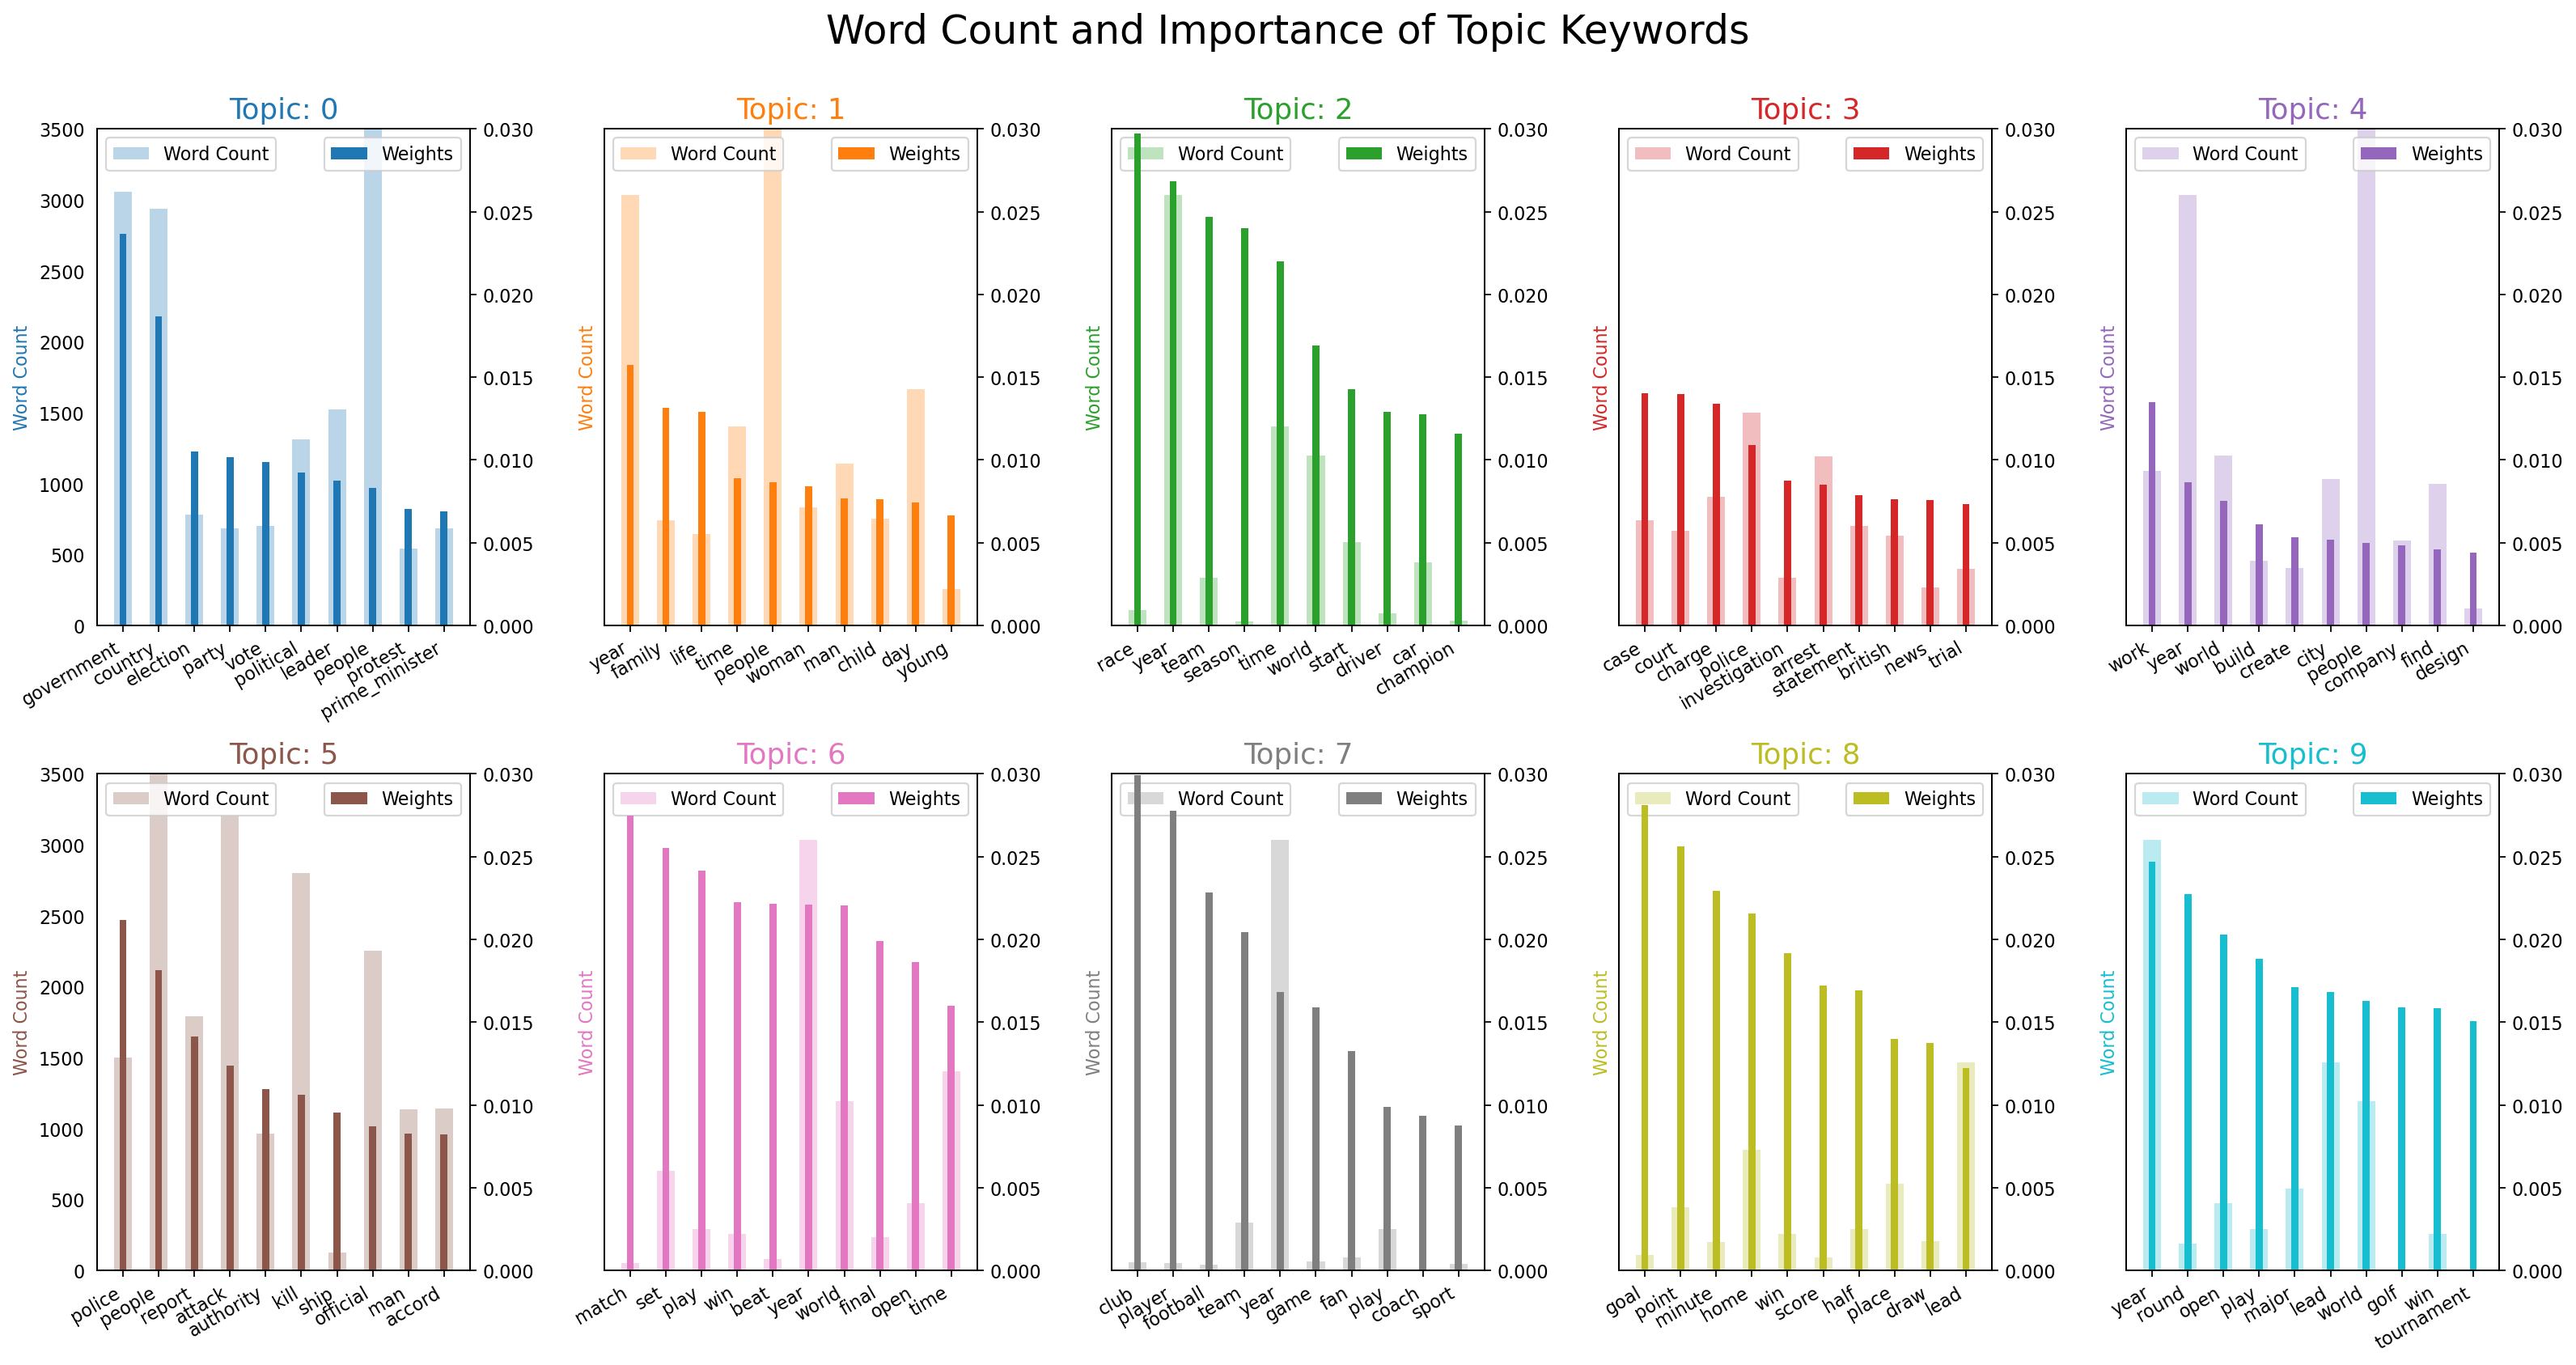

In [994]:
import matplotlib.colors as mcolors
from collections import Counter
topics = optimal_model.show_topics(formatted=False)


out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 5, figsize=(20,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### Topic Labelling

In [1021]:
topic_labels = ["Politics","Local","Sports_Racing","Legal","Government","Crime","Sports_Tennis","Sports_Football","Sports_Soccer","Sports_Golf"]   

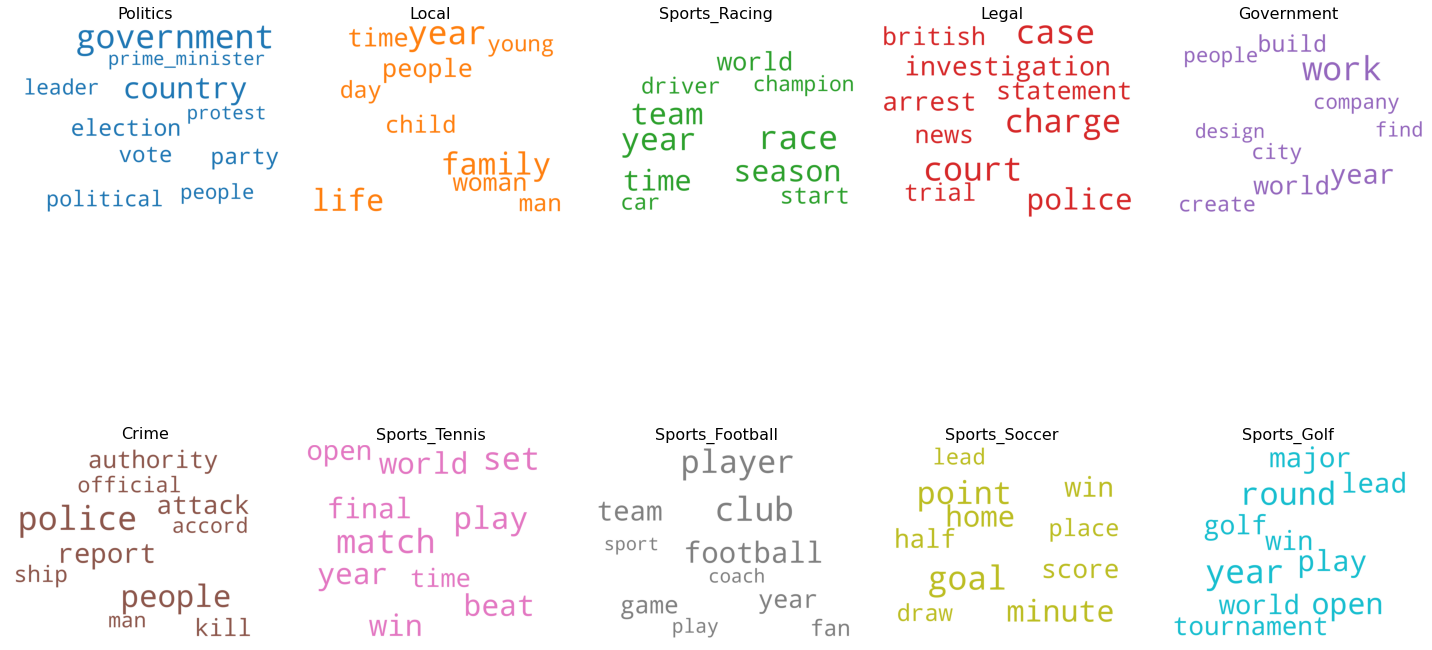

In [1003]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(20,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(topic_labels[i], fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### save LDA model

In [1004]:
from gensim.test.utils import datapath
temp_file = datapath("model_1")
optimal_model.save(temp_file)

### Grouping Dataset as collections based on identified Topics

In [1023]:
df_dominant_topic_cnn

Document_No   Dominant_Topic  Topic_Perc_Contrib  \
0               0      Sports_Golf              0.5552   
1               1    Sports_Racing              0.4219   
2               2    Sports_Tennis              0.5692   
3               3         Politics              0.2629   
4               4  Sports_Football              0.3682   
...           ...              ...                 ...   
3494         3494    Sports_Soccer              0.5036   
3495         3495            Legal              0.3592   
3496         3496            Local              0.3577   
3497         3497    Sports_Racing              0.4807   
3498         3498    Sports_Racing              0.4188   

                                               Keywords  \
0     year, round, open, play, major, lead, world, g...   
1     race, year, team, season, time, world, start, ...   
2     match, set, play, win, beat, year, world, fina...   
3     government, country, election, party, vote, po...   
4     club, player, football, team, year, game, fan,...   
...                                                 ...   
3494  goal, point, minute, home, win, score, half, p...   
3495  case, court, charge, police, investigation, ar...   
3496  year, family, life, time, people, woman, man, ...   
3497  race, year, team, season, time, world, start, ...   
3498  race, year, team, season, time, world, start, ...   

                                                   Text  
0     Story highlights Tommy Fleetwood and Michael H...  
1     Story highlights Bruno Senna will replace Nick...  
2     Story highlights Vera Zvonareva sees off Wimbl...  
3     Story highlights Macedonia was the only countr...  
4     Story highlights Manchester City ban questions...  
...                                                 ...  
3494  Story highlights West Ham beat Queens Park Ran...  
3495  Story highlights Alexander Lebedev charged wit...  
3496  Story highlights Premier League to hold "Chris...  
3497  Story highlights Seven-time world champion Mic...  
3498  Story highlights Ferrari drops idea of challen...  

[3499 rows x 5 columns]

In [1022]:
df_dominant_topic_cnn['Dominant_Topic'] = df_dominant_topic_cnn['Dominant_Topic'].replace([0,1,2,3,4,5,6,7,8,9], topic_labels)

In [1024]:
topic_extracted = df_dominant_topic_cnn[['Dominant_Topic', 'Keywords']]

In [1015]:
tags_organizer(cnn)

extracted_clean_text  \
0     Story highlights\nTommy Fleetwood and Michael ...   
1     Story highlights\nBruno Senna will replace Nic...   
2     Story highlights\nVera Zvonareva sees off Wimb...   
3     Story highlights\nMacedonia was the only count...   
4     Story highlights\nManchester City ban question...   
...                                                 ...   
3494  Story highlights\nWest Ham beat Queen's Park R...   
3495  Story highlights\nAlexander Lebedev charged wi...   
3496  Story highlights\nPremier League to hold "Chri...   
3497  Story highlights\nSeven-time world champion Mi...   
3498  Story highlights\nFerrari drops idea of challe...   

                                        extracted_title  \
0     Fleetwood and Hoey lead big names in Dunhill L...   
1                 Senna to replace Heidfeld in Belgium    
2         Zvonareva beats Kvitova to reach Tokyo final    
3                           Country profile: Macedonia    
4                    Manchester City ban talk of Tevez    
...                                                 ...   
3494  Vaz Te winner lifts West Ham as QPR are left r...   
3495  Kremlin critic Lebedev: Why I lashed out on TV...   
3496                  Never forget: Football remembers    
3497                 Schumacher coy over Sauber switch    
3498  It's official: Vettel is three-time champion a...   

     extracted_published_date extracted_publisher  \
0                  2011-09-30                 CNN   
1                  2011-08-24                 CNN   
2                  2011-09-30                 CNN   
3                  2011-09-30                 CNN   
4                  2011-09-30                 CNN   
...                       ...                 ...   
3494               2012-10-01                 CNN   
3495               2012-10-01                 CNN   
3496               2012-11-30                 CNN   
3497               2012-10-01                 CNN   
3498               2012-11-30                 CNN   

                                      extractedkeyw_per  \
0     [TommyFleetwood, MichaelHoey, LouisOosthuizen,...   
1     [BrunoSenna, NickHeidfeld, AyrtonSenna, BrunoS...   
2     [VeraZvonareva, PetraKvitova, MariaSharapova, ...   
3     [GjorgjeIvanov, NikolaGruevski, Ivanov, Alexan...   
4     [CarlosTevez, Tevez, RobertoMancini, CarlosTev...   
...                                                 ...   
3494  [RicardoVazTe, MarkHughes, MattJarvis, AdelTar...   
3495  [AlexanderLebedev, Lebedev, Lebedev, Alexander...   
3496  [LaurenceBinyon1869-1943, Middlesex, ClaptonOr...   
3497  [MichaelSchumacher, LewisHamilton, Schumacher,...   
3498  [SebastianVettel, Jean-EricVergne's, LucadiMon...   

                                      extractedkeyw_org  \
0     [AlfredDunhillLinksChampionship, Fleetwood, Ki...   
1     [Renault, theBelgianGrandPrix\n, Formula, Rena...   
2     [PetraKvitova, WTA, Zvonareva, PanPacific, Petra]   
3     [Skopje, Skopje, theUnitedNations, theEuropean...   
4     [BayernMunich\nBayernMunich, ChampionsLeague, ...   
...                                                 ...   
3494  [United, PremierLeague, Hughes, RealMadrid, Ch...   
3495  [Kremlin, Kremlin, NTVshniki, CNN, theInvestig...   
3496  [ManchesterUnited, ManchesterUnited, The“Footb...   
3497  [FormulaOne, Mercedes, Mercedes, FormulaOne, M...   
3498  [ToroRosso, Ferrari, FIA, Ferrari, Ferrari, Re...   

                                      extractedkeyw_pla url_status  \
0     [Scotland, England, NorthernIreland’s, Scotlan...      valid   
1        [Belgium, SaoPaulo, SouthKorea, Prost, Jordan]      valid   
2     [Tokyo, China, Thailand, Tokyo, Radwanska, Chi...      valid   
3     [Yugoslavia, Greece, Albania, Bulgaria, Greece...      valid   
4     [ManchesterCity, ManchesterCity, City, Manches...      valid   
...                                                 ...        ...   
3494                       [London, SouthKorea, London]      valid   
34

In [1025]:
cnn_tagged = pd.concat([cnn, topic_extracted], axis=1)

In [1026]:
CNN_Collections=[]
for i, x in cnn_tagged.groupby('Dominant_Topic'):
    globals()['CNN_tagged_' + str(i)] = x
    CNN_Collections.append('CNN_tagged_' + str(i))
CNN_Collections

['CNN_tagged_Crime',
 'CNN_tagged_Government',
 'CNN_tagged_Legal',
 'CNN_tagged_Local',
 'CNN_tagged_Politics',
 'CNN_tagged_Sports_Football',
 'CNN_tagged_Sports_Golf',
 'CNN_tagged_Sports_Racing',
 'CNN_tagged_Sports_Soccer',
 'CNN_tagged_Sports_Tennis']

In [1028]:
CNN_tagged_Sports_Racing

extracted_clean_text  \
1     Story highlights\nBruno Senna will replace Nic...   
14    Story highlights\nDani Pedrosa quickest in pra...   
26    Story highlights\nChristian Horner has played ...   
57    Story highlights\nSebastian Vettel wins Singap...   
72    Story highlights\nSebastian Vettel wins his 11...   
...                                                 ...   
3468  Story highlights\nMichael Schumacher will reti...   
3473  Story highlights\nMichael Schumacher insists h...   
3483  Story highlights\nJenson Button to serve five-...   
3497  Story highlights\nSeven-time world champion Mi...   
3498  Story highlights\nFerrari drops idea of challe...   

                                        extracted_title  \
1                 Senna to replace Heidfeld in Belgium    
14          Stoner edged by Pedrosa in Motegi practice    
26             Red Bull's Horner hopes for Vettel stay    
57        Vettel wins but must wait to clinch F1 title    
72    Vettel on pole in Singapore as second F1 title...   
...                                                 ...   
3468  Seven-time champion Schumacher to retire from F1    
3473        Schumacher motivated despite Hamilton deal    
3483             Button suffers blow ahead of Japan GP    
3497                 Schumacher coy over Sauber switch    
3498  It's official: Vettel is three-time champion a...   

     extracted_published_date extracted_publisher  \
1                  2011-08-24                 CNN   
14                 2011-09-30                 CNN   
26                 2011-09-28                 CNN   
57                 2011-09-25                 CNN   
72                 2011-09-24                 CNN   
...                       ...                 ...   
3468               2012-10-04                 CNN   
3473               2012-10-03                 CNN   
3483               2012-10-02                 CNN   
3497               2012-10-01                 CNN   
3498               2012-11-30                 CNN   

                                      extractedkeyw_per  \
1     [BrunoSenna, NickHeidfeld, AyrtonSenna, BrunoS...   
14    [DaniPedrosa, CaseyStoner, JorgeLorenzo, Moteg...   
26    [ChristianHorner, SebastianVettel, Vettel, Chr...   
57    [SebastianVettel, JensonButton, MarkWebber, Ve...   
72    [SebastianVettel, MarkWebber, FernandoAlonso, ...   
...                                                 ...   
3468  [MichaelSchumacher, BritonLewisHamilton\nSchum...   
3473  [MichaelSchumacher, LewisHamilton, MichaelSchu...   
3483  [JensonButton, JensonButton, Button, BritonLew...   
3497  [MichaelSchumacher, LewisHamilton, Schumacher,...   
3498  [SebastianVettel, Jean-EricVergne's, LucadiMon...   

                                      extractedkeyw_org  \
1     [Renault, theBelgianGrandPrix\n, Formula, Rena...   
14             [Stoner, Honda, Stoner, Yamaha, Pedrosa]   
26    [Ferrari\nHorner, Vettel, JapaneseGrandPrix\nR...   
57    [SingaporeGrandPrix, Vettel, Vettel, RedBull, ...   
72    [SingaporeGrandGrix, RedBull, Vettel, Ferrari,...   
...                                                 ...   
3468  [FormulaOne, Mercedes, Mercedes, FormulaOne, M...   
3473  [Mercedes, Sauber\nSchumacher, FormulaOne, For...   
3483  [McLaren, McLaren, JapaneseGrandPrix, theSinga...   
3497  [FormulaOne, Mercedes, Mercedes, FormulaOne, M...   
3498  [ToroRosso, Ferrari, FIA, Ferrari, Ferrari, Re...   

                                      extractedkeyw_pla url_status  \
1        [Belgium, SaoPaulo, SouthKorea, Prost, Jordan]      valid   
14                      [Japan, Motegi, Ducati, Motegi]      valid   
26                       [Singapore, Singapore, Suzuka]      valid   
57    [Japan, Singapore, Britain, Singapore, Button,...      valid   
72                                          [Singapore]      valid   
...                                                 ...        ...   
3468                                 [Formula, Ferrari]      valid   
34

In [1029]:
print(tags_counter(CNN_tagged_Crime))
print(CNN_tagged_Crime.extracted_published_date.min())
print(CNN_tagged_Crime.extracted_published_date.max())

['Merah', 'CNN', 'Turkey']
2011-09-16
2012-10-31


In [1030]:
print(tags_counter(CNN_tagged_Government))
print(CNN_tagged_Government.extracted_published_date.min())
print(CNN_tagged_Government.extracted_published_date.max())

['Dickens', 'CNN', 'London']
2011-09-02
2012-10-19


In [1031]:
print(tags_counter(CNN_tagged_Legal))
print(CNN_tagged_Legal.extracted_published_date.min())
print(CNN_tagged_Legal.extracted_published_date.max())

['Murdoch', 'CNN', 'Britain']
2011-09-15
2012-10-31


In [1032]:
print(tags_counter(CNN_tagged_Local))
print(CNN_tagged_Local.extracted_published_date.min())
print(CNN_tagged_Local.extracted_published_date.max())

['William', 'CNN', 'London']
2011-09-19
2012-11-30


In [1033]:
print(tags_counter(CNN_tagged_Politics))
print(CNN_tagged_Politics.extracted_published_date.min())
print(CNN_tagged_Politics.extracted_published_date.max())

['Putin', 'CNN', 'Greece']
2011-09-16
2012-10-30


In [1034]:
print(tags_counter(CNN_tagged_Sports_Football))
print(CNN_tagged_Sports_Football.extracted_published_date.min())
print(CNN_tagged_Sports_Football.extracted_published_date.max())

['Chelsea', 'UEFA', 'England']
2011-09-05
2012-10-30


In [1035]:
print(tags_counter(CNN_tagged_Sports_Golf))
print(CNN_tagged_Sports_Golf.extracted_published_date.min())
print(CNN_tagged_Sports_Golf.extracted_published_date.max())

['Donald', 'Woods', 'U.S.']
2011-09-08
2012-10-31


In [1036]:
print(tags_counter(CNN_tagged_Sports_Racing))
print(CNN_tagged_Sports_Racing.extracted_published_date.min())
print(CNN_tagged_Sports_Racing.extracted_published_date.max())

['Hamilton', 'Ferrari', 'Spain']
2011-08-24
2012-11-30


In [1037]:
print(tags_counter(CNN_tagged_Sports_Soccer))
print(CNN_tagged_Sports_Soccer.extracted_published_date.min())
print(CNN_tagged_Sports_Soccer.extracted_published_date.max())

['Chelsea', 'Chelsea', 'Barcelona']
2011-09-15
2012-10-31


In [1038]:
print(tags_counter(CNN_tagged_Sports_Tennis))
print(CNN_tagged_Sports_Tennis.extracted_published_date.min())
print(CNN_tagged_Sports_Tennis.extracted_published_date.max())

['RogerFederer', 'Federer', 'U.S.']
2011-09-15
2012-10-31


# Preparation of corpus and Topic Modeling for Japan Times

## Loading Japan Times dataset with extracted candidate tags

In [1100]:
import pandas as pd
jt = pd.read_csv('D:/DAEN/DAEN 690/Datasets/New Extraction_Checkpoints/japan_times_extracted.csv')
jt

extracted_clean_text  \
0    The leader of Komeito, the junior party in the...   
1    CHEONAN, South Korea – South Korean President ...   
2    Nagoya authorities are worried that the more t...   
3    WASHINGTON – Three U.S. spy programs aimed at ...   
4    Article expired\nThe article you have been loo...   
..                                                 ...   
596  A day after Prime Minister Shinzo Abe set July...   
597  WASHINGTON – Joseph Nye, former U.S. assistant...   
598  LOS ANGELES/SACRAMENTO, CALIFORNIA – Californi...   
599  As the current state of emergency is set to be...   
600  CHIBA – At this year’s Tokyo Game Show, the bi...   

                                       extracted_title  \
0    Komeito chief calls for Japan to create Asian ...   
1    Moon Jae-in to focus on victims in 'comfort wo...   
2    Abandoned boats pose tsunami hazard at Nagoya ...   
3    NSA surveillance powers lapse after no deal in...   
4                    Article expired - The Japan Times   
..                                                 ...   
596  Ruling, opposition camps switch into campaign ...   
597  Ex-Pentagon official lambastes U.S. unilateral...   
598  California gets first comprehensive regulation...   
599  Olympic torch relay likely to be taken off pub...   
600  High-speed 5G network seen as ready to give bi...   

    extracted_published_date extracted_publisher     extractedkeyw_per  \
0                 2022-01-02     The Japan Times                  ['']   
1                 2020-08-14     The Japan Times          ['MoonJae-']   
2                 2015-03-06     The Japan Times                  ['']   
3                 2015-06-01     The Japan Times                  ['']   
4                 2013-05-10     The Japan Times                  ['']   
..                       ...                 ...                   ...   
596               2016-06-02     The Japan Times         ['ShinzoAbe']   
597               2004-01-01     The Japan Times  ['JosephNye', 'Nye']   
598               2015-10-10     The Japan Times        ['JerryBrown']   
599               2021-05-27     The Japan Times                  ['']   
600               2019-09-16     The Japan Times                  ['']   

                                     extractedkeyw_org  \
0    ['theOrganisationforSecurityandEconomicCo-oper...   
1                                                 ['']   
2                                                 ['']   
3                                           ['Senate']   
4                                                 ['']   
..                                                 ...   
596      ['UpperHouse', 'Abe’sLiberalDemocraticParty']   
597                              ['HarvardUniversity']   
598            ['aBureauofMedicalMarijuanaRegulation']   
599                ['Hokkaido', 'Sapporo', 'Hokkaido']   
600                                          ['CHIBA']   

                                     extractedkeyw_pla url_status  \
0    ['Komeito', 'Japan', 'theUnitedStates', 'China...      valid   
1    ['CHEONAN', 'SouthKorea', 'SouthKorea’s', 'Jap...      valid   
2                                           ['Nagoya']      valid   
3                               ['WASHINGTON', 'U.S.']      valid   
4                                                 ['']      valid   
..                                                 ...        ...   
596                                        ['Komeito']      valid   
597  ['WASHINGTON', 'U.S.', 'theUnitedStates', 'U.S.']      valid   
598        ['LOSANGELES/', 'CALIFORNIA', 'California']      valid   
599                                               ['']      valid   
600                                               ['']      valid   

                                                   url  \
0    https://www.japantimes.co.jp/news/2022/01/02/n...   
1    https://www.japantimes.co.jp/news/2020/08/14/n...   
2    https://www.japantimes.co.jp/news/2015/03/06/n

### Import/Install Required Libraries and Packages

In [44]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

### EDA - Wordcloud from titles for possible descriptor tags

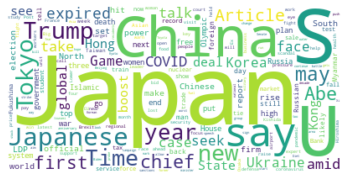

In [399]:
#Creating the text variable

text2 = " ".join(title for title in jt.extracted_title)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

### Text Preprocessing,Cleaning and Tokenization

In [400]:
# Convert to list
data4 = jt.extracted_clean_text.values.tolist()
# Remove Emails
data4 = [re.sub('\S*@\S*\s?', '', sent) for sent in data4]

# Remove new line characters
data4 = [re.sub('\s+', ' ', sent) for sent in data4]

# Remove distracting single quotes
data4 = [re.sub("\'", "", sent) for sent in data4]

pprint(data4[0:1])

['The leader of Komeito, the junior party in the ruling bloc, on Sunday urged '
 'Japan to take the lead in creating a permanent regional framework that '
 'includes the United States, China and other countries in the Asia-Pacific '
 'region to promote dialogue and avoid conflict amid soaring tensions between '
 'Washington and Beijing. Natsuo Yamaguchi said in a speech in Tokyo that the '
 'increasingly severe security environment in Asia has prompted a need for a '
 'regional body resembling the Organisation for Security and Economic '
 'Co-operation, a framework that includes European nations, the U.S. and '
 'Russia. The OSCE is currently involved in talks on negotiating peace in the '
 'ongoing conflict in eastern Ukraine.']


In [401]:
#Function for tokenizing
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data4))

print(data_words[0:1])

[['the', 'leader', 'of', 'komeito', 'the', 'junior', 'party', 'in', 'the', 'ruling', 'bloc', 'on', 'sunday', 'urged', 'japan', 'to', 'take', 'the', 'lead', 'in', 'creating', 'permanent', 'regional', 'framework', 'that', 'includes', 'the', 'united', 'states', 'china', 'and', 'other', 'countries', 'in', 'the', 'asia', 'pacific', 'region', 'to', 'promote', 'dialogue', 'and', 'avoid', 'conflict', 'amid', 'soaring', 'tensions', 'between', 'washington', 'and', 'beijing', 'natsuo', 'yamaguchi', 'said', 'in', 'speech', 'in', 'tokyo', 'that', 'the', 'increasingly', 'severe', 'security', 'environment', 'in', 'asia', 'has', 'prompted', 'need', 'for', 'regional', 'body', 'resembling', 'the', 'organisation', 'for', 'security', 'and', 'economic', 'co', 'operation', 'framework', 'that', 'includes', 'european', 'nations', 'the', 'and', 'russia', 'the', 'osce', 'is', 'currently', 'involved', 'in', 'talks', 'on', 'negotiating', 'peace', 'in', 'the', 'ongoing', 'conflict', 'in', 'eastern', 'ukraine']]


### Prepare NLTK Stop words

In [402]:
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS

stop_words = stopwords.words('english')
stop_words.extend(list(STOP_WORDS))
stop_words.extend(['said','say'])



In [403]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Visualizing Unigrams in text before and after removing stopwords

In [50]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

the 2942
of 1403
to 1374
in 1264
and 1001
on 571
for 477
is 400
that 369
as 325
with 324
said 308
from 259
by 256
japan 251
at 251
it 229
has 226
an 206
its 205


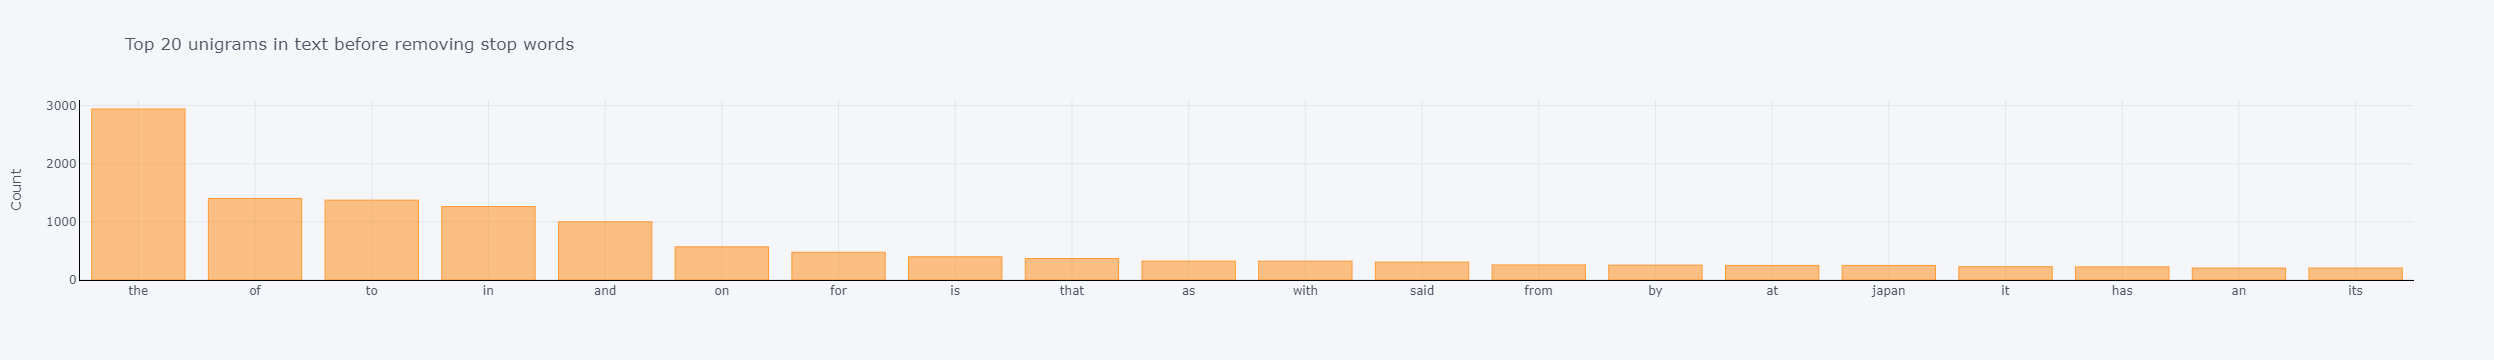

In [404]:
#The distribution of top unigrams before removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(jt['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df2.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams in text before removing stop words')

japan 251
year 127
government 123
tokyo 119
japanese 116
people 115
new 112
minister 102
president 98
china 90
world 80
years 76
time 71
prime 69
party 67
friday 66
tuesday 66
monday 64
thursday 62
prefecture 61


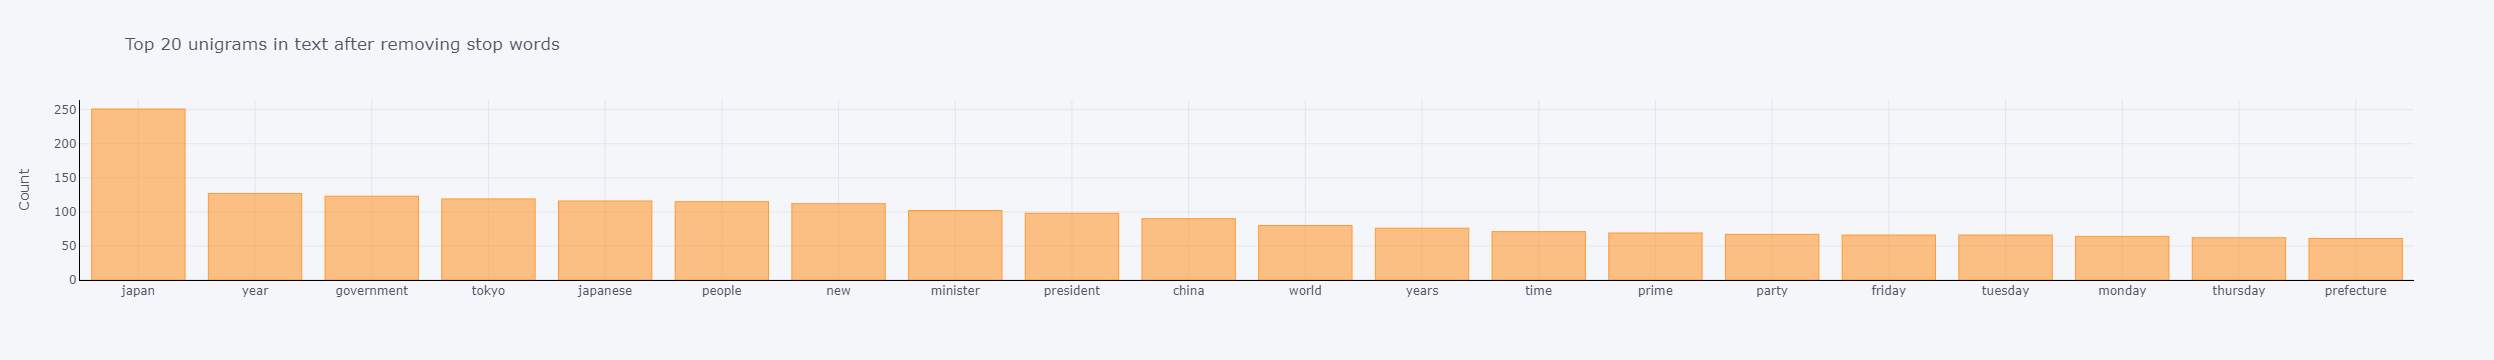

In [405]:
#The distribution of top unigrams after removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = frozenset(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(jt['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df3.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams in text after removing stop words')

### Identifying bigrams/trigrams

In [407]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['the', 'leader', 'of', 'komeito', 'the', 'junior', 'party', 'in', 'the', 'ruling', 'bloc', 'on', 'sunday', 'urged', 'japan', 'to', 'take', 'the', 'lead', 'in', 'creating', 'permanent', 'regional', 'framework', 'that', 'includes', 'the', 'united_states', 'china', 'and', 'other', 'countries', 'in', 'the', 'asia', 'pacific', 'region', 'to', 'promote', 'dialogue', 'and', 'avoid', 'conflict', 'amid', 'soaring', 'tensions', 'between', 'washington', 'and', 'beijing', 'natsuo', 'yamaguchi', 'said', 'in', 'speech', 'in', 'tokyo', 'that', 'the', 'increasingly', 'severe', 'security', 'environment', 'in', 'asia', 'has', 'prompted', 'need', 'for', 'regional', 'body', 'resembling', 'the', 'organisation', 'for', 'security', 'and', 'economic', 'co', 'operation', 'framework', 'that', 'includes', 'european', 'nations', 'the', 'and', 'russia', 'the', 'osce', 'is', 'currently', 'involved', 'in', 'talks', 'on', 'negotiating', 'peace', 'in', 'the', 'ongoing', 'conflict', 'in', 'eastern', 'ukraine']


In [408]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [410]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized4 = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized4[0:1])

[['leader', 'rule', 'urge', 'lead', 'create', 'permanent', 'regional', 'framework', 'include', 'united_state', 'promote', 'dialogue', 'avoid', 'conflict', 'soar', 'tension', 'speech', 'increasingly', 'severe', 'security', 'environment', 'prompt', 'need', 'regional', 'body', 'resemble', 'organisation', 'operation', 'framework', 'include', 'european', 'nation', 'osce', 'currently', 'involve', 'talk', 'negotiate', 'peace', 'ongoing', 'conflict']]


### Visualizing Bigrams in text before and after removing stopwords

in the 328
of the 282
to the 140
on the 100
for the 90
from the 79
at the 73
with the 67
prime minister 67
to be 54
have been 54
and the 54
the world 53
as the 53
the first 50
will be 49
according to 48
more than 46
the government 45
by the 45


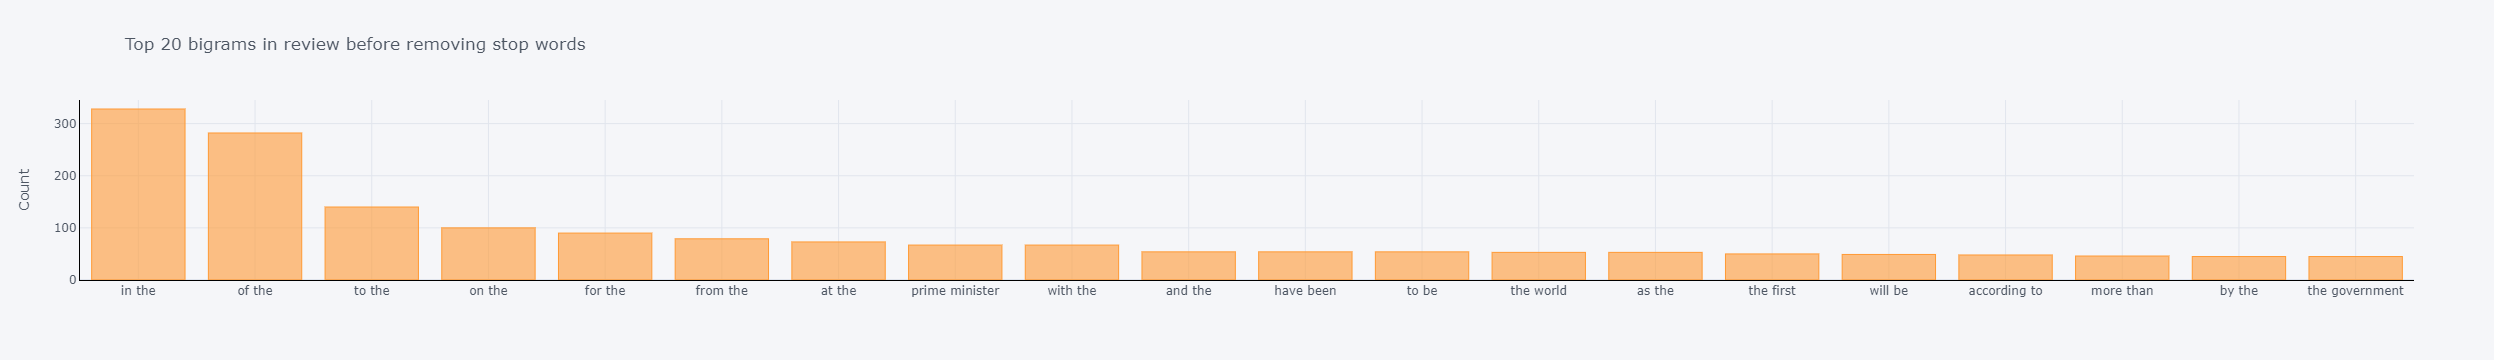

In [411]:
#The distribution of top bigrams before removing stop words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(jt['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df4.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')

prime minister 67
year old 32
donald trump 31
united states 27
article looking 26
looking expired 26
expired longer 26
longer available 26
available system 26
system newswire 26
newswire licensing 26
licensing terms 26
democratic party 25
president donald 24
shinzo abe 24
hong kong 23
minister shinzo 22
covid 19 22
south korea 21
north korea 16


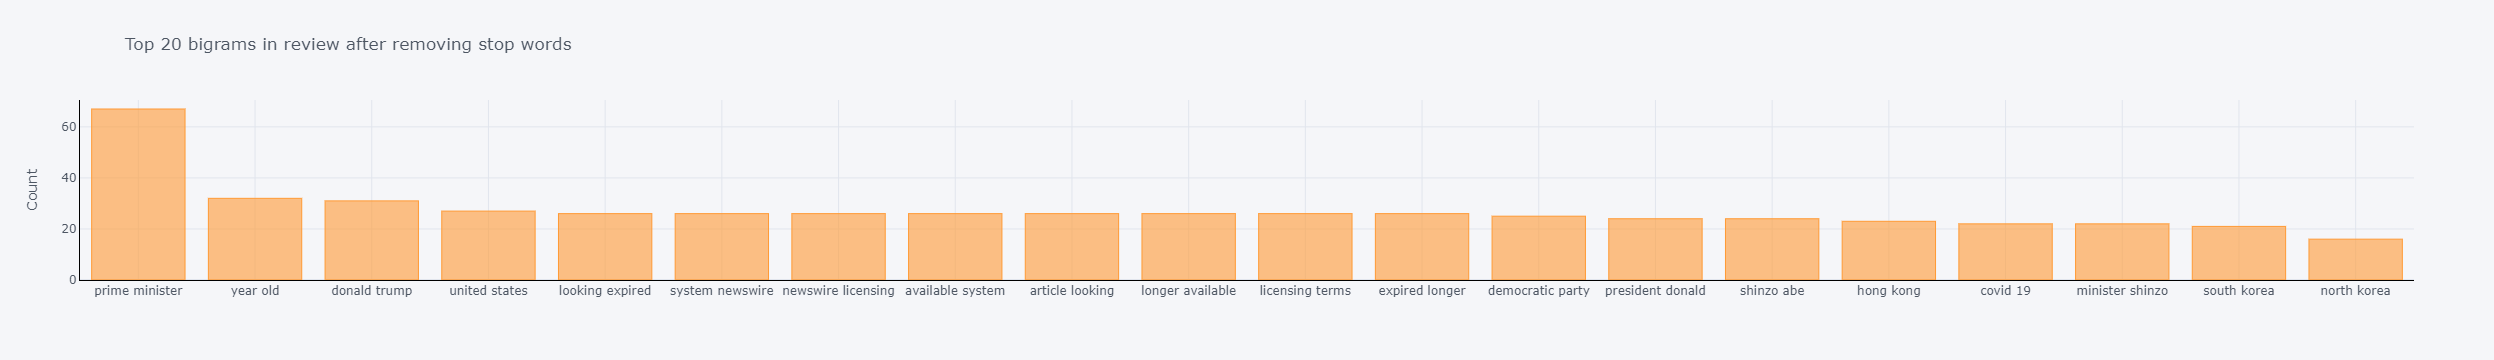

In [412]:
#The distribution of top bigrams after removing stop words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(jt['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df5.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

### Visualizing Trigrams in text before and after removing stopwords

the united states 27
is due to 27
the article you 26
article you have 26
you have been 26
have been looking 26
been looking for 26
looking for has 26
for has expired 26
has expired and 26
expired and is 26
and is not 26
is not longer 26
not longer available 26
longer available on 26
available on our 26
on our system 26
our system this 26
system this is 26
this is due 26


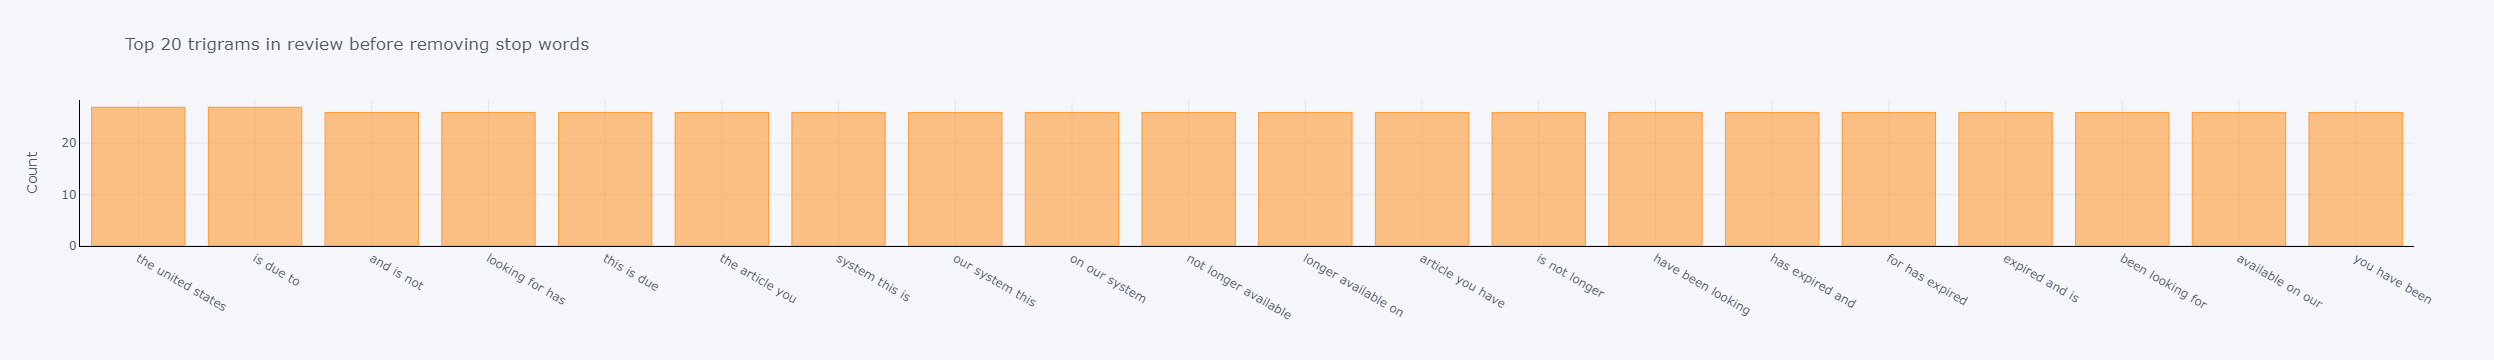

In [413]:
#The distribution of Top trigrams before removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(jt['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df6.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

article looking expired 26
looking expired longer 26
expired longer available 26
longer available system 26
available system newswire 26
system newswire licensing 26
newswire licensing terms 26
president donald trump 23
prime minister shinzo 22
minister shinzo abe 22
liberal democratic party 14
article expired article 13
expired article looking 13
licensing terms article 13
terms article looking 13
democratic party japan 11
world war ii 10
time misinformation information 9
misinformation information quality 9
information quality journalism 9


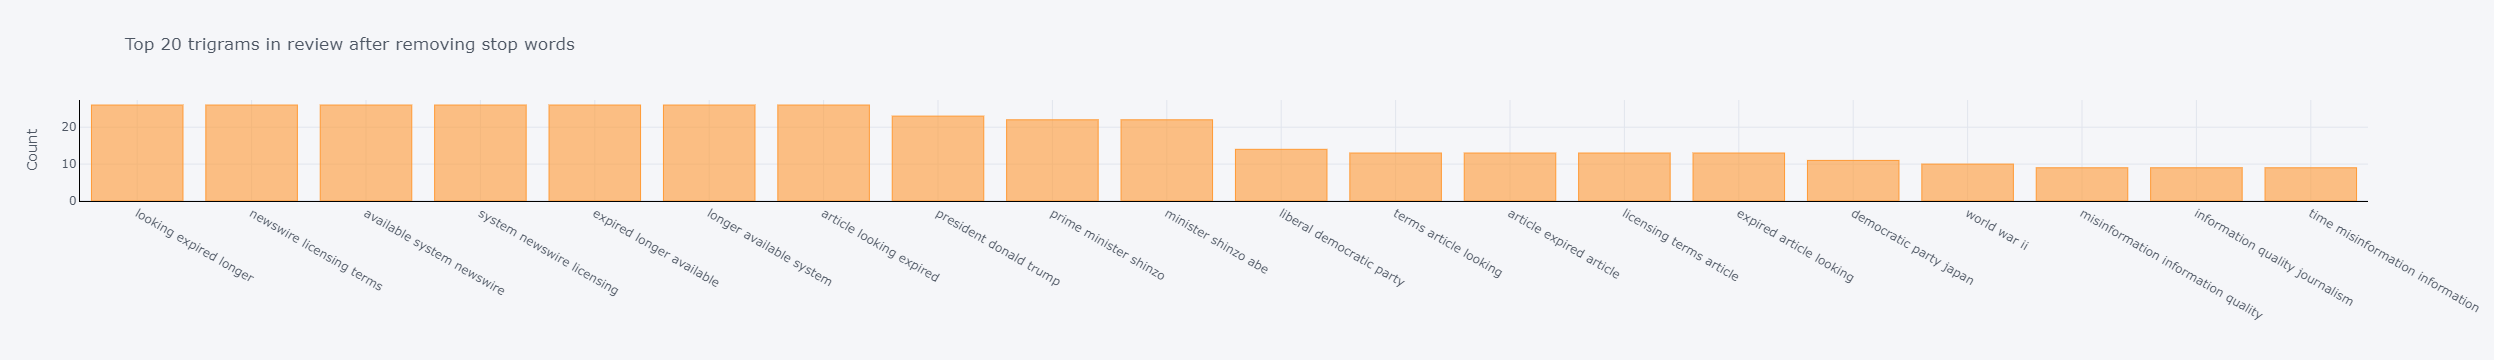

In [414]:
#The distribution of Top trigrams after removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(jt['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df7 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df7.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

### Load Dictionary and create corpus for CNN text

In [1039]:
from gensim.test.utils import datapath
temp_file = datapath("model_1.id2word")
dictionary = corpora.Dictionary.load(temp_file)


In [1040]:
corpus4 = [dictionary.doc2bow(text) for text in data_lemmatized4]

### Load the Pre-Trained LDA Topic Model

In [1041]:
# Build LDA model
from gensim.test.utils import datapath
temp_file = datapath("model_1")
lda_model = gensim.models.ldamodel.LdaModel.load(temp_file)

### Update Model's corpus

In [1042]:
lda_model.update(corpus4)

D:\DAEN\Python\anaconda3\lib\site-packages\gensim\models\ldamodel.py:1108: RuntimeWarning:

invalid value encountered in multiply

D:\DAEN\Python\anaconda3\lib\site-packages\gensim\models\ldamodel.py:1109: RuntimeWarning:

invalid value encountered in subtract



### Model Tuning using LDA Mallet

In [1043]:
import os

os.environ['MALLET_HOME'] = 'C:/Users/Madesh/mallet-2.0.8/mallet-2.0.8'

from gensim.models.wrappers import LdaMallet

mallet_path = 'C:/Users/Madesh/mallet-2.0.8/mallet-2.0.8/bin/mallet.bat'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus4, num_topics=index*2+2, id2word=dictionary)


In [1044]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized4, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('plan', 0.037611940298507465),
   ('time', 0.03462686567164179),
   ('high', 0.03044776119402985),
   ('market', 0.02447761194029851),
   ('long', 0.0191044776119403),
   ('case', 0.0191044776119403),
   ('comment', 0.015522388059701492),
   ('record', 0.014925373134328358),
   ('write', 0.01253731343283582),
   ('bank', 0.011940298507462687)]),
 (1,
  [('prefecture', 0.03575482406356413),
   ('power', 0.02043132803632236),
   ('set', 0.019296254256526674),
   ('nuclear', 0.016458569807037457),
   ('local', 0.016458569807037457),
   ('global', 0.016458569807037457),
   ('place', 0.014188422247446084),
   ('result', 0.012485811577752554),
   ('oil', 0.012485811577752554),
   ('effort', 0.012485811577752554)]),
 (2,
  [('system', 0.03475609756097561),
   ('term', 0.02621951219512195),
   ('world', 0.024390243902439025),
   ('find', 0.022560975609756097),
   ('foreign', 0.020121951219512196),
   ('base', 0.018902439024390243),
   ('article', 0.018292682926829267),
   ('expire', 0

### Find Optimal number of topics to feed the model to identify

In [1068]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus4, num_topics=num_topics, id2word=dictionary,random_seed=96)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [1069]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus4, texts=data_lemmatized4, start=2, limit=14, step=2)

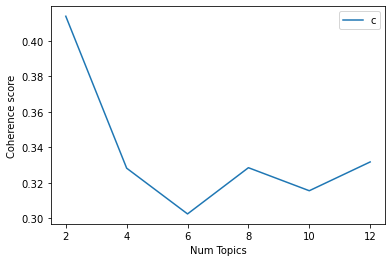

In [1070]:
# Show graph
limit=14; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [1071]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4138
Num Topics = 4  has Coherence Value of 0.3282
Num Topics = 6  has Coherence Value of 0.3025
Num Topics = 8  has Coherence Value of 0.3285
Num Topics = 10  has Coherence Value of 0.3156
Num Topics = 12  has Coherence Value of 0.3318


In [1072]:
cv_values = []
for i,(m, cv) in enumerate(zip(x, coherence_values)):
    if m <=10:
        cv_values.append(cv)
index = cv_values.index(max(cv_values))
index
       

0

#### selecting the most optimal and efficient number of topics <10 to make sure the articles are not overclassified

In [1073]:
# Select the model and print the topics
optimal_model = model_list[index]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.017*"year" + 0.015*"government" + 0.013*"people" + 0.009*"time" + '
  '0.007*"prefecture" + 0.007*"world" + 0.007*"work" + 0.006*"system" + '
  '0.006*"include" + 0.005*"group"'),
 (1,
  '0.011*"japanese" + 0.008*"country" + 0.008*"day" + 0.008*"official" + '
  '0.008*"company" + 0.007*"month" + 0.007*"plan" + 0.007*"percent" + '
  '0.006*"high" + 0.006*"week"')]


### Convert Mallet model to LDA model to visualize the topics

In [1074]:
def convertldaGenToldaMallet(mallet_model):
    model_gensim = gensim.models.ldamodel.LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

optimal_model = convertldaGenToldaMallet(optimal_model)

In [1075]:
#Visualizing Opitmal Model

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus4, dictionary)
vis

D:\DAEN\Python\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log

D:\DAEN\Python\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

D:\DAEN\Python\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log



PreparedData(topic_coordinates=              x    y  topics  cluster      Freq
topic                                          
0      0.330387  0.0       1        1  51.95638
1     -0.330387  0.0       2        1  48.04362, topic_info=            Term        Freq       Total Category  logprob  loglift
59          year  167.000000  167.000000  Default  30.0000  30.0000
410   government  141.000000  141.000000  Default  29.0000  29.0000
283       people  121.000000  121.000000  Default  28.0000  28.0000
3145    japanese   98.000000   98.000000  Default  27.0000  27.0000
164      country   75.000000   75.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
214       police   29.343279   29.343279   Topic2  -5.7221   0.7331
223     security   28.295306   28.295306   Topic2  -5.7584   0.7331
598         plan   64.974406   66.053612   Topic2  -4.9271   0.7166
3           base   32.487203   33.566409   Topic2  -5.6203   0.7004
1277         set   31.439228   40.072871   Topic2  -5.6531   0.4904

[153 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         2  0.995710         accord
149       1  0.926608     additional
63        1  0.926608  advertisement
64        2  0.954222    advertising
1         1  0.926608         affect
...     ...       ...            ...
444       1  1.003825           work
1052      1  1.001334          world
244       2  0.954222          wound
59        1  0.998345           year
147       1  0.988382          young

[128 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

### Dominant topic in each sentence

In [1076]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus4, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus4, texts=data4)

# Format
df_dominant_topic_jt = df_topic_sents_keywords.reset_index()
df_dominant_topic_jt.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic_jt.head(10)

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\300246173.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\300246173.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               0              0.6112   
1            1               0              0.5444   
2            2               1              0.5457   
3            3               1              0.6043   
4            4               0              0.5690   
5            5               1              0.5360   
6            6               1              0.5375   
7            7               0              0.5972   
8            8               0              0.6510   
9            9               0              0.5658   

                                            Keywords  \
0  year, government, people, time, prefecture, wo...   
1  year, government, people, time, prefecture, wo...   
2  japanese, country, day, official, company, mon...   
3  japanese, country, day, official, company, mon...   
4  year, government, people, time, prefecture, wo...   
5  japanese, country, day, official, company, mon...   
6  japanese, country, day, official, company, mon...   
7  year, government, people, time, prefecture, wo...   
8  year, government, people, time, prefecture, wo...   
9  year, government, people, time, prefecture, wo...   

                                                Text  
0  The leader of Komeito, the junior party in the...  
1  CHEONAN, South Korea – South Korean President ...  
2  Nagoya authorities are worried that the more t...  
3  WASHINGTON – Three U.S. spy programs aimed at ...  
4  Article expired The article you have been look...  
5  KIEV – Ukraine accused Russian army officers o...  
6  KOCHI – Japan is struggling to crack down on t...  
7  Hiroshi Iwama and Mitsunori Watanabe used to j...  
8  The government does not rule out the possibili...  
9  The Imperial Household Agency released on Thur...

### Most representative document for each topic

In [1077]:
# Group top article under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

Topic_Num  Topic_Perc_Contrib  \
0          0              0.9480   
1          1              0.6647   

                                            Keywords  \
0  year, government, people, time, prefecture, wo...   
1  japanese, country, day, official, company, mon...   

                                                Text  
0  At the inaugural Satoyama Consortium symposium...  
1  New Delhi – Prime Minister Narendra Modi’s cal...

In [1085]:
df_dominant_topic_jt[(df_dominant_topic_jt.Dominant_Topic == 0) & (df_dominant_topic_jt.Topic_Perc_Contrib > 0.60)]

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0              0               0              0.6112   
8              8               0              0.6510   
79            79               0              0.6006   
101          101               0              0.6006   
108          108               0              0.6345   
110          110               0              0.6048   
199          199               0              0.6173   
205          205               0              0.6505   
291          291               0              0.6028   
302          302               0              0.6500   
347          347               0              0.6250   
375          375               0              0.6233   
402          402               0              0.6163   
403          403               0              0.6197   
405          405               0              0.6218   
415          415               0              0.6007   
443          443               0              0.6098   
487          487               0              0.6135   
540          540               0              0.9480   
551          551               0              0.6044   
554          554               0              0.6817   

                                              Keywords  \
0    year, government, people, time, prefecture, wo...   
8    year, government, people, time, prefecture, wo...   
79   year, government, people, time, prefecture, wo...   
101  year, government, people, time, prefecture, wo...   
108  year, government, people, time, prefecture, wo...   
110  year, government, people, time, prefecture, wo...   
199  year, government, people, time, prefecture, wo...   
205  year, government, people, time, prefecture, wo...   
291  year, government, people, time, prefecture, wo...   
302  year, government, people, time, prefecture, wo...   
347  year, government, people, time, prefecture, wo...   
375  year, government, people, time, prefecture, wo...   
402  year, government, people, time, prefecture, wo...   
403  year, government, people, time, prefecture, wo...   
405  year, government, people, time, prefecture, wo...   
415  year, government, people, time, prefecture, wo...   
443  year, government, people, time, prefecture, wo...   
487  year, government, people, time, prefecture, wo...   
540  year, government, people, time, prefecture, wo...   
551  year, government, people, time, prefecture, wo...   
554  year, government, people, time, prefecture, wo...   

                                                  Text  
0    The leader of Komeito, the junior party in the...  
8    The government does not rule out the possibili...  
79   While in California recently, I saw a reality ...  
101  SAN FRANCISCO – Facebook Inc. took down 583 mi...  
108  On Jan. 15, the animal rights organization, Pe...  
110  Buying medicine at a drugstore can now save yo...  
199  With Tokyo’s iconic Tsukiji wholesale food mar...  
205  Dozens of new laws and amendments take effect ...  
291  SAPPORO – Hokkaido may fold its hand in the na...  
302  Business leaders are calling for leveraging th...  
347  A major Japanese group for victims of crime an...  
375  Moves are under way to annul an obligation imp...  
402  A friend who often goes to Ishikawa Prefecture...  
403  WASHINGTON – Prime Minister Shinzo Abe and U.S...  
405  Tokyo Gov. Yoichi Masuzoe is on the defensive ...  
415  An extraordinary case of wanton mischief by Po...  
443  Two years ago, Carrie Lam’s approval rating pl...  
487  “Rakugo” artist Katsura Kaishi is trying to tu...  
540  At the inaugural Satoyama Consortium symposium...  
551  In a thought-provoking article in the February...  
554  Before the earthquake of March 11, 2011, the m...

### Visualizing Word Count and Importance of Topic Keywords

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\480799596.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\480799596.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator



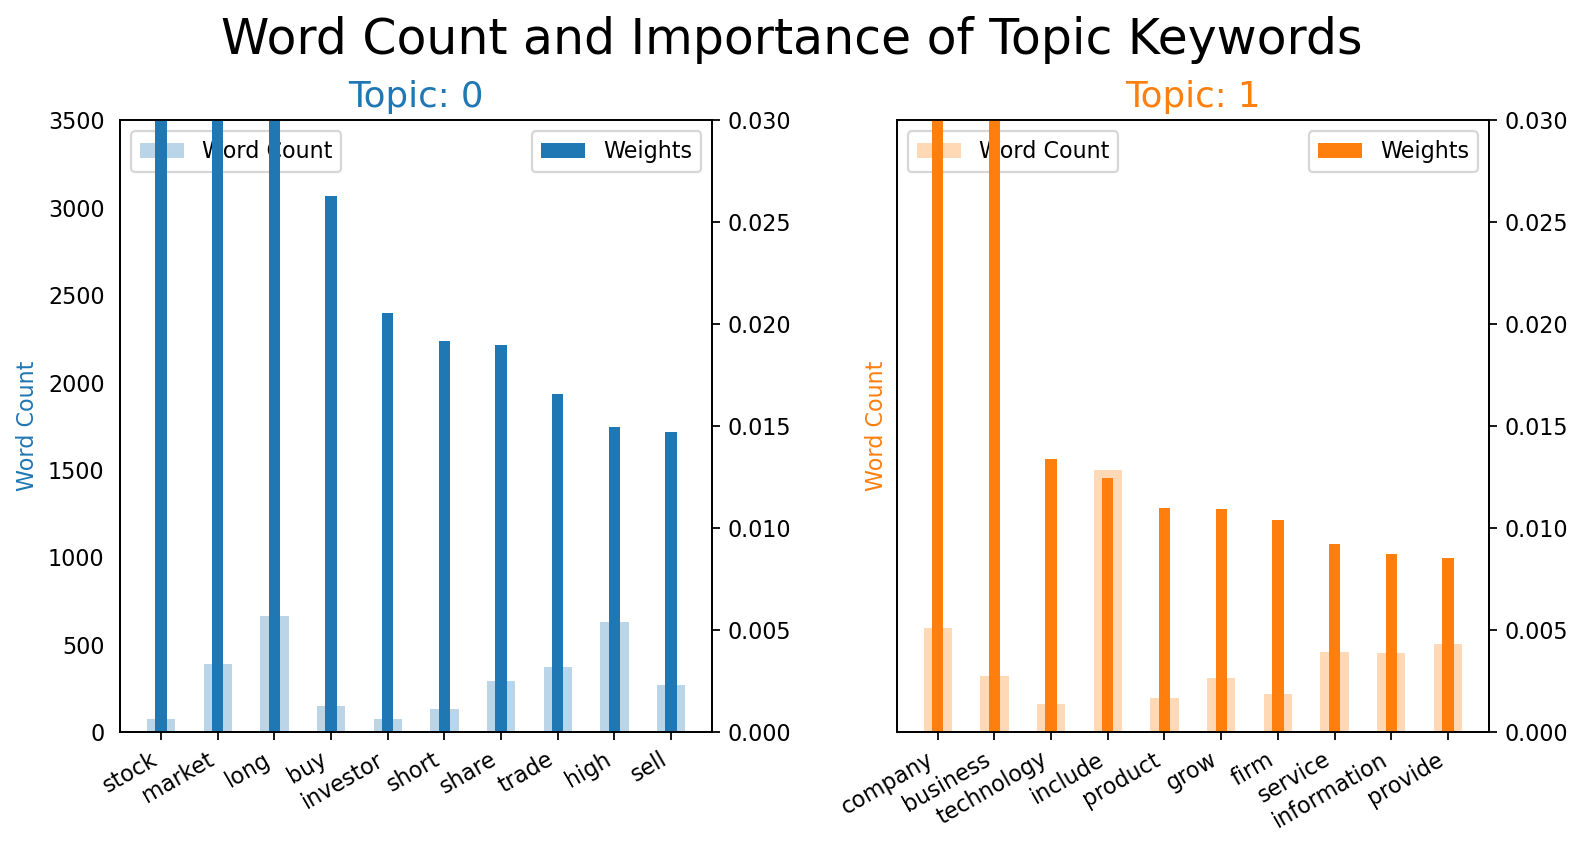

In [1135]:
import matplotlib.colors as mcolors
from collections import Counter
topics = optimal_model.show_topics(formatted=False)


out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### Topic Labelling

In [1086]:
topic_labels = ["Government","Business"]   

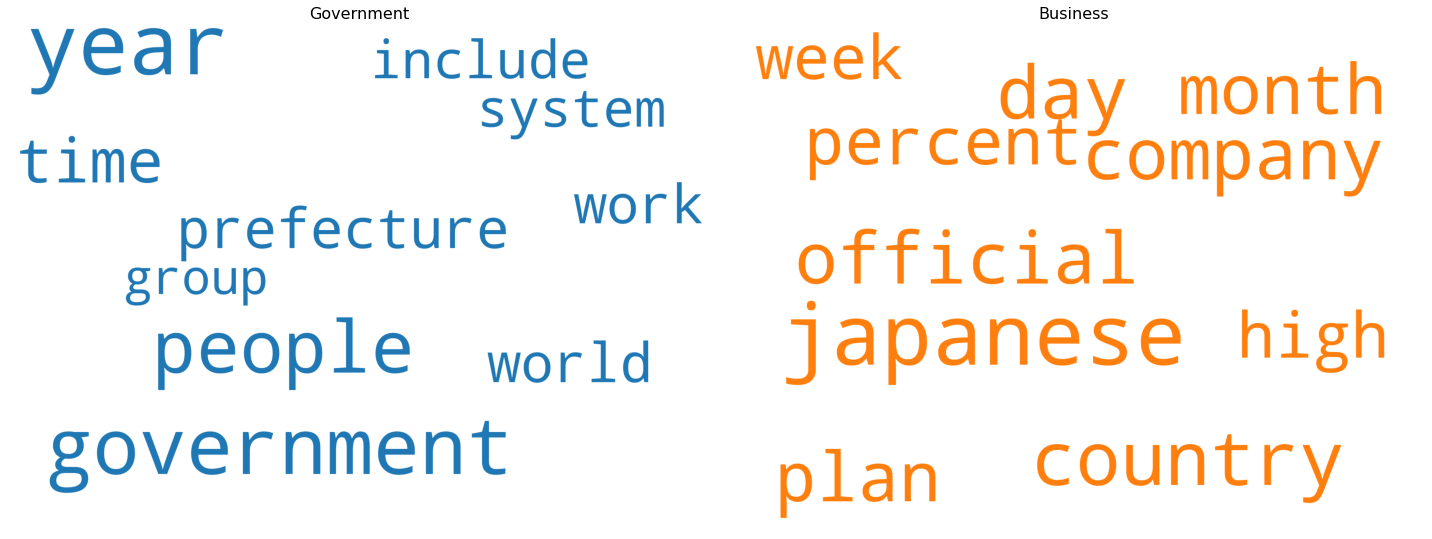

In [1087]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(20,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(topic_labels[i], fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Save LDA model

In [1089]:
from gensim.test.utils import datapath
temp_file = datapath("model_1")
optimal_model.save(temp_file)

### Grouping Dataset as collections based on identified Topics

In [1090]:
df_dominant_topic_jt

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0              0               0              0.6112   
1              1               0              0.5444   
2              2               1              0.5457   
3              3               1              0.6043   
4              4               0              0.5690   
..           ...             ...                 ...   
596          596               1              0.5195   
597          597               1              0.5527   
598          598               0              0.5551   
599          599               0              0.5218   
600          600               0              0.5219   

                                              Keywords  \
0    year, government, people, time, prefecture, wo...   
1    year, government, people, time, prefecture, wo...   
2    japanese, country, day, official, company, mon...   
3    japanese, country, day, official, company, mon...   
4    year, government, people, time, prefecture, wo...   
..                                                 ...   
596  japanese, country, day, official, company, mon...   
597  japanese, country, day, official, company, mon...   
598  year, government, people, time, prefecture, wo...   
599  year, government, people, time, prefecture, wo...   
600  year, government, people, time, prefecture, wo...   

                                                  Text  
0    The leader of Komeito, the junior party in the...  
1    CHEONAN, South Korea – South Korean President ...  
2    Nagoya authorities are worried that the more t...  
3    WASHINGTON – Three U.S. spy programs aimed at ...  
4    Article expired The article you have been look...  
..                                                 ...  
596  A day after Prime Minister Shinzo Abe set July...  
597  WASHINGTON – Joseph Nye, former U.S. assistant...  
598  LOS ANGELES/SACRAMENTO, CALIFORNIA – Californi...  
599  As the current state of emergency is set to be...  
600  CHIBA – At this year’s Tokyo Game Show, the bi...  

[601 rows x 5 columns]

In [1091]:
df_dominant_topic_jt['Dominant_Topic'] = df_dominant_topic_jt['Dominant_Topic'].replace([0,1], topic_labels)

In [1092]:
topic_extracted = df_dominant_topic_jt[['Dominant_Topic', 'Keywords']]

In [1101]:
tags_organizer(jt)

extracted_clean_text  \
0    The leader of Komeito, the junior party in the...   
1    CHEONAN, South Korea – South Korean President ...   
2    Nagoya authorities are worried that the more t...   
3    WASHINGTON – Three U.S. spy programs aimed at ...   
4    Article expired\nThe article you have been loo...   
..                                                 ...   
596  A day after Prime Minister Shinzo Abe set July...   
597  WASHINGTON – Joseph Nye, former U.S. assistant...   
598  LOS ANGELES/SACRAMENTO, CALIFORNIA – Californi...   
599  As the current state of emergency is set to be...   
600  CHIBA – At this year’s Tokyo Game Show, the bi...   

                                       extracted_title  \
0    Komeito chief calls for Japan to create Asian ...   
1    Moon Jae-in to focus on victims in 'comfort wo...   
2    Abandoned boats pose tsunami hazard at Nagoya ...   
3    NSA surveillance powers lapse after no deal in...   
4                    Article expired - The Japan Times   
..                                                 ...   
596  Ruling, opposition camps switch into campaign ...   
597  Ex-Pentagon official lambastes U.S. unilateral...   
598  California gets first comprehensive regulation...   
599  Olympic torch relay likely to be taken off pub...   
600  High-speed 5G network seen as ready to give bi...   

    extracted_published_date extracted_publisher     extractedkeyw_per  \
0                 2022-01-02     The Japan Times                  ['']   
1                 2020-08-14     The Japan Times          ['MoonJae-']   
2                 2015-03-06     The Japan Times                  ['']   
3                 2015-06-01     The Japan Times                  ['']   
4                 2013-05-10     The Japan Times                  ['']   
..                       ...                 ...                   ...   
596               2016-06-02     The Japan Times         ['ShinzoAbe']   
597               2004-01-01     The Japan Times  ['JosephNye', 'Nye']   
598               2015-10-10     The Japan Times        ['JerryBrown']   
599               2021-05-27     The Japan Times                  ['']   
600               2019-09-16     The Japan Times                  ['']   

                                     extractedkeyw_org  \
0    ['theOrganisationforSecurityandEconomicCo-oper...   
1                                                 ['']   
2                                                 ['']   
3                                           ['Senate']   
4                                                 ['']   
..                                                 ...   
596      ['UpperHouse', 'Abe’sLiberalDemocraticParty']   
597                              ['HarvardUniversity']   
598            ['aBureauofMedicalMarijuanaRegulation']   
599                ['Hokkaido', 'Sapporo', 'Hokkaido']   
600                                          ['CHIBA']   

                                     extractedkeyw_pla url_status  \
0    ['Komeito', 'Japan', 'theUnitedStates', 'China...      valid   
1    ['CHEONAN', 'SouthKorea', 'SouthKorea’s', 'Jap...      valid   
2                                           ['Nagoya']      valid   
3                               ['WASHINGTON', 'U.S.']      valid   
4                                                 ['']      valid   
..                                                 ...        ...   
596                                        ['Komeito']      valid   
597  ['WASHINGTON', 'U.S.', 'theUnitedStates', 'U.S.']      valid   
598        ['LOSANGELES/', 'CALIFORNIA', 'California']      valid   
599                                               ['']      valid   
600                                               ['']      valid   

                                                   url  \
0    https://www.japantimes.co.jp/news/2022/01/02/n...   
1    https://www.japantimes.co.jp/news/2020/08/14/n...   
2    https://www.japantimes.co.jp/news/2015/03/06/n

In [1102]:
jt_tagged = pd.concat([jt, topic_extracted], axis=1)

In [1104]:
JapanTimes_Collections=[]
for i, x in jt_tagged.groupby('Dominant_Topic'):
    globals()['JT_tagged_' + str(i)] = x
    JapanTimes_Collections.append('JT_tagged_' + str(i))
JapanTimes_Collections

['JT_tagged_Business', 'JT_tagged_Government']

In [1105]:
JT_tagged_Business

extracted_clean_text  \
2    Nagoya authorities are worried that the more t...   
3    WASHINGTON – Three U.S. spy programs aimed at ...   
5    KIEV – Ukraine accused Russian army officers o...   
6    KOCHI – Japan is struggling to crack down on t...   
12   U.K. Prime Minister Boris Johnson faces the mo...   
..                                                 ...   
592  Tokyo’s Haneda airport, the nation’s busiest d...   
594  SoftBank Group Corp., the firm that has plowed...   
595  Commuters and residents of Tokyo expressed wor...   
596  A day after Prime Minister Shinzo Abe set July...   
597  WASHINGTON – Joseph Nye, former U.S. assistant...   

                                       extracted_title  \
2    Abandoned boats pose tsunami hazard at Nagoya ...   
3    NSA surveillance powers lapse after no deal in...   
5         Russia officers aiding rebels, Ukraine says    
6    Poaching of glass eels on the rise in Japan am...   
12   U.K.’s Boris Johnson faces week that defines h...   
..                                                 ...   
592  Control-tower power blackout amid inspection s...   
594  SoftBank makes first foray into Chile in Bette...   
595  Tokyo residents voice concerns over surging co...   
596  Ruling, opposition camps switch into campaign ...   
597  Ex-Pentagon official lambastes U.S. unilateral...   

    extracted_published_date extracted_publisher     extractedkeyw_per  \
2                 2015-03-06     The Japan Times                  ['']   
3                 2015-06-01     The Japan Times                  ['']   
5                 2014-07-15     The Japan Times                  ['']   
6                 2020-01-28     The Japan Times                  ['']   
12                2022-01-24     The Japan Times      ['BorisJohnson']   
..                       ...                 ...                   ...   
592               2005-08-03     The Japan Times                  ['']   
594               2021-06-17     The Japan Times                  ['']   
595               2020-07-16     The Japan Times       ['AkikoTakeda']   
596               2016-06-02     The Japan Times         ['ShinzoAbe']   
597               2004-01-01     The Japan Times  ['JosephNye', 'Nye']   

                                     extractedkeyw_org  \
2                                                 ['']   
3                                           ['Senate']   
5                                             ['KIEV']   
6                                                 ['']   
12      ['ConservativeParty', 'ParliamentNusratGhani']   
..                                                 ...   
592                                               ['']   
594  ['SoftBankGroupCorp.', 'Betterfly', 'SoftBank'...   
595                            ['theTokyoSeaLifePark']   
596      ['UpperHouse', 'Abe’sLiberalDemocraticParty']   
597                              ['HarvardUniversity']   

                                     extractedkeyw_pla url_status  \
2                                           ['Nagoya']      valid   
3                               ['WASHINGTON', 'U.S.']      valid   
5         ['Ukraine', 'Moscow', 'Russia', 'Ukrainian']      valid   
6                         ['Japan', 'KochiPrefecture']      valid   
12                                            ['U.K.']      valid   
..                                                 ...        ...   
592                                          ['Tokyo']      valid   
594                                          ['Chile']      valid   
595                                 ['Tokyo', 'Tokyo']      valid   
596                                        ['Komeito']      valid   
597  ['WASHINGTON', 'U.S.', 'theUnitedStates', 'U.S.']      valid   

                                                   url  \
2    https://www.japantimes.co.jp/news/2015/03/06/n...   
3    https://www.japantimes.co.jp/news/2015/06/01/w...   
5    https://www.japantimes.co.jp/news/2014/07/15/w

In [1106]:
print(tags_counter(JT_tagged_Business))
print(JT_tagged_Business.extracted_published_date.min())
print(JT_tagged_Business.extracted_published_date.max())

["''", "''", "'U.S.'"]
2002-09-07
2022-05-28


In [1107]:
print(tags_counter(JT_tagged_Government))
print(JT_tagged_Government.extracted_published_date.min())
print(JT_tagged_Government.extracted_published_date.max())

["''", "''", "'Japan'"]
2002-02-06
2022-05-25


# Preparation of corpus and Topic Modeling for CNBC

## Loading CNBC dataset with extracted candidate tags

In [480]:
import pandas as pd
cnbc = pd.read_csv('D:/DAEN/DAEN 690/Datasets/New Extraction_Checkpoints/cnbc_extracted.csv')
cnbc

extracted_clean_text  \
0    Santoli’s Wednesday market notes: Could Septem...   
1    This commentary originally ran on Facebook.\nW...   
2    In spring, ambitious reforms began in Italy. U...   
3    The US government is increasingly likely to co...   
4    - Trump praised Western air strikes against th...   
..                                                 ...   
615  v align="left">>\nGeneral Maritime : Cramer li...   
616  There is a lot of tough talk emanating from th...   
617  Is it better to rent or to own?\nThe default a...   
618  Since 2009 every time stocks have 3-week losin...   
619  Noble Energy Announces Conference Call To Disc...   

                                       extracted_title  \
0    Santoli’s Wednesday market notes: Could Septem...   
1    Ian Bremmer's take on the early Brexit winners...   
2    Europe's recovery depends on Renzi's Italy—Com...   
3    US Moves Closer to Becoming A Major Shareholde...   
4    Trump: 'Mission accomplished' on 'perfectly ex...   
..                                                 ...   
615                                       Sudden Death   
616           Prepare for an Oil Shock With Currencies   
617  Cash-Hungry States Are Putting Buildings on th...   
618  Every time stocks have three-week losing strea...   
619  Noble Energy Announces Conference Call To Disc...   

    extracted_published_date extracted_publisher  \
0                 2021-09-29                CNBC   
1                 2016-06-24                CNBC   
2                 2014-03-25                CNBC   
3                 2009-04-22                CNBC   
4                 2018-04-14                CNBC   
..                       ...                 ...   
615               2007-05-17                CNBC   
616               2012-03-26                CNBC   
617               2010-05-05                CNBC   
618               2019-05-29                CNBC   
619               2012-10-05                CNBC   

                                     extractedkeyw_per  \
0    [Santoli, Mike Santoli, Michael Nagle, Bloombe...   
1    [Boris Johnson, Boris Johnson's, Brexit, There...   
2    [Matteo Renzi, Angela Merkel, Obama, François ...   
3                                       [Obama, Obama]   
4    [George W. Bush's, Donald Trump, Bashar Assad,...   
..                                                 ...   
615  [Peter Georgiopolous, Comcast, Peter Georgiopo...   
616  [Rebecca Patterson, Melissa Lee, Patterson, Pa...   
617  [Dean Martin, Martin, Kevin Shannon, Richard E...   
618                   [Kensho, Consumer Discretionary]   
619                                                 []   

                                     extractedkeyw_org  \
0    [CNBC, the S & P 500, Treasury, Treasury, Sher...   
1    [UK Independence Party, Marine Le Pen/Geert Wi...   
2                                                   []   
3    [General Motors, CNBC, GM, the United Auto Wor...   
4    [Trump, Trump, Defense, Assad, Pentagon, Penta...   
..                                                 ...   
615                                                 []   
616  [J.P. Morgan Asset Management, Institutional, ...   
617  [the State Legislature, Fidelity, Vanguard, Ca...   
618                 [CNBC, Kensho, CNBC, Kensho, Tech]   
619  [Noble Energy Announces Conference Call To Dis...   

                                     extractedkeyw_pla url_status  \
0                                     [New York, U.S.]      valid   
1    [London, UK, France, Netherlands, Russia, Scot...      valid   
2                         [Italy, Italy, Italy, Italy]      valid   
3                                             [US, US]      valid   
4    [Iraq, Syria, U.S., U.S., Russia, France, the ...      valid   
..                                                 ...        ...   
615                                                 []      valid   
616                        [Norway, Norway, Saturdays]      valid   


### Import/Install Required Libraries and Packages

In [481]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

### EDA - Wordcloud from titles for possible descriptor tags

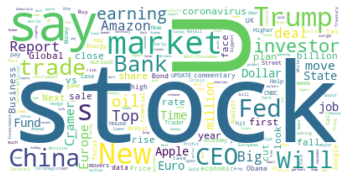

In [482]:
#Creating the text variable

text2 = " ".join(title for title in cnbc.extracted_title)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

### Text Preprocessing,Cleaning and Tokenization

In [484]:
# Convert to list
data5 = cnbc.extracted_clean_text.values.tolist()
# Remove Emails
data5 = [re.sub('\S*@\S*\s?', '', sent) for sent in data5]

# Remove new line characters
data5 = [re.sub('\s+', ' ', sent) for sent in data5]

# Remove distracting single quotes
data5 = [re.sub("\'", "", sent) for sent in data5]

pprint(data5[0:1])

['Santoli’s Wednesday market notes: Could September’s stock shakeout tee up '
 'strength for the fourth quarter? This is the daily notebook of Mike Santoli, '
 'CNBCs senior markets commentator, with ideas about trends, stocks and market '
 'statistics. A muted, inconclusive bounce that has left the indexes fully '
 'within yesterdays low-to-high range all morning so far. Heres how September '
 'looks in the S & P 500. Whether a real retest of last weeks low is needed or '
 'whether its too soon for a proper retest, hard to say. Still havent closed '
 'down 5% from a high in nearly a year, so this remains pretty routine stuff. '
 'Any bounce will be a "show me" proposition unless/until it clears 4,450 '
 'decisively at this point. It can simultaneously be true that this could be a '
 'benign prolonged shakeout that sets up some fourth-quarter strength and that '
 'it could go longer/deeper before its through. Treasury yields calming down '
 'today allowing the slightest (fleeting?) rel

In [485]:
#Function for tokenizing
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data5))

print(data_words[0:1])

[['santoli', 'wednesday', 'market', 'notes', 'could', 'september', 'stock', 'shakeout', 'tee', 'up', 'strength', 'for', 'the', 'fourth', 'quarter', 'this', 'is', 'the', 'daily', 'notebook', 'of', 'mike', 'santoli', 'cnbcs', 'senior', 'markets', 'commentator', 'with', 'ideas', 'about', 'trends', 'stocks', 'and', 'market', 'statistics', 'muted', 'inconclusive', 'bounce', 'that', 'has', 'left', 'the', 'indexes', 'fully', 'within', 'yesterdays', 'low', 'to', 'high', 'range', 'all', 'morning', 'so', 'far', 'heres', 'how', 'september', 'looks', 'in', 'the', 'whether', 'real', 'retest', 'of', 'last', 'weeks', 'low', 'is', 'needed', 'or', 'whether', 'its', 'too', 'soon', 'for', 'proper', 'retest', 'hard', 'to', 'say', 'still', 'havent', 'closed', 'down', 'from', 'high', 'in', 'nearly', 'year', 'so', 'this', 'remains', 'pretty', 'routine', 'stuff', 'any', 'bounce', 'will', 'be', 'show', 'me', 'proposition', 'unless', 'until', 'it', 'clears', 'decisively', 'at', 'this', 'point', 'it', 'can', 'si

### Prepare NLTK Stop words

In [486]:
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS

stop_words = stopwords.words('english')
stop_words.extend(list(STOP_WORDS))
stop_words.extend(['said','say'])



In [487]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Visualizing Unigrams in text before and after removing stopwords

In [488]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

the 17614
to 8940
of 7770
and 7125
in 6430
that 3939
is 3452
for 3406
on 3180
it 2778
said 2271
with 1908
as 1875
at 1822
are 1709
from 1569
be 1531
has 1432
have 1429
by 1413


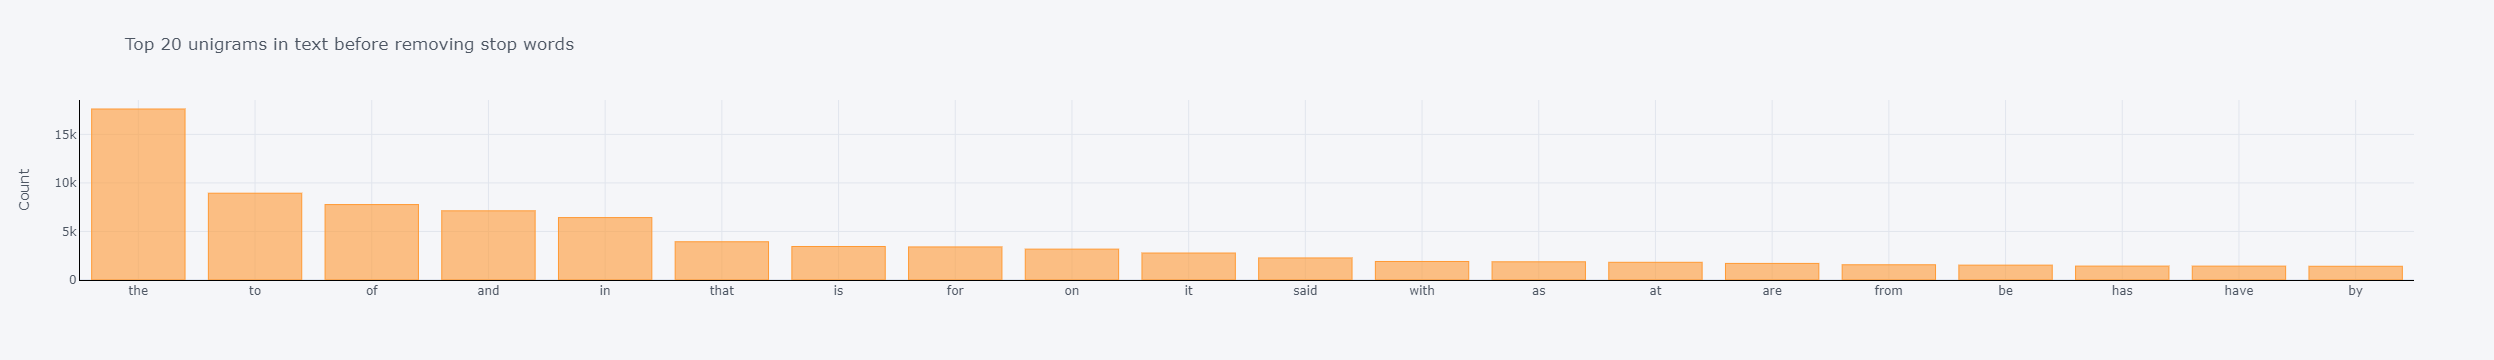

In [489]:
#The distribution of top unigrams before removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(cnbc['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df2.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams in text before removing stop words')

percent 1076
year 908
company 782
market 765
new 756
cnbc 702
owns 605
people 543
million 526
billion 525
time 503
stock 473
think 450
like 428
business 426
long 420
companies 410
week 378
years 378
going 378


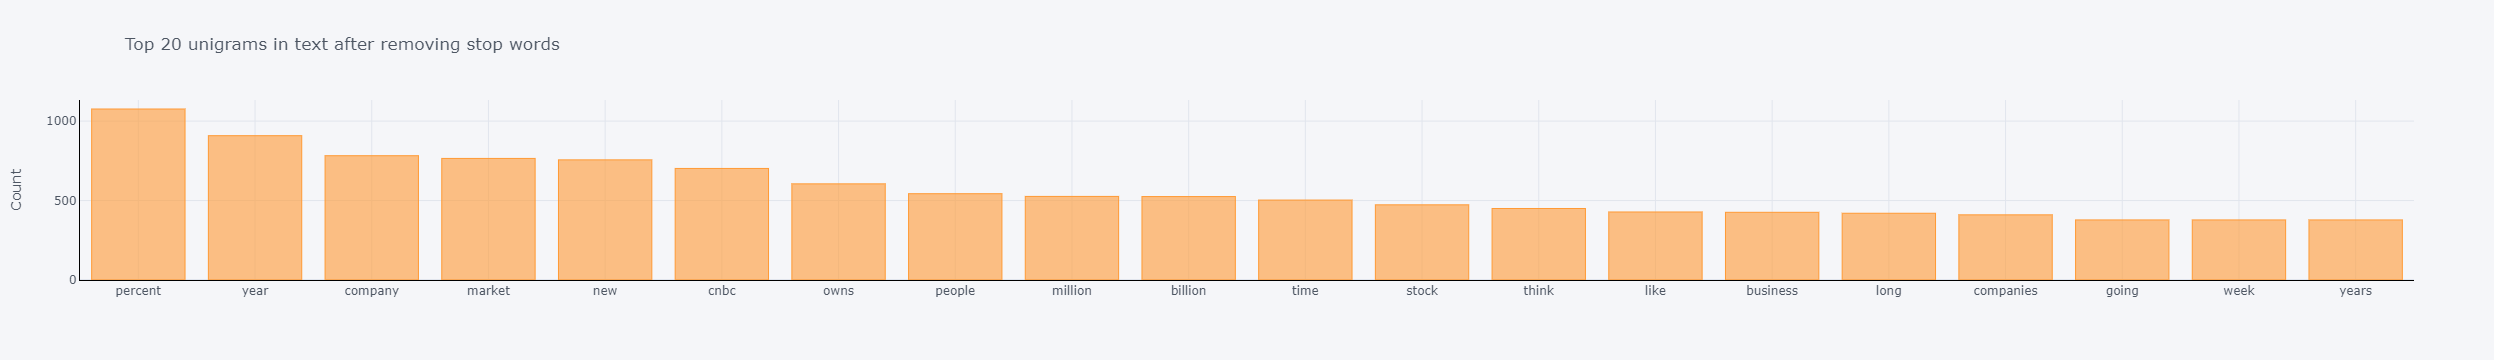

In [490]:
#The distribution of top unigrams after removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = frozenset(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(cnbc['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df3.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams in text after removing stop words')

### Identifying bigrams/trigrams & Lemmatization

In [491]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['santoli', 'wednesday', 'market', 'notes', 'could', 'september', 'stock', 'shakeout', 'tee', 'up', 'strength', 'for', 'the', 'fourth_quarter', 'this', 'is', 'the', 'daily', 'notebook', 'of', 'mike', 'santoli', 'cnbcs', 'senior', 'markets', 'commentator', 'with', 'ideas', 'about', 'trends', 'stocks', 'and', 'market', 'statistics', 'muted', 'inconclusive', 'bounce', 'that', 'has', 'left', 'the', 'indexes', 'fully', 'within', 'yesterdays', 'low', 'to', 'high', 'range', 'all', 'morning', 'so_far', 'heres', 'how', 'september', 'looks', 'in', 'the', 'whether', 'real', 'retest', 'of', 'last', 'weeks', 'low', 'is', 'needed', 'or', 'whether', 'its', 'too', 'soon', 'for', 'proper', 'retest', 'hard', 'to', 'say', 'still', 'havent', 'closed', 'down', 'from', 'high', 'in', 'nearly', 'year', 'so', 'this', 'remains', 'pretty', 'routine', 'stuff', 'any', 'bounce', 'will', 'be', 'show', 'me', 'proposition', 'unless', 'until', 'it', 'clears', 'decisively', 'at', 'this', 'point', 'it', 'can', 'simultane

In [492]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [503]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized5 = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized5[0:1])

[['market', 'note', 'stock', 'shakeout', 'tee', 'strength', 'fourth_quarter', 'daily', 'notebook', 'cnbcs', 'senior', 'market', 'commentator', 'idea', 'trend', 'stock', 'market', 'statistic', 'mute', 'inconclusive', 'bounce', 'leave', 'index', 'fully', 'yesterday', 'low', 'high', 'range', 'morning', 'far', 'here', 'look', 'real', 'retest', 'week', 'low', 'need', 'soon', 'proper', 'retest', 'hard', 'close', 'high', 'nearly', 'year', 'remain', 'pretty', 'routine', 'stuff', 'bounce', 'proposition', 'clear', 'decisively', 'point', 'simultaneously', 'true', 'benign', 'prolong', 'shakeout', 'set', 'strength', 'long', 'deep', 'treasury_yield', 'calm', 'today', 'allow', 'slightest', 'fleeting', 'relief', 'big', 'growth', 'tech', 'note', 'constantly', 's', 'intrinsic', 'inverse', 'relationship', 'treasury_yield', 'tech', 'stock', 'work', 'law', 'nature', 'historically', 'consistent', 'pattern', 'tangle', 'story', 'line', 'recent', 'action', 'cohere', 'persuasive', 'explanation', 'dampener', 'in

### Visualizing Bigrams in text before and after removing stopwords

of the 1652
in the 1598
on the 711
to the 686
for the 619
more than 489
to be 455
the company 447
and the 433
that the 422
at the 386
according to 356
from the 345
with the 334
he said 334
by the 277
going to 272
the market 253
will be 248
has been 245


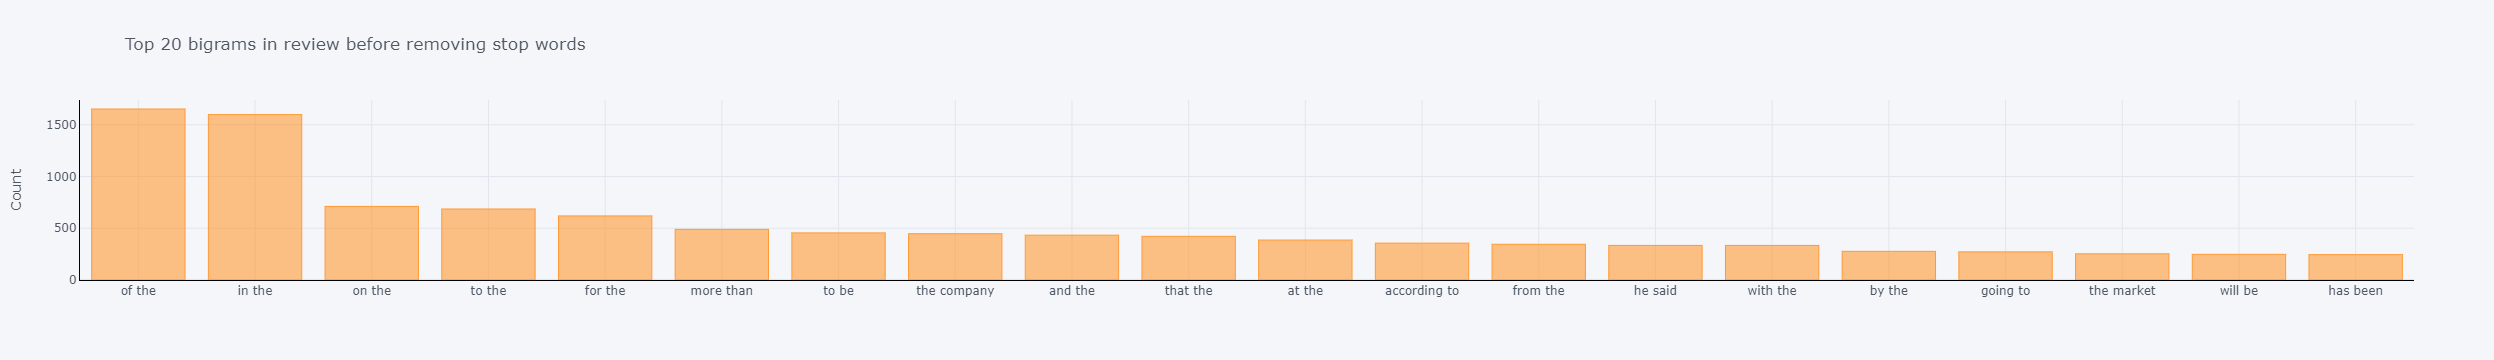

In [494]:
#The distribution of top bigrams before removing stop words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(cnbc['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df4.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')

new york 185
investment partners 149
virtus investment 148
told cnbc 143
cnbc com 131
partners owns 117
wall street 116
united states 116
finerman firm 112
donald trump 98
fast money 85
white house 79
cents share 74
najarian owns 71
federal reserve 69
central bank 68
euro zone 66
interest rates 66
long term 65
president donald 64


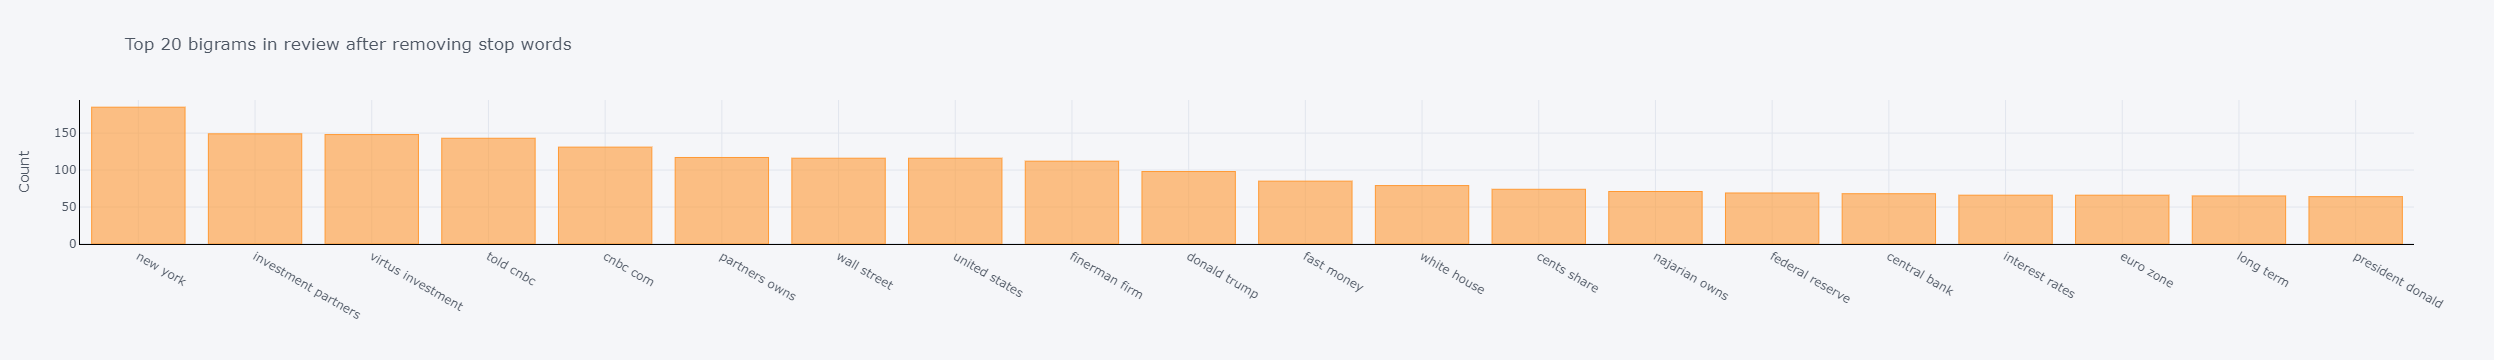

In [495]:
#The distribution of top bigrams after removing stop words

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(cnbc['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df5.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

### Visualizing Trigrams in text before and after removing stopwords

virtus investment partners 148
more than of 140
one of the 127
investment partners owns 117
partners owns more 117
owns more than 117
the end of 108
the united states 103
according to the 93
as well as 78
some of the 76
going to be 76
president donald trump 64
is expected to 63
is going to 62
in terms of 59
finerman firm owns 56
the white house 55
for clients edwards 54
clients edwards owns 54


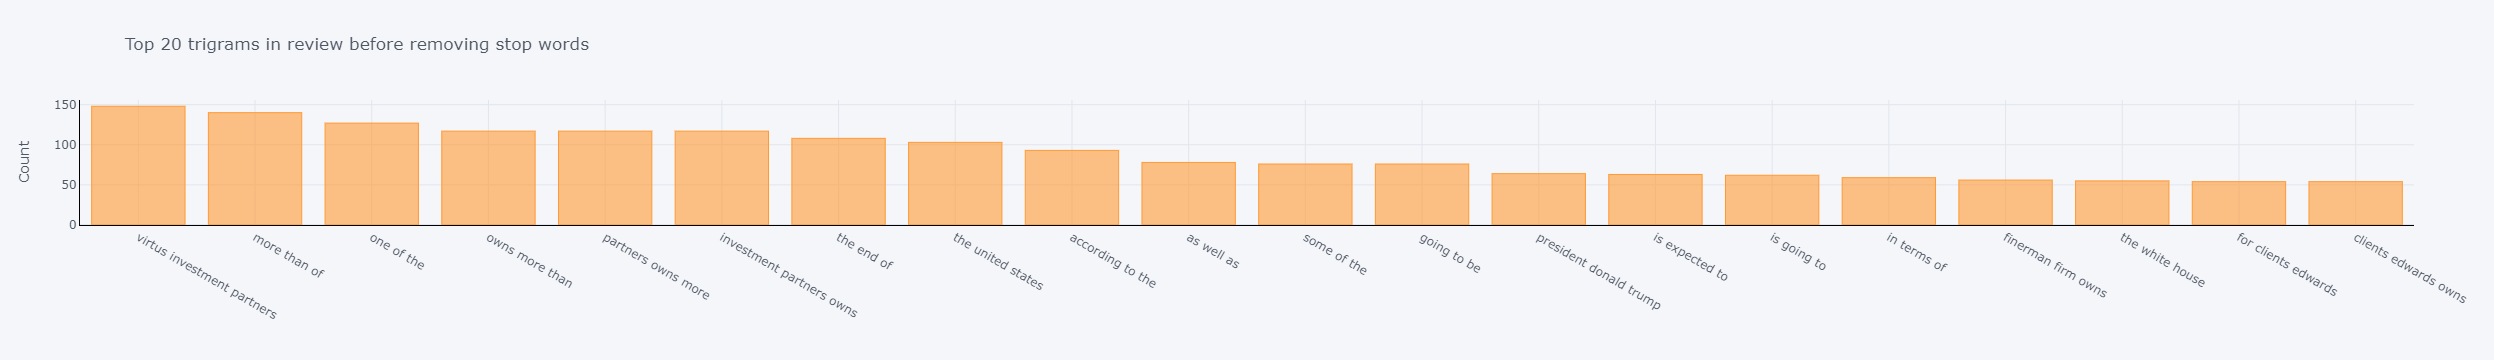

In [496]:
#The distribution of Top trigrams before removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(cnbc['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df6.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

virtus investment partners 148
investment partners owns 117
president donald trump 64
finerman firm owns 56
clients edwards owns 54
related investing news 46
fast money traders 37
pete najarian owns 36
stuart frankel co 35
cnbc fast money 32
nih research grants 31
accounts managed kanundrum 29
managed kanundrum capital 29
finerman firm short 28
following stocks commodities 27
stocks commodities mentioned 27
commodities mentioned intended 27
mentioned intended mentioned 27
intended mentioned cnbc 27
mentioned cnbc fast 27


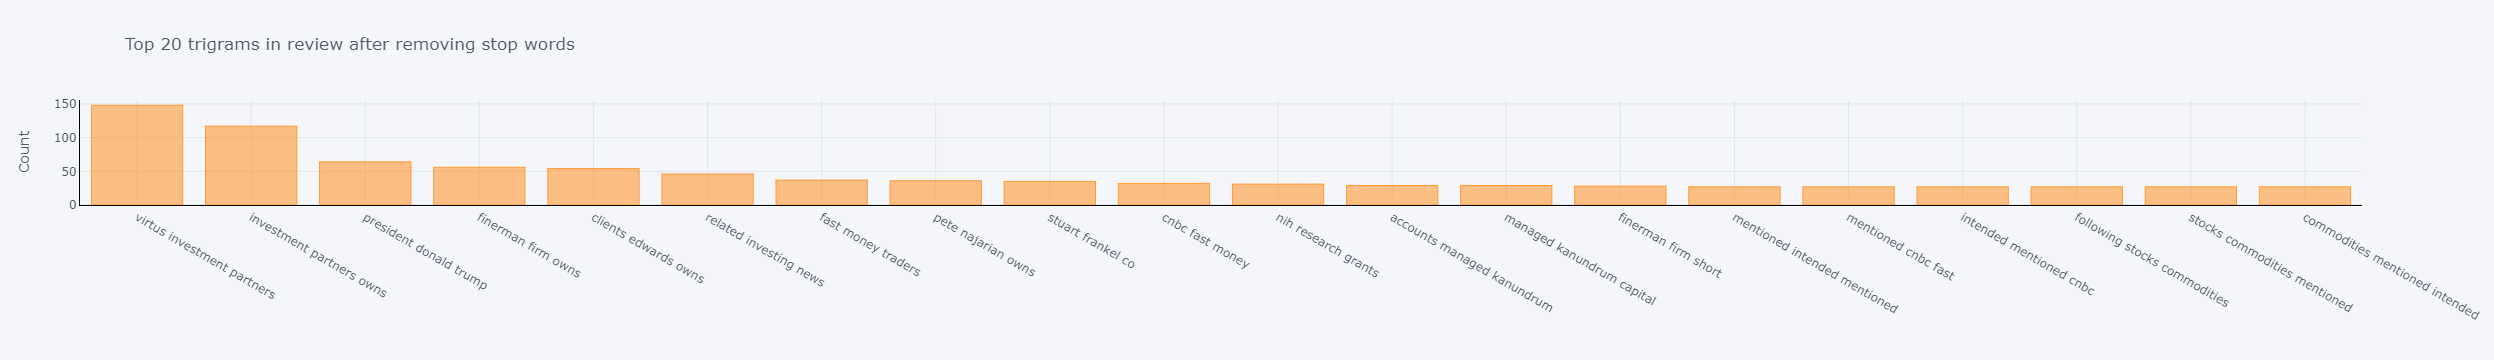

In [497]:
#The distribution of Top trigrams after removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(cnbc['extracted_clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df7 = pd.DataFrame(common_words, columns = ['extracted_clean_text' , 'count'])
df7.groupby('extracted_clean_text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

### Load Dictionary and create corpus for CNBC text

In [498]:
from gensim.test.utils import datapath
temp_file = datapath("model_1.id2word")
dictionary = corpora.Dictionary.load(temp_file)


In [506]:
corpus5 = [dictionary.doc2bow(text) for text in data_lemmatized5]

### Load the Pre-Trained LDA Topic Model

In [500]:
# Build LDA model
from gensim.test.utils import datapath
temp_file = datapath("model_1")
lda_model = gensim.models.ldamodel.LdaModel.load(temp_file)

### Update Model's corpus

In [501]:
lda_model.update(corpus5)

D:\DAEN\Python\anaconda3\lib\site-packages\gensim\models\ldamodel.py:1108: RuntimeWarning:

invalid value encountered in multiply

D:\DAEN\Python\anaconda3\lib\site-packages\gensim\models\ldamodel.py:1109: RuntimeWarning:

invalid value encountered in subtract



### Model Tuning using LDA Mallet

In [1108]:
import os

os.environ['MALLET_HOME'] = 'C:/Users/Madesh/mallet-2.0.8/mallet-2.0.8'

from gensim.models.wrappers import LdaMallet

mallet_path = 'C:/Users/Madesh/mallet-2.0.8/mallet-2.0.8/bin/mallet.bat'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus5, num_topics=index*2+2, id2word=dictionary)


In [1109]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized5, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('percent', 0.01854265505795666),
   ('market', 0.017569469787810855),
   ('year', 0.01699598561076065),
   ('stock', 0.013520323931668491),
   ('high', 0.009140990216012373),
   ('report', 0.008949828823662305),
   ('share', 0.00884555897328954),
   ('price', 0.00820256156265749),
   ('week', 0.00820256156265749),
   ('month', 0.007872373703143736)]),
 (1,
  [('company', 0.018781995308781482),
   ('people', 0.0091941034465047),
   ('business', 0.008440769085897238),
   ('include', 0.00662591812625199),
   ('work', 0.005735613881897718),
   ('time', 0.005581522762682555),
   ('state', 0.005341825466125636),
   ('deal', 0.0046569760473915795),
   ('cost', 0.004554248634581471),
   ('plan', 0.004520006163644769)])]

Coherence Score:  0.42332489521749295


### Find Optimal number of topics to feed the model to identify

In [1110]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus5, num_topics=num_topics, id2word=dictionary,random_seed=0)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [1111]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus5, texts=data_lemmatized5, start=2, limit=14, step=2)

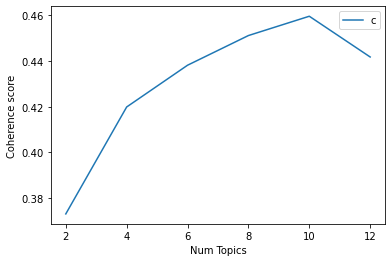

In [1112]:
# Show graph
limit=14; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [1113]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.373
Num Topics = 4  has Coherence Value of 0.4199
Num Topics = 6  has Coherence Value of 0.4382
Num Topics = 8  has Coherence Value of 0.4512
Num Topics = 10  has Coherence Value of 0.4596
Num Topics = 12  has Coherence Value of 0.4418


In [1114]:
cv_values = []
for i,(m, cv) in enumerate(zip(x, coherence_values)):
    if m <=10:
        cv_values.append(cv)
index = cv_values.index(max(cv_values))
index
       

4

#### selecting the most optimal and efficient number of topics <10 to make sure the articles are not overclassified

In [1115]:
# Select the model and print the topics
optimal_model = model_list[index]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.060*"stock" + 0.046*"market" + 0.031*"long" + 0.026*"buy" + '
  '0.021*"investor" + 0.019*"short" + 0.019*"share" + 0.017*"trade" + '
  '0.015*"high" + 0.015*"sell"'),
 (1,
  '0.071*"company" + 0.035*"business" + 0.013*"technology" + 0.012*"include" + '
  '0.011*"product" + 0.011*"grow" + 0.010*"firm" + 0.009*"service" + '
  '0.009*"information" + 0.009*"provide"'),
 (2,
  '0.026*"time" + 0.024*"people" + 0.023*"work" + 0.015*"lot" + 0.015*"good" + '
  '0.014*"thing" + 0.014*"job" + 0.013*"ve" + 0.011*"start" + 0.011*"money"'),
 (3,
  '0.022*"people" + 0.021*"state" + 0.016*"school" + 0.014*"country" + '
  '0.013*"plan" + 0.013*"cost" + 0.012*"city" + 0.011*"health" + 0.010*"case" '
  '+ 0.010*"day"'),
 (4,
  '0.036*"year" + 0.033*"report" + 0.026*"price" + 0.025*"oil" + 0.024*"share" '
  '+ 0.022*"sale" + 0.022*"company" + 0.022*"analyst" + 0.022*"revenue" + '
  '0.020*"expect"'),
 (5,
  '0.020*"government" + 0.019*"deal" + 0.014*"issue" + 0.009*"decision" + '
  '0.009*"stat

### Convert Mallet model to LDA model to visualize the topics

In [1116]:
def convertldaGenToldaMallet(mallet_model):
    model_gensim = gensim.models.ldamodel.LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

optimal_model = convertldaGenToldaMallet(optimal_model)

In [1117]:
#Visualizing Opitmal Model

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus5, dictionary)
vis

D:\DAEN\Python\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log

D:\DAEN\Python\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

D:\DAEN\Python\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.253319 -0.055905       1        1  11.892692
2      0.089213 -0.205775       2        1  10.791316
1      0.076146  0.201251       3        1  10.167547
0     -0.186522 -0.190113       4        1  10.000417
6      0.056259  0.248827       5        1   9.953343
4     -0.272108  0.063970       6        1   9.926233
3      0.080658  0.023550       7        1   9.768326
5      0.223028 -0.178555       8        1   9.622327
9      0.167901 -0.046903       9        1   8.941286
7      0.018743  0.139653      10        1   8.936512, topic_info=         Term         Freq        Total Category  logprob  loglift
529   company  1220.000000  1220.000000  Default  30.0000  30.0000
1178  percent  1111.000000  1111.000000  Default  29.0000  29.0000
1039    stock   845.000000   845.000000  Default  28.0000  28.0000
589    market  1075.000000  1075.000000  Default  27.0000  27.0000
59       year  1325.000000  1325.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
568      home    73.365693   242.009992  Topic10  -5.0425   1.2215
494   service    66.593475   250.744410  Topic10  -5.1394   1.0892
168       day    69.979584   451.772812  Topic10  -5.0898   0.5500
209    number    63.207366   263.278891  Topic10  -5.1916   0.9882
440      time    64.336067   600.090019  Topic10  -5.1739   0.1821

[834 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
300       10  1.107466  abandon
0          1  0.185708   accord
0          6  0.142645   accord
0          7  0.220696   accord
0          8  0.139954   accord
...      ...       ...      ...
59         3  0.058082     year
59         5  0.089764     year
59         6  0.339443     year
59        10  0.251188     year
19808      1  0.998023      yen

[1142 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 2, 1, 7, 5, 4, 6, 10, 8])

### Dominant topic in each sentence

In [1118]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus5, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus5, texts=data5)

# Format
df_dominant_topic_cnbc = df_topic_sents_keywords.reset_index()
df_dominant_topic_cnbc.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic_cnbc.head(10)

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\1906040336.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\1906040336.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               0              0.3298   
1            1               9              0.2227   
2            2               8              0.1853   
3            3               6              0.2975   
4            4               9              0.4454   
5            5               8              0.2026   
6            6               1              0.3420   
7            7               6              0.2013   
8            8               0              0.2143   
9            9               6              0.2963   

                                            Keywords  \
0  stock, market, long, buy, investor, short, sha...   
1  trump, vote, political, lead, campaign, report...   
2  percent, market, year, growth, economy, month,...   
3  financial, bank, investment, fund, tax, debt, ...   
4  trump, vote, political, lead, campaign, report...   
5  percent, market, year, growth, economy, month,...   
6  company, business, technology, include, produc...   
7  financial, bank, investment, fund, tax, debt, ...   
8  stock, market, long, buy, investor, short, sha...   
9  financial, bank, investment, fund, tax, debt, ...   

                                                Text  
0  Santoli’s Wednesday market notes: Could Septem...  
1  This commentary originally ran on Facebook. WI...  
2  In spring, ambitious reforms began in Italy. U...  
3  The US government is increasingly likely to co...  
4  - Trump praised Western air strikes against th...  
5  Chevron Chief Executive John Watson told CNBC ...  
6  Founders: Eran Barak, Barak Klinghofer (chief ...  
7  - Federal Reserve Chairman Jerome Powell also ...  
8  Fewer investors have a fear of missing out, so...  
9  James Gorman, Morgan Stanley’s chief executive...

### Most representative document for each topic

In [1119]:
# Group top article under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

Topic_Num  Topic_Perc_Contrib  \
0          0              0.6449   
1          1              0.6212   
2          2              0.5684   
3          3              0.6864   
4          4              0.5712   
5          5              0.5353   
6          6              0.5751   
7          7              0.5749   
8          8              0.6262   
9          9              0.6623   

                                            Keywords  \
0  stock, market, long, buy, investor, short, sha...   
1  company, business, technology, include, produc...   
2  time, people, work, lot, good, thing, job, ve,...   
3  people, state, school, country, plan, cost, ci...   
4  year, report, price, oil, share, sale, company...   
5  government, deal, issue, decision, statement, ...   
6  financial, bank, investment, fund, tax, debt, ...   
7  year, team, store, game, facebook, accord, lau...   
8  percent, market, year, growth, economy, month,...   
9  trump, vote, political, lead, campaign, report...   

                                                Text  
0  Corporate insiders sell their own companies st...  
1  Progress continues toward integrated standards...  
2  - CNBC takes a first look at Apples new $549 A...  
3  Countries With the Most Expensive Private Scho...  
4  - Shares of Pfizer and Merck rose after report...  
5  - U.S. President Donald Trumps administration ...  
6  - The IRS and Treasury gave taxpayers more tim...  
7  - 25 Disney stores will open at certain Target...  
8  The outlook for Singapores economic growth was...  
9  - A new report to Congress by the Trump admini...

In [1132]:
df_dominant_topic_cnbc[(df_dominant_topic_cnbc.Dominant_Topic == 7) & (df_dominant_topic_cnbc.Topic_Perc_Contrib > 0.30)]

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
33            33               7              0.4785   
45            45               7              0.4366   
56            56               7              0.3995   
67            67               7              0.3057   
84            84               7              0.4623   
90            90               7              0.3090   
105          105               7              0.3637   
107          107               7              0.3506   
111          111               7              0.3479   
131          131               7              0.3318   
195          195               7              0.4761   
197          197               7              0.3422   
198          198               7              0.3685   
220          220               7              0.4013   
222          222               7              0.5749   
248          248               7              0.4400   
275          275               7              0.4660   
277          277               7              0.3046   
287          287               7              0.3314   
339          339               7              0.3275   
341          341               7              0.3029   
483          483               7              0.4261   
496          496               7              0.4773   
534          534               7              0.3938   
561          561               7              0.3426   
592          592               7              0.4780   
602          602               7              0.4080   
609          609               7              0.4913   

                                              Keywords  \
33   year, team, store, game, facebook, accord, lau...   
45   year, team, store, game, facebook, accord, lau...   
56   year, team, store, game, facebook, accord, lau...   
67   year, team, store, game, facebook, accord, lau...   
84   year, team, store, game, facebook, accord, lau...   
90   year, team, store, game, facebook, accord, lau...   
105  year, team, store, game, facebook, accord, lau...   
107  year, team, store, game, facebook, accord, lau...   
111  year, team, store, game, facebook, accord, lau...   
131  year, team, store, game, facebook, accord, lau...   
195  year, team, store, game, facebook, accord, lau...   
197  year, team, store, game, facebook, accord, lau...   
198  year, team, store, game, facebook, accord, lau...   
220  year, team, store, game, facebook, accord, lau...   
222  year, team, store, game, facebook, accord, lau...   
248  year, team, store, game, facebook, accord, lau...   
275  year, team, store, game, facebook, accord, lau...   
277  year, team, store, game, facebook, accord, lau...   
287  year, team, store, game, facebook, accord, lau...   
339  year, team, store, game, facebook, accord, lau...   
341  year, team, store, game, facebook, accord, lau...   
483  year, team, store, game, facebook, accord, lau...   
496  year, team, store, game, facebook, accord, lau...   
534  year, team, store, game, facebook, accord, lau...   
561  year, team, store, game, facebook, accord, lau...   
592  year, team, store, game, facebook, accord, lau...   
602  year, team, store, game, facebook, accord, lau...   
609  year, team, store, game, facebook, accord, lau...   

                                                  Text  
33   - In the past two weeks, MLB teams have spent ...  
45   Those tuning into the Grammys may have caught ...  
56   Like many 16-year-olds, Chase Reed spends his ...  
67   For the second time in 10 years, the Universit...  
84   Baseball Hall of Fame Presented With One-of-a-...  
90   Spending a little too much time playing Call o...  
105  Tired of plucking all the marshmallows out of ...  
107  - Sears will use its Auto Centers to help inst...  
111  Outrageous Small Business Publicity Stunts Any...  
131  - Chinese retailer JD.com plans to very aggres...  
195  - Nadja Swarovski, chair of the Swarovski Foun...  
197  Golden S

### Visualizing Word Count and Importance of Topic Keywords

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3905052245.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3905052245.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3905052245.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3905052245.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3905052245.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3905052245.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Madesh\AppData\Local\Temp\ipykernel_29644\3905052245.py:24: UserWarning:

FixedFormatter should only be used togeth

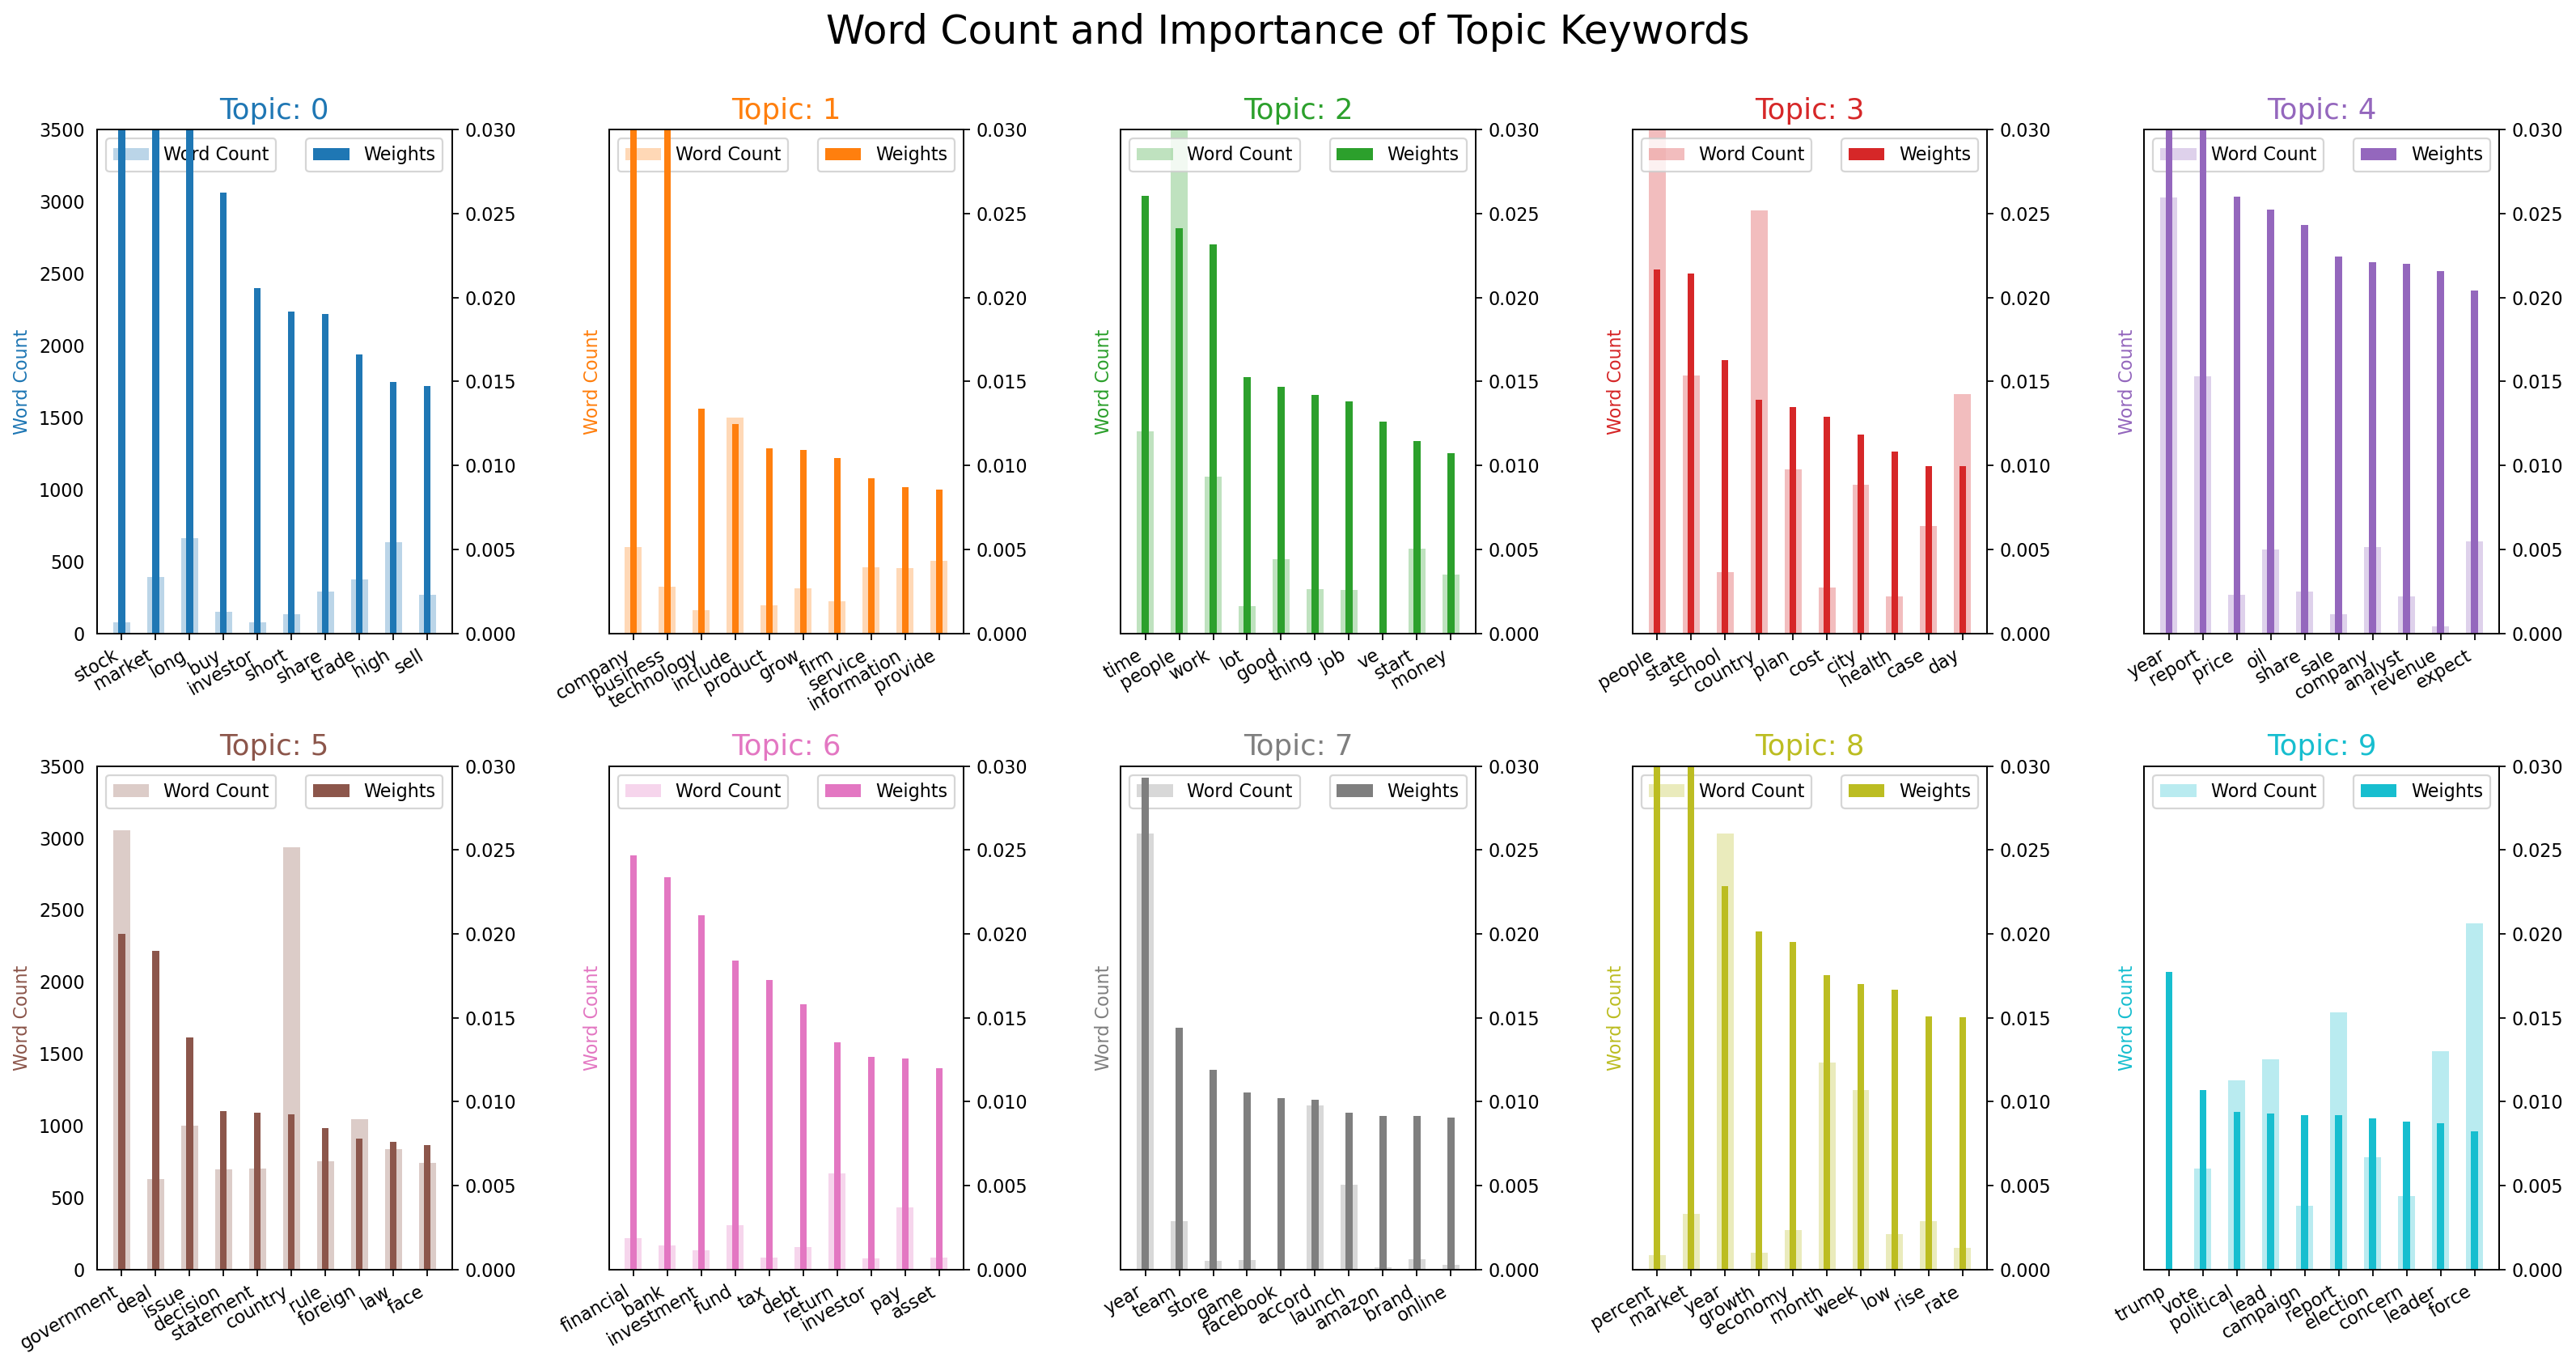

In [1122]:
import matplotlib.colors as mcolors
from collections import Counter
topics = optimal_model.show_topics(formatted=False)


out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 5, figsize=(20,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### Topic Labelling for CNBC dataset

In [1133]:
topic_labels = ["Market_Trade","Market_Business","Market_Jobs","Market_Stocks_Shares","World","Government","Market_Investments","Sports_Entertainment","Market_Economy","Politics"]   

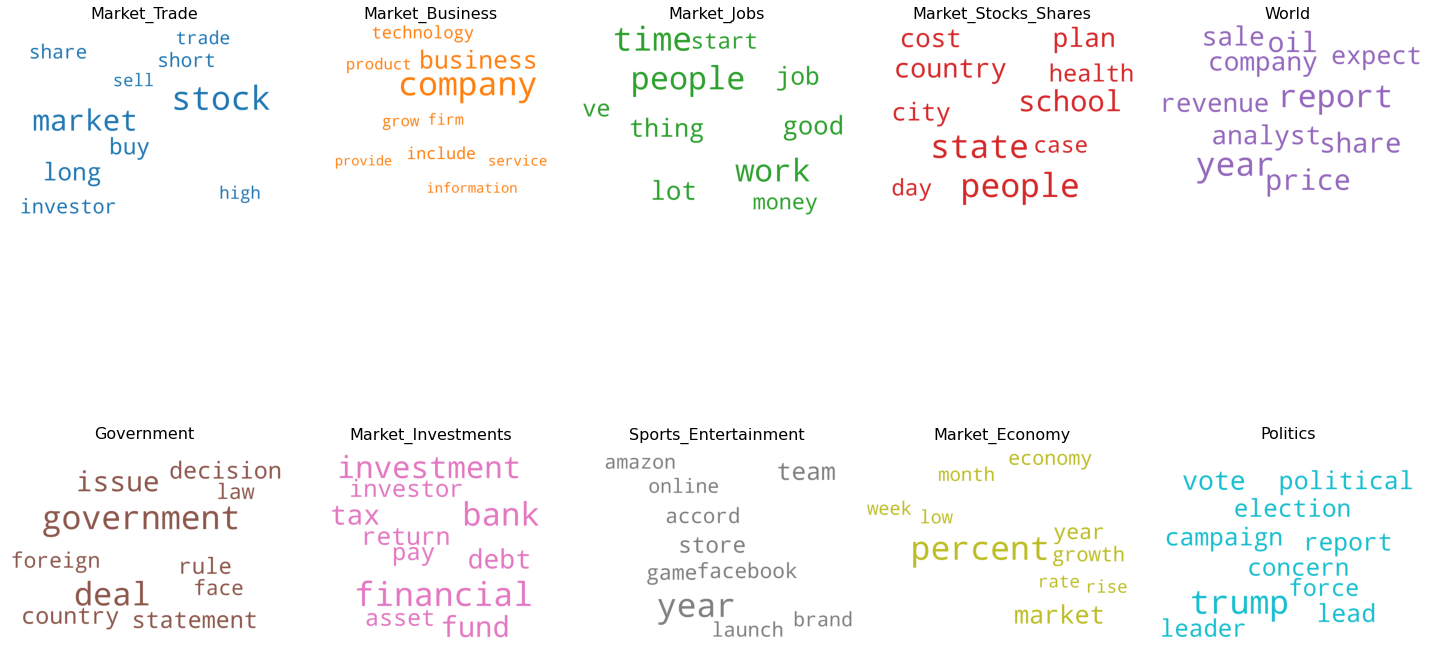

In [1134]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(20,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(topic_labels[i], fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [1136]:
#save LDA model
from gensim.test.utils import datapath
temp_file = datapath("model_1")
optimal_model.save(temp_file)

### Grouping Dataset as collections based on identified Topics

In [1138]:
df_dominant_topic_cnbc

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0              0               0              0.3298   
1              1               9              0.2227   
2              2               8              0.1853   
3              3               6              0.2975   
4              4               9              0.4454   
..           ...             ...                 ...   
615          615               0              0.1948   
616          616               0              0.2001   
617          617               6              0.1960   
618          618               0              0.2160   
619          619               1              0.2266   

                                              Keywords  \
0    stock, market, long, buy, investor, short, sha...   
1    trump, vote, political, lead, campaign, report...   
2    percent, market, year, growth, economy, month,...   
3    financial, bank, investment, fund, tax, debt, ...   
4    trump, vote, political, lead, campaign, report...   
..                                                 ...   
615  stock, market, long, buy, investor, short, sha...   
616  stock, market, long, buy, investor, short, sha...   
617  financial, bank, investment, fund, tax, debt, ...   
618  stock, market, long, buy, investor, short, sha...   
619  company, business, technology, include, produc...   

                                                  Text  
0    Santoli’s Wednesday market notes: Could Septem...  
1    This commentary originally ran on Facebook. WI...  
2    In spring, ambitious reforms began in Italy. U...  
3    The US government is increasingly likely to co...  
4    - Trump praised Western air strikes against th...  
..                                                 ...  
615  v align="left">> General Maritime : Cramer lik...  
616  There is a lot of tough talk emanating from th...  
617  Is it better to rent or to own? The default an...  
618  Since 2009 every time stocks have 3-week losin...  
619  Noble Energy Announces Conference Call To Disc...  

[620 rows x 5 columns]

In [1139]:
df_dominant_topic_cnbc['Dominant_Topic'] = df_dominant_topic_cnbc['Dominant_Topic'].replace([0,1,2,3,4,5,6,7,8,9], topic_labels)

In [1140]:
topic_extracted = df_dominant_topic_cnbc[['Dominant_Topic', 'Keywords']]

In [1141]:
tags_organizer(cnbc)

extracted_clean_text  \
0    Santoli’s Wednesday market notes: Could Septem...   
1    This commentary originally ran on Facebook.\nW...   
2    In spring, ambitious reforms began in Italy. U...   
3    The US government is increasingly likely to co...   
4    - Trump praised Western air strikes against th...   
..                                                 ...   
615  v align="left">>\nGeneral Maritime : Cramer li...   
616  There is a lot of tough talk emanating from th...   
617  Is it better to rent or to own?\nThe default a...   
618  Since 2009 every time stocks have 3-week losin...   
619  Noble Energy Announces Conference Call To Disc...   

                                       extracted_title  \
0    Santoli’s Wednesday market notes: Could Septem...   
1    Ian Bremmer's take on the early Brexit winners...   
2    Europe's recovery depends on Renzi's Italy—Com...   
3    US Moves Closer to Becoming A Major Shareholde...   
4    Trump: 'Mission accomplished' on 'perfectly ex...   
..                                                 ...   
615                                       Sudden Death   
616           Prepare for an Oil Shock With Currencies   
617  Cash-Hungry States Are Putting Buildings on th...   
618  Every time stocks have three-week losing strea...   
619  Noble Energy Announces Conference Call To Disc...   

    extracted_published_date extracted_publisher  \
0                 2021-09-29                CNBC   
1                 2016-06-24                CNBC   
2                 2014-03-25                CNBC   
3                 2009-04-22                CNBC   
4                 2018-04-14                CNBC   
..                       ...                 ...   
615               2007-05-17                CNBC   
616               2012-03-26                CNBC   
617               2010-05-05                CNBC   
618               2019-05-29                CNBC   
619               2012-10-05                CNBC   

                                     extractedkeyw_per  \
0    [Santoli, MikeSantoli, MichaelNagle, Bloomberg...   
1    [BorisJohnson, BorisJohnson's, Brexit, Theresa...   
2    [MatteoRenzi, AngelaMerkel, Obama, FrançoisHol...   
3                                       [Obama, Obama]   
4    [GeorgeW.Bush's, DonaldTrump, BasharAssad, Geo...   
..                                                 ...   
615  [PeterGeorgiopolous, Comcast, PeterGeorgiopolo...   
616  [RebeccaPatterson, MelissaLee, Patterson, Patt...   
617  [DeanMartin, Martin, KevinShannon, RichardElli...   
618                    [Kensho, ConsumerDiscretionary]   
619                                                 []   

                                     extractedkeyw_org  \
0    [CNBC, theS&P500, Treasury, Treasury, Sherwin-...   
1    [UKIndependenceParty, MarineLePen/GeertWilders...   
2                                                   []   
3    [GeneralMotors, CNBC, GM, theUnitedAutoWorkers...   
4    [Trump, Trump, Defense, Assad, Pentagon, Penta...   
..                                                 ...   
615                                                 []   
616  [J.P.MorganAssetManagement, Institutional, CNB...   
617  [theStateLegislature, Fidelity, Vanguard, Capi...   
618                 [CNBC, Kensho, CNBC, Kensho, Tech]   
619  [NobleEnergyAnnouncesConferenceCallToDiscussNe...   

                                     extractedkeyw_pla url_status  \
0                                      [NewYork, U.S.]      valid   
1    [London, UK, France, Netherlands, Russia, Scot...      valid   
2                         [Italy, Italy, Italy, Italy]      valid   
3                                             [US, US]      valid   
4    [Iraq, Syria, U.S., U.S., Russia, France, theU...      valid   
..                                                 ...        ...   
615                                                 []      valid   
616                        [Norway, Norway, Saturdays]      valid   


In [1142]:
CNBC_tagged = pd.concat([cnbc, topic_extracted], axis=1)

In [1144]:
CNBC_Collections=[]
for i, x in CNBC_tagged.groupby('Dominant_Topic'):
    globals()['CNBC_tagged_' + str(i)] = x
    CNBC_Collections.append('CNBC_tagged_' + str(i))
CNBC_Collections

['CNBC_tagged_Government',
 'CNBC_tagged_Market_Business',
 'CNBC_tagged_Market_Economy',
 'CNBC_tagged_Market_Investments',
 'CNBC_tagged_Market_Jobs',
 'CNBC_tagged_Market_Stocks_Shares',
 'CNBC_tagged_Market_Trade',
 'CNBC_tagged_Politics',
 'CNBC_tagged_Sports_Entertainment',
 'CNBC_tagged_World']

In [1145]:
CNBC_tagged_Market_Business

extracted_clean_text  \
6    Founders: Eran Barak, Barak Klinghofer (chief ...   
13   Renewable energy is poised to play an ever gre...   
30   - Fanatics now has e-commerce deals with 13 Na...   
51   Founders: Tony Jamous (CEO), Eric Nadalin\nDat...   
60   - A spinoff of VMware by Dell could bring nume...   
..                                                 ...   
575  Founder: Doron Kempel\nLaunched: 2009\nFunding...   
590  - Stellantis – the merged automaker of Fiat Ch...   
591  Scientists are making strides in growing food ...   
600  Self-driving trucks are here. Otto, a self-dri...   
619  Noble Energy Announces Conference Call To Disc...   

                                       extracted_title  \
6                                 Upstart 25: Hexadite   
13   Solar stocks: Sunrun, Sunnova, among Guggenhei...   
30   Phoenix Suns partners with Fanatics in new mer...   
51                           Disruptors in 2014: Nexmo   
60   VMware CEO: Dell spinoff could bring freedom o...   
..                                                 ...   
575                       SimpliVity 2016 Disruptor 50   
590  Stellantis jumps 11% in NYSE debut. Here's wha...   
591  Strides in space farming may boost plan to bui...   
600  Self-driving trucks won’t put truck drivers ou...   
619  Noble Energy Announces Conference Call To Disc...   

    extracted_published_date extracted_publisher  \
6                 2017-02-28                CNBC   
13                2021-06-03                CNBC   
30                2021-05-11                CNBC   
51                2014-06-16                CNBC   
60                2020-09-29                CNBC   
..                       ...                 ...   
575               2016-06-06                CNBC   
590               2021-01-19                CNBC   
591               2016-09-29                CNBC   
600               2016-10-25                CNBC   
619               2012-10-05                CNBC   

                                     extractedkeyw_per  \
6    [EranBarak, BarakKlinghofer, IdanLevin, EranBa...   
13                                                  []   
30                            [EdO'Brien, JasonRowley]   
51               [TonyJamous, EricNadalin, TonyJamous]   
60   [PatGelsinger, Comcast, PatGelsinger, SatyaNad...   
..                                                 ...   
575  [DoronKempel\nLaunched, DoronKempel, HumboldtW...   
590  [MartinLutherKingJr., CarlosTavares, AlfaRomeo...   
591  [ElonMusk, TrentSmith, RobertFerl, Ferl, MattD...   
600                               [TimothyB.Lee, Otto]   
619                                                 []   

                                     extractedkeyw_org  \
6    [AutomatedIncidentResponseSolution, theIsraelD...   
13   [cleantech, Guggenheim, GlobalCleanEnergy, Gug...   
30   [NationalBasketballAssociation, Suns, ThePhoen...   
51   [Software, Telecom\nDisrupting:, WhatsApp, Mic...   
60   [VMware, Dell, VMware, VMware, CNBC, Gelsinger...   
..                                                 ...   
575  [SimpliVity, WaypointCapital, SimpliVity, Acce...   
590  [FiatChrysler, GroupePSA, theNewYorkStockExcha...   
591  [NASA, Veggie, NASA, NASA, Veggie, NASA, Veggi...   
600                [Anheuser-Busch, Fed, Limited, Vox]   
619  [NobleEnergyAnnouncesConferenceCallToDiscussNe...   

                                     extractedkeyw_pla url_status  \
6                           [Boston, Hexadite, Boston]      valid   
13                                                  []      valid   
30                             [China, China, Arizona]      valid   
51                                            [Mobile]      valid   
60                                                  []      valid   
..                                                 ...        ...   
575      [Westborough, Massachusetts, theUnitedStates]      valid   
590               [France, France, Paris, Milan, U.S.]      valid   


In [1146]:
print(tags_counter(CNBC_tagged_Government))
print(CNBC_tagged_Government.extracted_published_date.min())
print(CNBC_tagged_Government.extracted_published_date.max())

['Glass', 'EU', 'U.S.']
2009-07-28
2021-10-18


In [1147]:
print(tags_counter(CNBC_tagged_Market_Business))
print(CNBC_tagged_Market_Business.extracted_published_date.min())
print(CNBC_tagged_Market_Business.extracted_published_date.max())

['', 'CNBC', 'China']
2007-04-16
2021-06-03


In [1148]:
print(tags_counter(CNBC_tagged_Market_Economy))
print(CNBC_tagged_Market_Economy.extracted_published_date.min())
print(CNBC_tagged_Market_Economy.extracted_published_date.max())

['DonaldTrump', 'Fed', 'U.S.']
2006-12-26
2021-09-09


In [1149]:
print(tags_counter(CNBC_tagged_Market_Investments))
print(CNBC_tagged_Market_Investments.extracted_published_date.min())
print(CNBC_tagged_Market_Investments.extracted_published_date.max())

["O'Neal", 'CNBC', 'U.S.']
2006-12-04
2021-06-23


In [1150]:
print(tags_counter(CNBC_tagged_Market_Jobs))
print(CNBC_tagged_Market_Jobs.extracted_published_date.min())
print(CNBC_tagged_Market_Jobs.extracted_published_date.max())

['WELCH', 'CNBC', 'U.S.']
2008-01-03
2022-11-12


In [1151]:
print(tags_counter(CNBC_tagged_Market_Stocks_Shares))
print(CNBC_tagged_Market_Stocks_Shares.extracted_published_date.min())
print(CNBC_tagged_Market_Stocks_Shares.extracted_published_date.max())

['Cuomo', 'CNBC', 'U.S.']
2007-07-18
2021-09-03


In [1152]:
print(tags_counter(CNBC_tagged_Market_Trade))
print(CNBC_tagged_Market_Trade.extracted_published_date.min())
print(CNBC_tagged_Market_Trade.extracted_published_date.max())

['Finerman', 'VirtusInvestmentPartners', '']
2007-02-16
2021-09-29


In [1153]:
print(tags_counter(CNBC_tagged_Politics))
print(CNBC_tagged_Politics.extracted_published_date.min())
print(CNBC_tagged_Politics.extracted_published_date.max())

['Biden', 'Trump', 'U.S.']
2007-07-18
2021-02-19


In [1154]:
print(tags_counter(CNBC_tagged_Sports_Entertainment))
print(CNBC_tagged_Sports_Entertainment.extracted_published_date.min())
print(CNBC_tagged_Sports_Entertainment.extracted_published_date.max())

['Musk', 'Amazon', 'U.S.']
2008-06-30
2021-06-17


In [1155]:
print(tags_counter(CNBC_tagged_World))
print(CNBC_tagged_World.extracted_published_date.min())
print(CNBC_tagged_World.extracted_published_date.max())

['Cramer', 'CNBC', 'U.S.']
2006-12-14
2021-08-19
